<a href="https://colab.research.google.com/github/kikiymini/7506R-1C2024-GRUPO02/blob/main/7506R_TP1_GRUPO02_ENTREGA_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>

#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Propiedades en venta</center>

### <center> Grupo 2</center>

## Integrantes:

*   Aramayo Carolina
*   Utrera Maximo Damian
*   Villalba Ana Daniela
*   Fiorilo Roy


# Importación de librerias

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from mpl_toolkits.mplot3d import Axes3D

from shapely import wkt
from shapely.geometry import MultiPolygon, Polygon, Point

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Lectura de archivo

### Desde google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = "/content/drive/MyDrive/7506R-1C2024-GRUPO02"
file_path = drive_path + '/Dataset/properati_argentina_2021.csv'
barrios_file = drive_path + '/Dataset/barrios.csv'
df = pd.read_csv(file_path)
using_drive = True

Mounted at /content/drive


### Desde maquina local

In [ ]:
# Si se esta trabajando en local, descomentar esta celta y comentar la de arriba
# file_path = './dataset/properati_argentina_2021.csv'
# barrios_file = './dataset/barrios.csv'
# df = pd.read_csv(file_path)
# using_drive = False

In [ ]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

In [ ]:
df.shape

(460154, 20)

# Análisis Exploratorio y Pre-procesamiento de Datos

En esta sección vamos a filtrar y seleccionar los datos a trabajar a lo largo del proyecto.




#### Filtrado

Se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

En la etapa de filtrado, vamos a utilizar la funcionalidad de `str.contains()` de pandas. Este código se basa en la documentación oficial de pandas que puedes encontrar en [este enlace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).


In [ ]:
df["property_type"].value_counts()

property_type
Departamento       231358
Casa               120768
Lote                28748
PH                  25910
Local comercial     20546
Oficina             16085
Otro                 7713
Cochera              4111
Depósito             4050
Casa de campo         865
Name: count, dtype: int64

In [ ]:
# filtro por tipo de propiedad
# str.contains() se utiliza para buscar patrones de texto dentro de las cadenas en una serie.
# USD: indica el patrón que busco
# case: no distingue entre mayúsculas y minúsculas
# na: no registro valores NaN
filtro = df.property_type.str.contains('Casa|PH|Departamento',case=False,na=False)
ds_propiedades_filtradas = df[filtro]
ds_propiedades_filtradas = ds_propiedades_filtradas[~ds_propiedades_filtradas['property_type'].str.contains('Casa de campo')]

In [ ]:
df["place_l2"].value_counts().head() # Hay muchas ubicaciones

place_l2
Capital Federal             157563
Bs.As. G.B.A. Zona Norte     89693
Santa Fe                     47861
Bs.As. G.B.A. Zona Sur       47754
Bs.As. G.B.A. Zona Oeste     28352
Name: count, dtype: int64

In [ ]:
# filtro propiedades en Capital Federal
filtro = ds_propiedades_filtradas.place_l2.str.contains('Capital Federal',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [ ]:
df["operation"].value_counts()

operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64

In [ ]:
# filtro propiedades en venta
filtro = ds_propiedades_filtradas.operation.str.contains('Venta',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [ ]:
df["property_currency"].value_counts()

property_currency
USD    349104
ARS     88869
UYU      3506
PEN        99
COP        12
Name: count, dtype: int64

In [ ]:
# filtro por moneda DÓLAR
filtro = ds_propiedades_filtradas.property_currency.str.contains('USD',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [ ]:
# DataSet filtrado
ds_propiedades_filtradas.head()

id  start_date    end_date  created_on    latitud  \
25  CyZu6IaZgmQYGk8jmPajCg==  2021-09-09  2021-09-26  2021-09-09        NaN   
42  d3Z0MblSb2IMBoOBMGJEEQ==  2021-09-09  2021-09-26  2021-09-09 -34.637319   
43  rL7qPkQnomsMGu2ViS3sBw==  2021-09-09  2021-09-28  2021-09-09 -34.628647   
49  vuX/ccLAMVml4qWRFcOJUA==  2021-09-09  2022-01-05  2021-09-09 -34.610027   
51  ZTtSCeqZ3HUgf5jjwEzRcw==  2021-09-09  2022-03-09  2021-09-09 -34.631621   

     longitud         place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
25        NaN  Capital Federal      NaN      NaN      NaN       NaN     Venta   
42 -58.361124  Capital Federal     Boca      NaN      NaN       NaN     Venta   
43 -58.361871  Capital Federal     Boca      NaN      NaN       NaN     Venta   
49 -58.401934  Capital Federal     Once      NaN      NaN       NaN     Venta   
51 -58.416825  Capital Federal    Boedo      NaN      NaN       NaN     Venta   

   property_type  property_rooms  property_bedrooms  property_surface_total  \
25          Casa             4.0                3.0                   171.0   
42  Departamento             3.0                2.0                    58.0   
43  Departamento             4.0                3.0                    70.0   
49  Departamento             4.0                2.0                     NaN   
51            PH             4.0                2.0                     NaN   

    property_surface_covered  property_price property_currency  \
25                     133.0        210000.0               USD   
42                      55.0         82900.0               USD   
43                      70.0         99000.0               USD   
49                     104.0        146000.0               USD   
51                      73.0        250000.0               USD   

                                 property_title  
25  VENTA CASA LLAVE EN MANO - COSTA ESMERALDA   
42       VENTA TRES AMBIENTES LA BOCA PISO ALTO  
43   Departamento - 4 Ambientes - Catalinas Sur  
49          Venta departamento 4 ambientes Once  
51                                   PH - Boedo

In [ ]:
ds_propiedades_filtradas.shape

(94249, 20)

#### Sets de entrenamiento y test

Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

En esta sección se utiliza el método `train_test_split()` de Scikit-learn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Este método es útil para evaluar el rendimiento de un modelo de aprendizaje automático.

El método `train_test_split()` se puede encontrar en la documentación oficial de Scikit-learn:

- [train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Documentación de train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
prop_train, prop_test = train_test_split(ds_propiedades_filtradas, train_size=0.8)
print("Propiedades para entrenar:", len(prop_train))
print("Propiedades para testear:", len(prop_test))

Propiedades para entrenar: 75399
Propiedades para testear: 18850


## Exploración Inicial

### Medidas de resumen de las variables cuantitativas del Dataset

In [ ]:
# Creo resumen con describe
prop_train_resumen = prop_train.describe()
# Agrego moda a la tabla resumen
prop_train_resumen.loc['mode'] = prop_train.mode().iloc[0]
prop_train_resumen


latitud      longitud  place_l6  property_rooms  \
count  72392.000000  72392.000000       0.0    74573.000000   
mean     -34.591706    -58.449551       NaN        2.818969   
std        0.178132      0.290646       NaN        1.426779   
min      -53.788624    -71.471192       NaN        1.000000   
25%      -34.615959    -58.466363       NaN        2.000000   
50%      -34.595787    -58.438944       NaN        3.000000   
75%      -34.577475    -58.408862       NaN        4.000000   
max      -24.219827    -54.133330       NaN       40.000000   
mode     -34.541250    -58.472966       NaN        3.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count       66624.000000            71561.000000              72692.000000   
mean            2.012158              107.655804                 86.881885   
std             1.108295              952.980467               1007.553990   
min            -1.000000               10.000000                  1.000000   
25%             1.000000               45.000000                 40.000000   
50%             2.000000               65.000000                 57.000000   
75%             3.000000              104.000000                 88.000000   
max            32.000000           137000.000000             217000.000000   
mode            1.000000               50.000000                 40.000000   

       property_price  
count    7.539900e+04  
mean     2.254132e+05  
std      3.195532e+05  
min      5.000000e+03  
25%      9.500000e+04  
50%      1.430000e+05  
75%      2.350000e+05  
max      2.140000e+07  
mode     1.100000e+05

En esta tabla resumen se pueden apreciar (en orden):

* El recuento de las entradas validas por atributo.
* El mean de cada atributo.
* La desviacion estandar.
* El valor minimo de cada atributo.
* El percentil 25.
* El percentil 50.
* El percentil 75.
* El valor maximo de cada atributo.
* La moda de cada atributo.

Tambien se pueden ver algunos valores atipicos como el hecho que hay alguna propiedad con 36 ambientes y 32 habitaciones, o -1 habitaciones, o tambien el minimo de las longitudes que pareciera estar fuera de CABA. Estos seran abarcados en su correspondiente seccion (valores atipicos).

### Cantidad de valores posibles para cada variable cualitativo

In [ ]:
# Mostrar la cantidad de valores posibles para cada variable cualitativa
variables_cualitativas = [
    'property_type',
    'operation',
    'property_currency',
    'start_date',
    'end_date',
    'created_on',
    'place_l2',
    'place_l3',
    'place_l4',
    'place_l5',
    'place_l6',
    ]
prop_train[variables_cualitativas].nunique()

property_type          3
operation              1
property_currency      1
start_date           365
end_date             603
created_on           365
place_l2               1
place_l3              57
place_l4               4
place_l5               0
place_l6               0
dtype: int64

**Notar que las columnas place l5 y l6 son completamente nulas, retomaremos eso mas adelante**

### Frecuencia de los valores posibles de variables cualitativas

En un grafico de barras se veran las frecuencias de los valores posibles para los atributos cualitativos mas importantes y donde hay mas de 1 alternativa, es decir no se tomara por ejemplo *place_l2* porque se sabe que por el filtro el 100% de los valores sera 'Capital Federal', asi mismo para *operation* que sera 'Venta' y *property_currency* que sera 'USD'.

* place_l3 (los 15 mas frecuentes)
* place_l4
* property_type

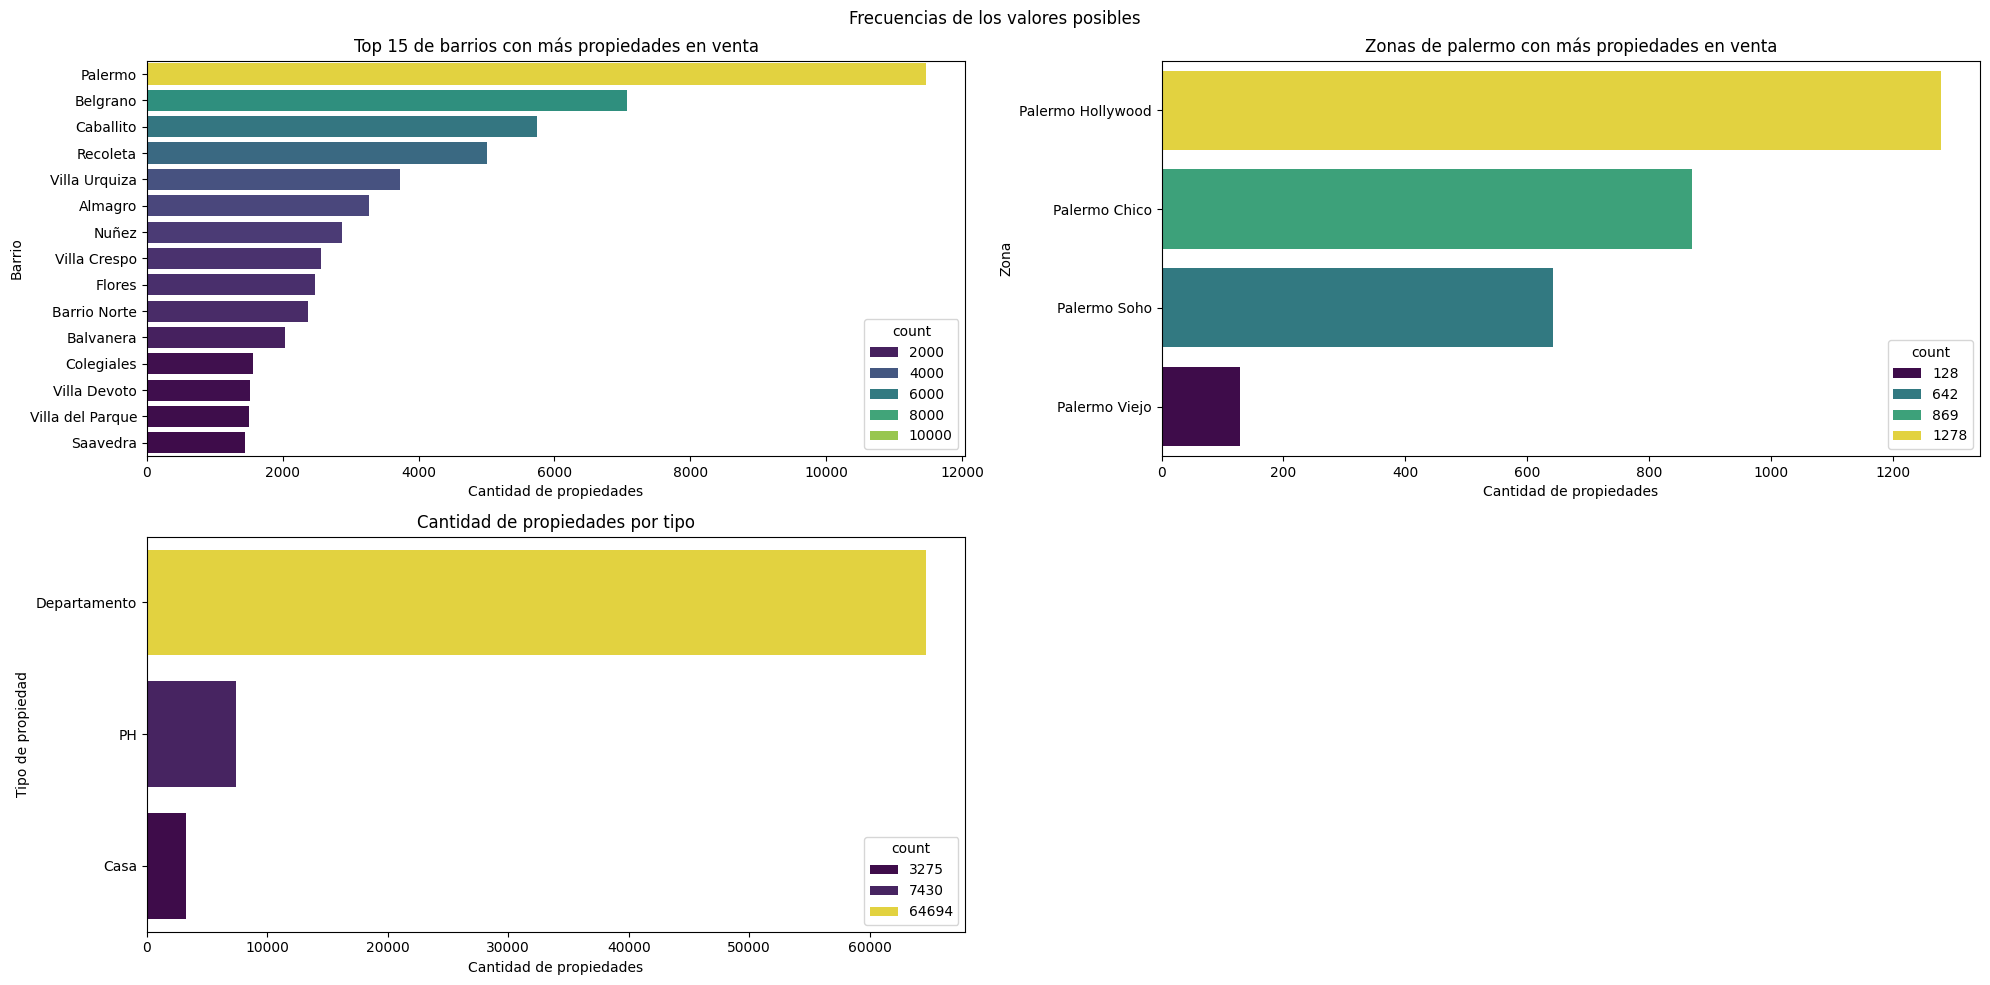

In [ ]:
plt.figure(figsize=(20, 10)) # 10x10 inches
plt.suptitle('Frecuencias de los valores posibles')

# bar plot por place_l3
plt.subplot(2, 2, 1) # 2 filas, 2 columnas, 1 posicion
frecuencias_place_3 = prop_train["place_l3"].value_counts().head(15)
sns.barplot(x=frecuencias_place_3.values, y=frecuencias_place_3.index, hue=frecuencias_place_3, palette='viridis')
plt.title('Top 15 de barrios con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Barrio')

# bar plot por place_l4
plt.subplot(2, 2, 2) # 2 filas, 2 columnas, 2 posicion
frecuencias_place_4 = prop_train["place_l4"].value_counts()
sns.barplot(x=frecuencias_place_4.values, y=frecuencias_place_4.index, hue=frecuencias_place_4, palette='viridis')
# Ya que los 4 valores posibles pertenecen a Palermo
plt.title('Zonas de palermo con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Zona')

# bar plot por property_type
plt.subplot(2, 2, 3) # 2 filas, 2 columnas, 3 posicion
frecuencias_property_type = prop_train["property_type"].value_counts()
sns.barplot(x=frecuencias_property_type.values, y=frecuencias_property_type.index, hue=frecuencias_property_type, palette='viridis')
plt.title('Cantidad de propiedades por tipo')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Tipo de propiedad')

plt.tight_layout()
plt.show()

*Anotacion: todos los place_l4 que no son NaN son zonas de palermo.*

### Variables irrelevantes para el analisis

Las variables que se pueden considerar irrelevantes para el analisis que se les dara son:

* **ID**: no aporta informacion para analizar, sin embargo puede ser util para propositos de manejo de datos.
* **Place_l2**: siempre son capital federal debido al primer filtro
* **Place_l5/l6**: no tienen ningun valor en ningun registro lo que los hace innecesarios.
* **Operation**: debido a el pre-procesamiento de los datos todos los registros tendran una operacion de venta, es decir que este atributo pasa a ser redundante.
* **Property_currency**: similarmente como pasa con *operation* pasa con este otro atributo, es un atributo redundante ya que todos seran USD.
* **Property_title**: no aporta informacion relevante al analisis.
* **Latitud/Longitud**: como ya se tiene el barrio de la propiedad en place_l2 esta informacion puede o no ser relevante dependiendo si se quiere ver la ubicacion exacta o si se quiere validar el barrio.
* **Variables de fechas (start/end/created)**: estas variables podrian ser utiles si se hace un analisis por ejemplo para ver cuales son las fechas donde mas ventas empiezan/terminan/se crean, de lo contrario no es relevante.

#### En sintesis

En base a lo anterior dicho se toma la decision de dejar de contar con los atributos:

* place_l2
* place_l5/l6 (se abordara en la seccion de datos faltantes)
* operation
* property_currency
* property title

In [ ]:
# Nuevo filtro para eliminar dichas columnas
columnas_a_eliminar = ['place_l2', 'operation', 'property_currency', 'property_title']
prop_train.drop(columns = columnas_a_eliminar,inplace=True)
prop_test.drop(columns = columnas_a_eliminar,inplace=True)

### Analisis grafico de distribucion de variables mas relevantes

* distribucion de precios
* distribucion de publicaciones por mes
* distribucion de habitaciones y dormitorios

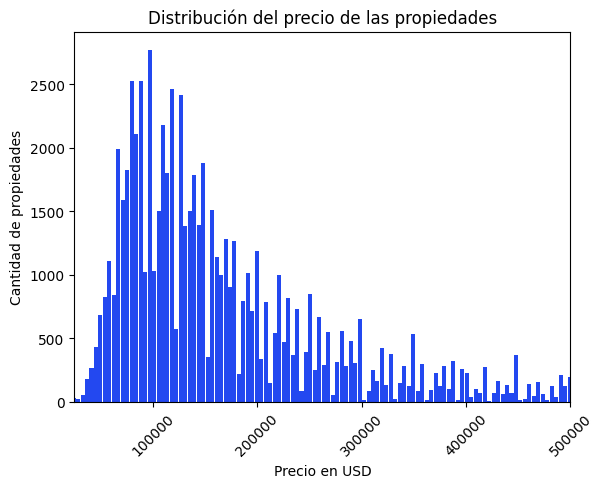

In [ ]:
# plot de distribucion de property_price

plt.hist(data=prop_train,x="property_price",bins=5000, color="#2348F0",rwidth=0.9)
plt.xlim(25000,500000)
plt.xlabel("Precio en USD")
plt.ylabel("Cantidad de propiedades")
plt.title("Distribución del precio de las propiedades")
plt.xticks(rotation=45)

plt.show()

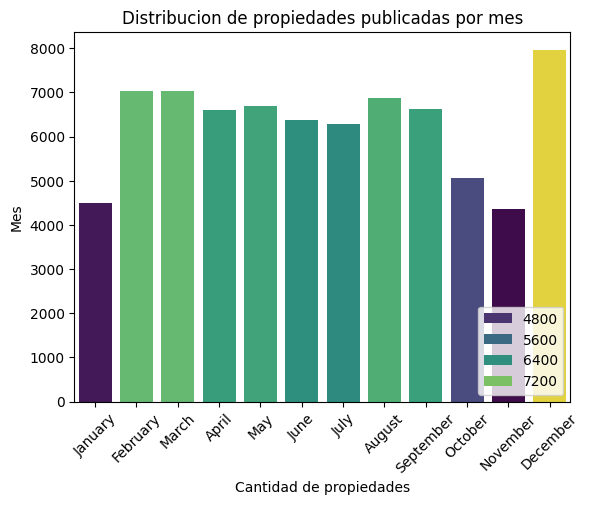

In [ ]:
# bar plot distribucion de ventas por mes

prop_train["created_on"] = pd.to_datetime(prop_train["created_on"])
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
frecuencias_mes = prop_train["created_on"].dt.month_name().value_counts().reindex(meses)
sns.barplot(x=frecuencias_mes.index, y=frecuencias_mes.values, hue=frecuencias_mes, palette='viridis')
plt.legend(loc='lower right')
plt.title('Distribucion de propiedades publicadas por mes')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Mes')
plt.xticks(rotation=45)

plt.show()

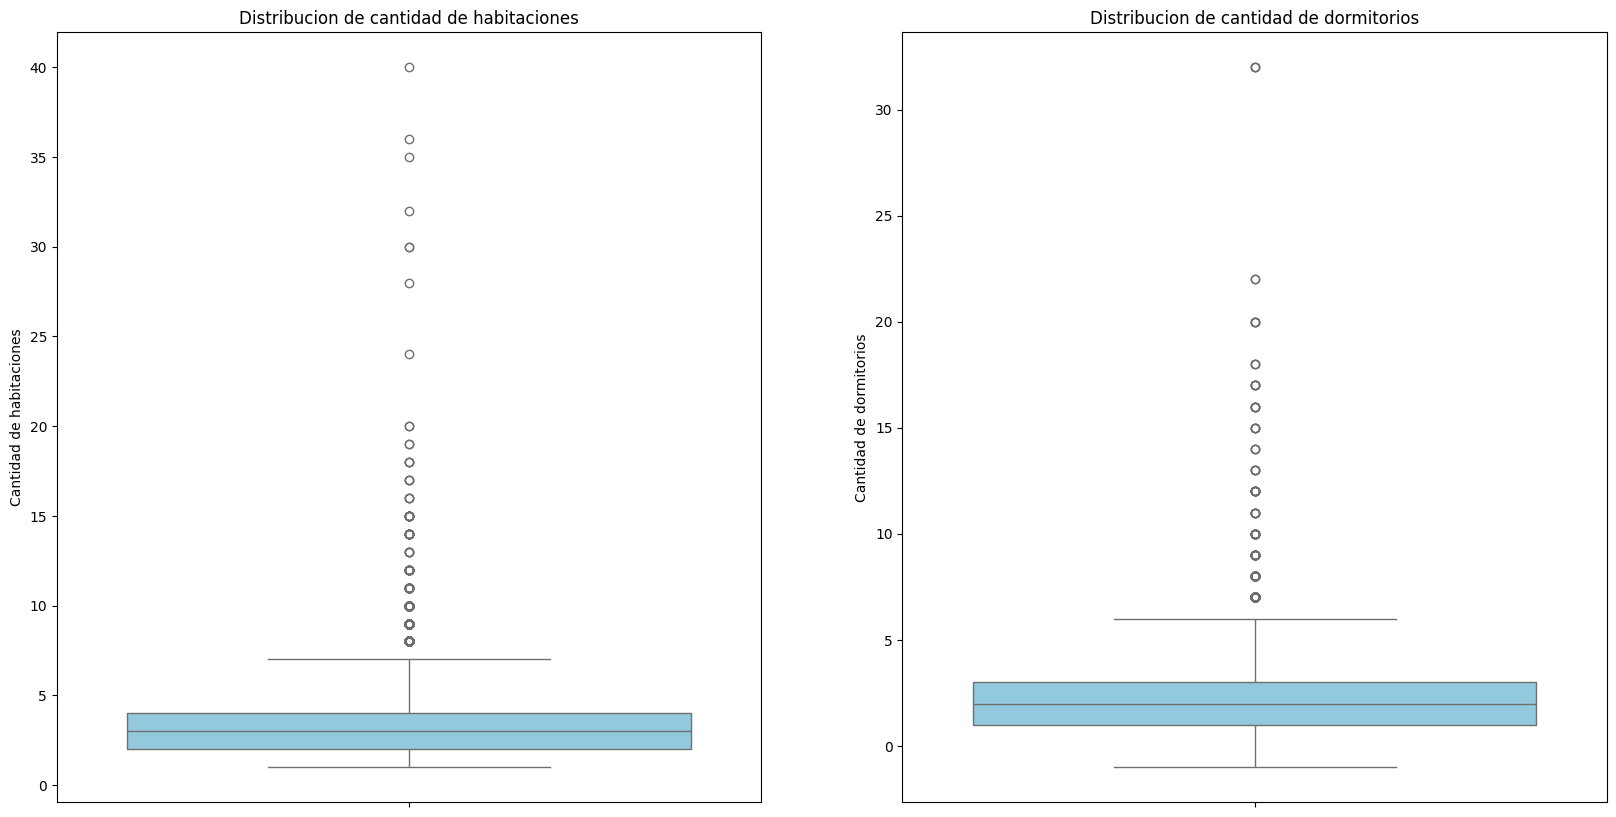

In [ ]:
# Boxplot de property_rooms y property_bedrooms
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, 1 posicion
sns.boxplot(data=prop_train, y='property_rooms', color='skyblue')
plt.title('Distribucion de cantidad de habitaciones')
plt.ylabel('Cantidad de habitaciones')

plt.subplot(1, 2, 2) # 1 fila, 2 columnas, 2 posicion
sns.boxplot(data=prop_train, y='property_bedrooms', color='skyblue')
plt.title('Distribucion de cantidad de dormitorios')
plt.ylabel('Cantidad de dormitorios')

plt.show()

### Analisis de correlaciones existentes entre variables

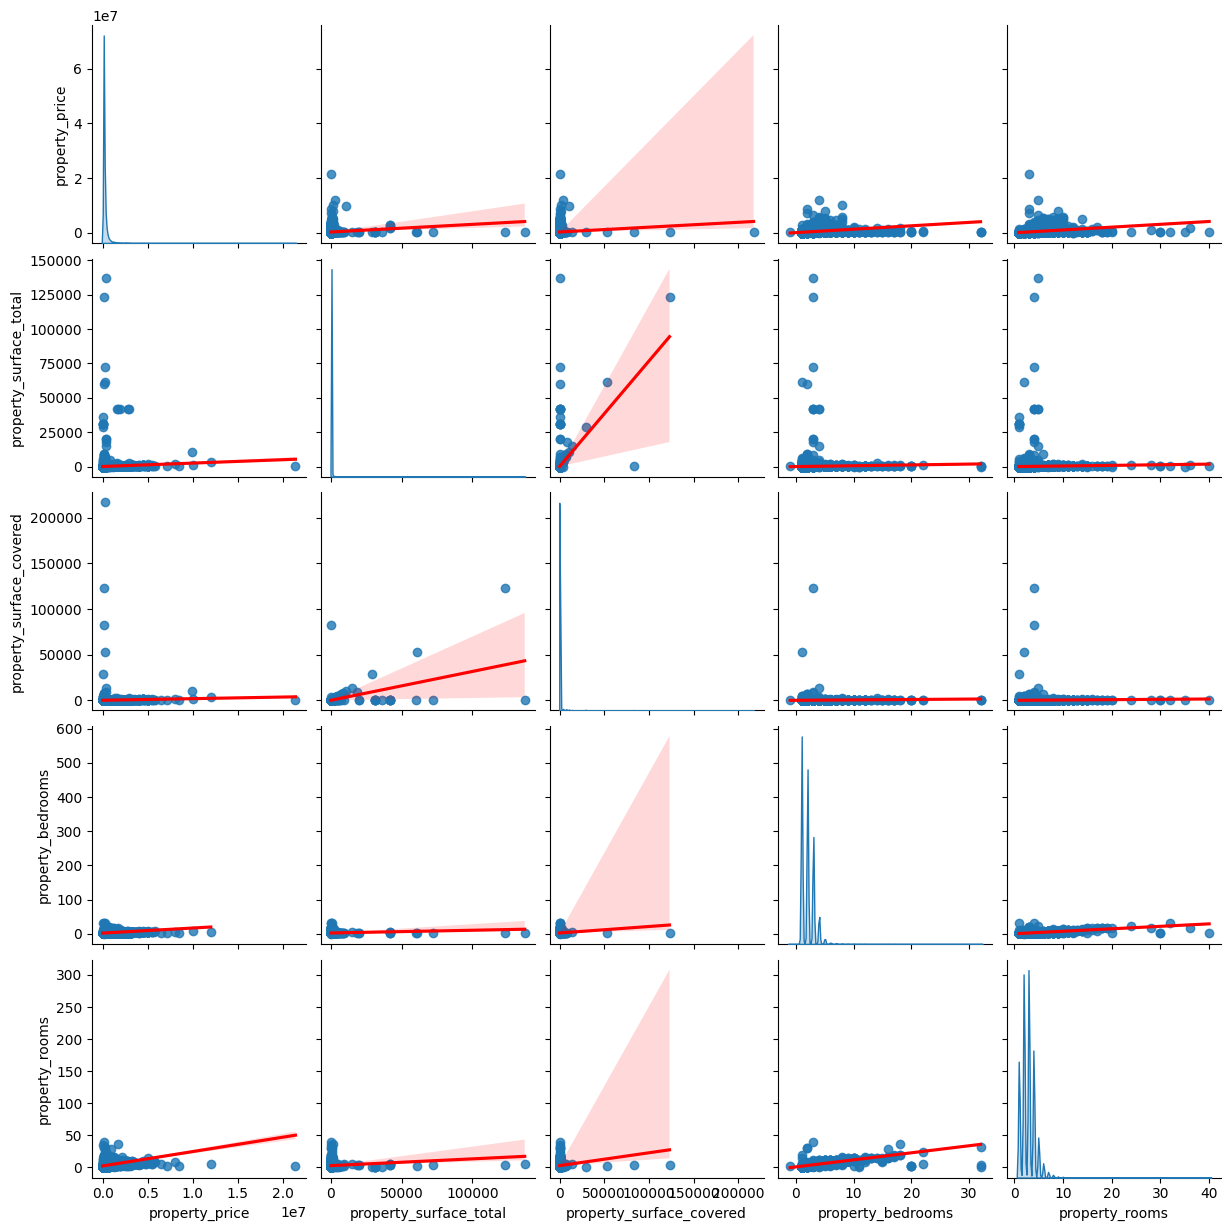

In [ ]:
# pairplot con price, surface_total, surface_covered, bedrooms, rooms
sns.pairplot(prop_train[['property_price', 'property_surface_total', 'property_surface_covered', 'property_bedrooms', 'property_rooms']], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

Observando este grafico de relaciones se pueden ver que algunas de estas variables tienen claramente una relacion y otras no tanto.

* La relacion entre la **superficie total** y **superficie cubierta** es lineal y acendente, es decir da la impresion que una dependiera de la otra, y si se piensa logicamente esto tiene sentido (si hay mas espacio se cubre mas espacio) aunque no siempre es necesariamente el caso (puede haber una casa pequeña en un terreno grande)
* La relacion entre el **precio** y la cantidad de **habitaciones** y **dormitorios**, en esta se puede notar que a mas habitaciones y/o dormitorios mas aumenta el maximo precio pero no deja de haber precios mas bajos, sin embargo, pasada una cierta cantidad (aproximadamente ~15) el precio deja de aumentar y mas bien se queda constante (entre los valores hasta ~250,000 USD)
* La relacion entre **habitaciones** y **dormitorios** tambien es lineal y acendente, lo cual puede deberse a que cuando una casa tiene muchas habitaciones esta probablemente tenga tambien muchos dormitorios.

*Extra: hay ciertos valores outliers que pueden afectar a la correlacion entre variables por ejemplo una propiedad con mas de 60 habitaciones, estos seran analizados en la seccion de valores atipicos*

Para hacer un analisis mas profundo de estos datos se analiza la *covarianza* y *correlacion* entre las variables usadas en la figura anterior:

In [ ]:
# covarianza y correlacion entre property_surface_total y property_surface_covered
covariance = prop_train['property_surface_total'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_surface_total'].corr(prop_train['property_surface_covered'])
print(f'Surface Total vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_rooms
covariance = prop_train['property_price'].cov(prop_train['property_rooms'])
correlation = prop_train['property_price'].corr(prop_train['property_rooms'])
print(f'Price vs Rooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_bedrooms
covariance = prop_train['property_price'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_price'].corr(prop_train['property_bedrooms'])
print(f'Price vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_total
covariance = prop_train['property_price'].cov(prop_train['property_surface_total'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_total'])
print(f'Price vs Surface Total\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_covered
covariance = prop_train['property_price'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_covered'])
print(f'Price vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre property_rooms y property_bedrooms
covariance = prop_train['property_rooms'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_rooms'].corr(prop_train['property_bedrooms'])
print(f'Rooms vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

Surface Total vs Surface Covered
Covariance: 297740.13 & Correlation: 0.49

Price vs Rooms
Covariance: 210958.72 & Correlation: 0.48

Price vs Bedrooms
Covariance: 153747.32 & Correlation: 0.43

Price vs Surface Total
Covariance: 25427475.40 & Correlation: 0.08

Price vs Surface Covered
Covariance: 18041715.23 & Correlation: 0.06

Rooms vs Bedrooms
Covariance: 1.31 & Correlation: 0.89



Esto nos dice que en efecto lo previamente observado era el caso. Tambien ahora gracias a este analisis se ve que las relaciones mas debiles son las dadas entre el precio y las superficies totales/cubiertas.

## Visualización de los datos

In [ ]:
# Crear una copia del DataFrame original prop_train
visu_prop_train = prop_train.copy()

# Aplicar el filtro por la columna 'property_rooms' < 6 en la copia
visu_prop_train = visu_prop_train[visu_prop_train['property_rooms'] < 6]

# Filtrar propiedades con precios entre 20,000 y 500,000
visu_prop_train = visu_prop_train[(visu_prop_train['property_price'] > 20000) &
                             (visu_prop_train['property_price'] < 500000)]

# Crear una tabla pivote para calcular el precio promedio por barrio y cantidad de habitaciones
df_visu = visu_prop_train.pivot_table(values='property_price',
                                      index='place_l3',
                                      columns='property_rooms',
                                      aggfunc='mean')

df_visu

#Modificamos un rango para que se vea mejor la visualizacion

property_rooms                  1.0            2.0            3.0  \
place_l3                                                            
Abasto                 69816.645833   91905.339286  119336.815789   
Agronomía              71380.538462  103306.361702  169133.333333   
Almagro                76128.344209   97670.862036  141424.861405   
Balvanera              66596.237681   77859.678756  117728.303175   
Barracas               87622.427536  109011.555556  154607.085366   
Barrio Norte           96377.589610  114790.296530  196161.570016   
Belgrano              103756.602757  144712.163062  216539.581449   
Boca                   60378.024390   66997.789474   96981.333333   
Boedo                  69411.830769   90780.496689  136565.619760   
Caballito              84558.588235  110776.647474  165081.299164   
Catalinas                       NaN            NaN  129333.333333   
Centro / Microcentro   61832.352941   84333.333333  116214.285714   
Chacarita              84220.468085  108545.567416  179046.664384   
Coghlan                85848.500000  126343.303030  196882.850000   
Colegiales             90325.190476  129774.265086  191716.677560   
Congreso               66692.289720   81741.085470  118497.398374   
Constitución           58366.432990   68401.138614   93654.200000   
Flores                 71379.525210   90846.882943  133251.787645   
Floresta               67373.063063   87733.644444  130381.554745   
Las Cañitas           110000.000000  227500.000000            NaN   
Liniers                64475.870968   85180.298780  139598.973154   
Mataderos              68770.208333   92199.992481  130808.362245   
Monserrat              75946.099265   85152.709677  119570.594262   
Monte Castro           78727.553191   96324.120690  149734.453782   
Nuñez                 104248.609649  142012.795455  210813.125899   
Once                   51387.804878   77243.283582  118759.292035   
Palermo               104721.121865  149194.733873  238403.753160   
Parque Avellaneda      74330.769231   83234.545455  111676.344086   
Parque Centenario      81033.333333  100977.583333  153266.666667   
Parque Chacabuco       78059.449153   93978.052885  142268.529412   
Parque Chas            74947.061728  107964.561798  178018.714286   
Parque Patricios       64462.842857   89963.256637  108121.797753   
Paternal               78671.109756   91372.669065  126692.807018   
Pompeya                46116.666667   58840.593750   91172.857143   
Puerto Madero         248867.027397  333363.188925  397549.647059   
Recoleta               98963.417246  127082.558248  228261.596121   
Retiro                 94264.864583  103414.133065  184295.775862   
Saavedra               93426.481818  118200.339713  187412.876344   
San Cristobal          63234.263374   78350.029091  113501.477419   
San Nicolás            59394.029801   80536.388715  115146.429268   
San Telmo              80224.659091  105269.261538  139326.937063   
Tribunales             63218.666667   87504.761905  114358.500000   
Velez Sarsfield        69069.565217   92355.106383  138032.000000   
Versalles              75777.777778  102301.754386  156431.707317   
Villa Crespo           82551.000000  106291.018750  153044.423338   
Villa Devoto           93191.839286  113479.633766  178471.066414   
Villa General Mitre    69880.604651   88732.594340  135778.571429   
Villa Lugano           53427.777778   84528.245614   92842.799087   
Villa Luro             72995.833333   93756.852564  136655.813665   
Villa Ortuzar          77860.850877   98106.965714  184902.112903   
Villa Pueyrredón       79428.819820  112119.233333  159853.041812   
Villa Real             81200.000000  106647.058824  140977.142857   
Villa Riachuelo                 NaN   87750.000000   88700.000000   
Villa Santa Rita       78151.727273   96496.951220  138408.261261   
Villa Soldati          53000.000000   67000.000000   89535.714286   
Villa Urquiza          91585.480377  123977.672156  189624.957317  

Text(80.31944444444443, 0.5, 'Zonas de Capital Federal')

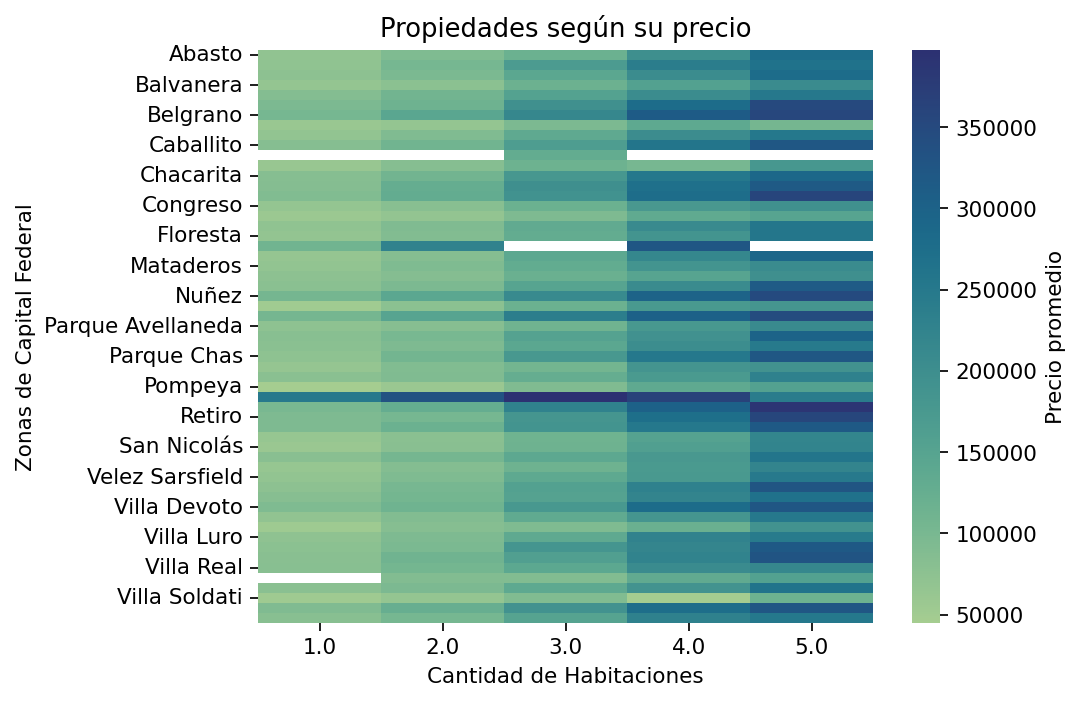

In [ ]:
# Nueva figura con un dpi de 155 para mejorar la calidad de la visualización
plt.figure(dpi=155)

# Establecer el título de la visualización
plt.title("Propiedades según su precio")

# Crear un heatmap utilizando Seaborn con los datos de df_visu
sns.heatmap(df_visu, square=False, cmap='crest', fmt=".0f", cbar_kws={'label': 'Precio promedio'})

# Establecer etiquetas para los ejes x e y
plt.xlabel("Cantidad de Habitaciones")
plt.ylabel("Zonas de Capital Federal")

# Heatmap que muestra el precio promedio por propiedad tomando en cuenta la cantidad de habitaciones y su ubicación

La visualización presentada es un mapa de calor (heatmap) que muestra el precio promedio de las propiedades en función de la cantidad de habitaciones y su ubicación en diferentes zonas de la Ciudad Autónoma de Buenos Aires (CABA). Al observar el heatmap, es posible identificar patrones en los precios según la ubicación y el tamaño de la propiedad. Por ejemplo, puede haber áreas donde las propiedades con más habitaciones tienden a tener precios más altos, mientras que en otras zonas los precios son más uniformes independientemente del tamaño de la propiedad.La visualización proporciona una manera efectiva de entender cómo se relacionan el precio promedio de las propiedades, la cantidad de habitaciones y la ubicación en diferentes áreas de la Ciudad Autónoma de Buenos Aires. Ayuda a los interesados a tomar decisiones informadas sobre la compra o inversión en propiedades en la ciudad.

<ipython-input-28-ee8e753002fe>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],


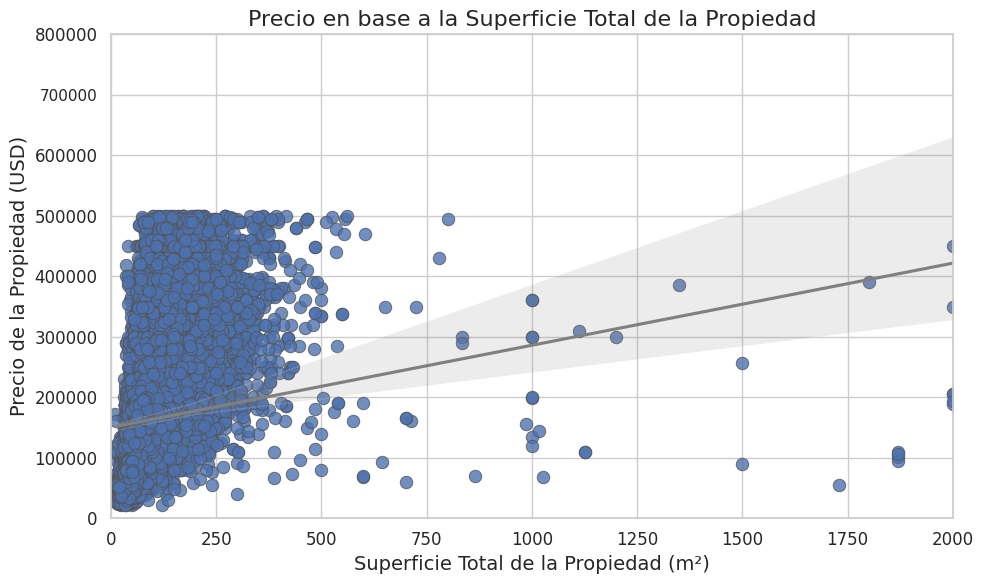

In [ ]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el scatter plot utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
                x='property_surface_total', y='property_price', palette='pastel', s=80, alpha=0.8)

# Agregar una línea de regresión
sns.regplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
            x='property_surface_total', y='property_price', scatter=False, color='gray')

# Ajustar título y etiquetas
plt.title('Precio en base a la Superficie Total de la Propiedad', fontsize=16)
plt.xlabel('Superficie Total de la Propiedad (m²)', fontsize=14)
plt.ylabel('Precio de la Propiedad (USD)', fontsize=14)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el rango de los ejes
plt.xlim(0, 2000)  # Establecer el rango x hasta 20,000
plt.ylim(0, 800000)
# Añadir sombreado alrededor de las burbujas
plt.gca().collections[0].set_edgecolor("#555555")

plt.tight_layout()
plt.show()

Esta visualización muestra un diagrama de dispersión (scatter plot) que relaciona el precio de la propiedad con su superficie total, con el agregado de una línea de regresión para visualizar la tendencia general de los datos.La línea de regresión trazada en el gráfico muestra la tendencia general de los datos. Permite ver si hay una relación lineal entre el precio y la superficie total de la propiedad. En este caso, la pendiente de la línea de regresión indica la tasa de cambio en el precio para cada unidad adicional de superficie.Cada punto en el diagrama de dispersión representa una propiedad individual, y su posición relativa en el gráfico indica su precio y superficie total. Esto facilita la identificación de propiedades que pueden estar por encima o por debajo de la tendencia general.

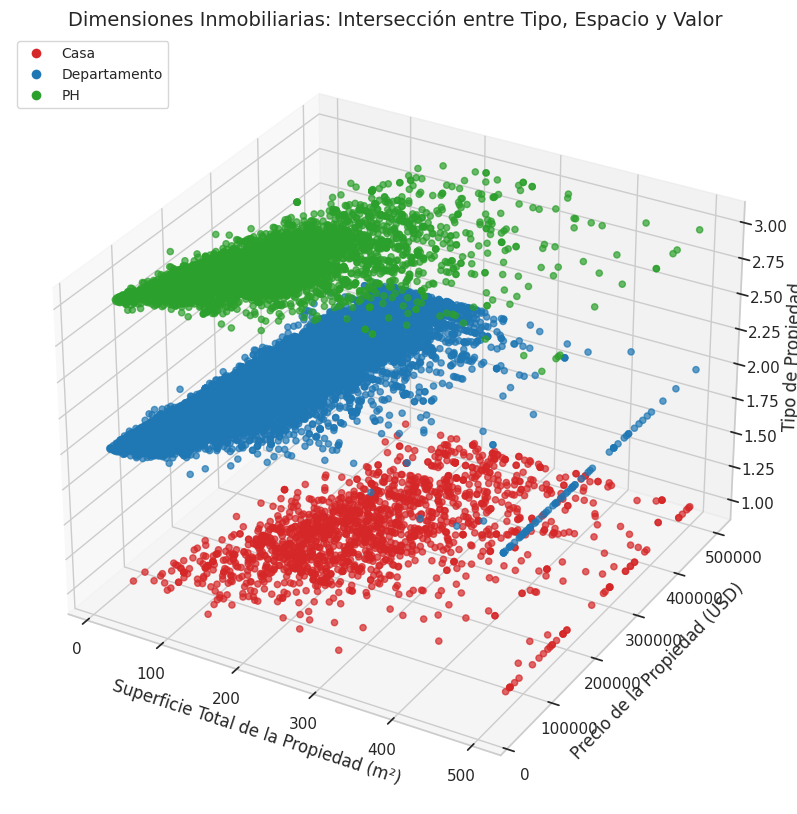

In [ ]:
# Crear una figura y un conjunto de ejes tridimensionales
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Mapa de colores para los tipos de propiedad
color_mapping = {'Casa': 'tab:red', 'Departamento': 'tab:blue', 'PH': 'tab:green'}

# Asignar un valor numérico a cada tipo de propiedad
property_type_mapping = {'Casa': 1, 'Departamento': 2, 'PH': 3}
property_type_numeric = [property_type_mapping[prop_type] for prop_type in visu_prop_train['property_type']]

# Extraer las variables del dataframe
property_surface_total = visu_prop_train['property_surface_total'].clip(0, 500)
property_price = visu_prop_train['property_price']

# Graficar los puntos tridimensionales
scatter = ax.scatter(property_surface_total, property_price, property_type_numeric, c=[color_mapping[prop_type] for prop_type in visu_prop_train['property_type']], alpha=0.7)

# Etiquetas de los ejes
ax.set_xlabel('Superficie Total de la Propiedad (m²)', fontsize=12)
ax.set_ylabel('Precio de la Propiedad (USD)', fontsize=12)
ax.set_zlabel('Tipo de Propiedad', fontsize=12)

# Leyenda para los colores
legend_labels = ['Casa', 'Departamento', 'PH']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[prop_type], markersize=8, label=prop_type) for prop_type in legend_labels]
ax.legend(handles=legend_handles, labels=legend_labels, loc='upper left', fontsize=10)

# Añadir una rejilla de fondo
ax.grid(True)

# Título del gráfico
plt.title('Dimensiones Inmobiliarias: Intersección entre Tipo, Espacio y Valor', fontsize=14)

# Mostrar el gráfico
plt.show()

Este gráfico tridimensional permite visualizar la distribución de las propiedades en función de su tipo, tamaño y precio. Se pueden identificar patrones de agrupamiento o tendencias en el espacio tridimensional, lo que puede ser útil para comprender mejor el mercado inmobiliario y tomar decisiones informadas. Además, podría usarse para ajustar un modelo de regresión tridimensional para predecir el precio de una propiedad en función de su tipo y tamaño.

In [ ]:
# Calcular el precio promedio por barrio
precio_promedio_por_barrio = visu_prop_train.groupby('place_l3')['property_price'].mean().reset_index()

# Crear el gráfico de burbujas agrupadas
fig = px.scatter(precio_promedio_por_barrio,
                 x='place_l3', y='property_price',
                 size='property_price',
                 color='place_l3',
                 hover_name='place_l3',
                 size_max=50,
                 title='Precio promedio por barrio',
                 labels={'place_l3': 'Barrio', 'property_price': 'Precio promedio'})
fig.show()

Esta visualización muestra un gráfico de burbujas agrupadas que representa el precio promedio de las propiedades en cada barrio.El gráfico de burbujas agrupadas proporciona una representación visual del precio promedio de las propiedades en cada barrio de interés. Cada burbuja representa un barrio, y el tamaño de la burbuja indica el precio promedio de las propiedades en ese barrio. Los colores de las burbujas pueden indicar diferentes barrios para facilitar la identificación visual, las burbujas más grandes representan barrios con precios promedio más altos, mientras que las burbujas más pequeñas representan barrios con precios promedio más bajos.El gráfico de burbujas agrupadas es interactivo, lo que permite a los usuarios explorar los datos con mayor detalle al pasar el cursor sobre las burbujas para ver información adicional, como el nombre del barrio y el precio promedio.

In [ ]:
# Filtramos los Nan de latitud ya que es impresindible contar con este dato para asignarlo al mapa
visu_prop_train = visu_prop_train.dropna(subset=['latitud'])

def generar_mapa_con_registros_por_barrio(df):
    """
    Función para generar un mapa con los registros por barrio.

    Parámetros:
    - visu_prop_train: DataFrame que contiene los datos de las propiedades filtradas.

    Devuelve:
    - mapa: Objeto del mapa de Folium.
    """
    # Coordenadas del centro de la Ciudad Autónoma de Buenos Aires
    latitud_caba = -34.6037
    longitud_caba = -58.3816

    # Crear el mapa centrado en CABA
    mapa = folium.Map(location=[latitud_caba, longitud_caba], zoom_start=12)

    # Agregar un grupo de marcadores
    marker_cluster = MarkerCluster().add_to(mapa)

    # Contar la cantidad de registros por barrio
    registros_por_barrio = visu_prop_train['place_l3'].value_counts()

    # Agregar marcadores en el mapa para cada barrio
    for barrio, cantidad in registros_por_barrio.items():
        latitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['latitud'].iloc[0]
        longitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['longitud'].iloc[0]

        folium.Marker(location=[latitud, longitud],
                      tooltip=f"{barrio}: {cantidad} Propiedad en Venta").add_to(marker_cluster)

    return mapa

# Generar el mapa con los registros por barrio
mapa = generar_mapa_con_registros_por_barrio(visu_prop_train)

# Mostrar el mapa
mapa

La visualización proporciona un mapa interactivo que muestra la ubicación de las propiedades en venta en la Ciudad Autónoma de Buenos Aires (CABA), agrupadas por barrio.Cada marcador en el mapa representa una propiedad, y su ubicación específica está determinada por las coordenadas de latitud y longitud proporcionadas en los datos.Los grupos de marcadores en el mapa indican la concentración de propiedades en cada barrio, lo que puede proporcionar información sobre la popularidad y la demanda de viviendas en diferentes áreas de CABA.

<ipython-input-32-cbbcda09a310>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



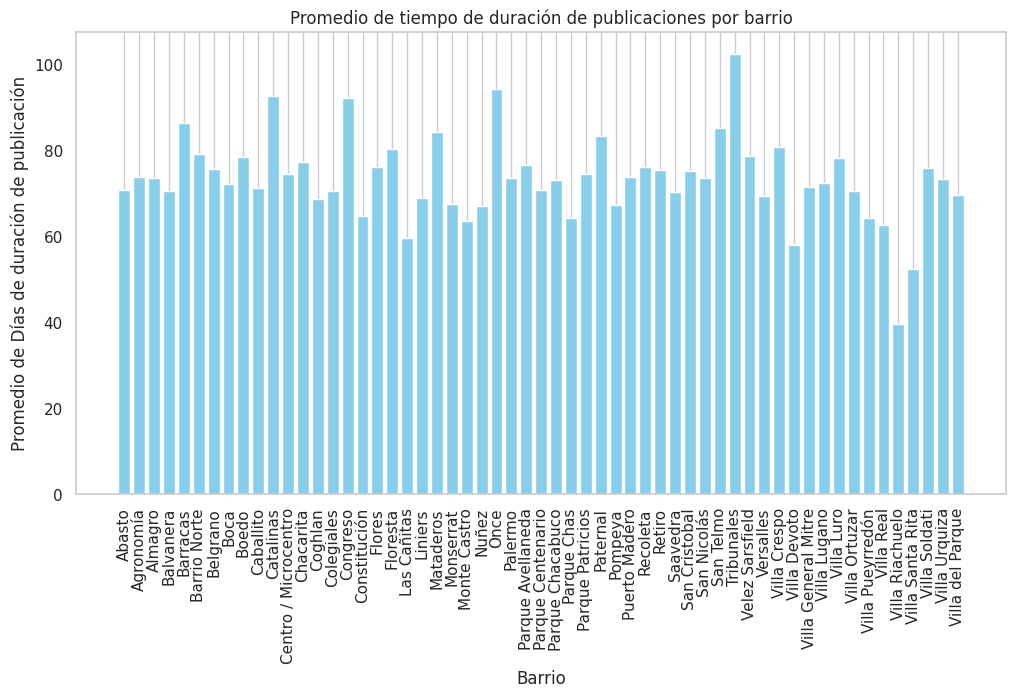

In [ ]:
# Convertir las fechas a tipo datetime si no están en ese formato
visu_prop_train['start_date'] = pd.to_datetime(visu_prop_train['start_date'], errors='coerce')
visu_prop_train['end_date'] = pd.to_datetime(visu_prop_train['end_date'], errors='coerce')

# Calcular la duración de cada publicación
visu_prop_train['duracion_publicacion'] = (visu_prop_train['end_date'] - visu_prop_train['start_date']).dt.days

# Agrupar por barrio y calcular el promedio de duración de las publicaciones
promedio_duracion_por_barrio = visu_prop_train.groupby('place_l3')['duracion_publicacion'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(promedio_duracion_por_barrio['place_l3'], promedio_duracion_por_barrio['duracion_publicacion'], color='skyblue')
plt.title('Promedio de tiempo de duración de publicaciones por barrio')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Días de duración de publicación')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

Esta visualización presenta un gráfico de barras que muestra el promedio de tiempo de duración de las publicaciones por barrio en la Ciudad Autónoma de Buenos Aires (CABA). Cada barra en el gráfico representa un barrio específico, y su altura indica el promedio de días que las publicaciones permanecen activas en ese barrio.La visualización permite comparar fácilmente la duración promedio de las publicaciones entre diferentes barrios de la ciudad. Las barras más altas indican que las publicaciones en ese barrio tienden a permanecer activas por más tiempo, mientras que las barras más cortas indican una duración promedio más corta de las publicaciones.Los barrios con barras más altas pueden indicar áreas de la ciudad donde la demanda de propiedades es más alta o donde las propiedades tienden a permanecer en el mercado por períodos más prolongados. Esto puede ser útil para comprender las dinámicas del mercado inmobiliario en diferentes áreas de la ciudad.

## Datos Faltantes
En esta sección se va a realizar el análsis de la presencia de datos faltantes

### Análisis de datos faltantes a nivel columna

#### Análisis previo

In [ ]:
ds_train = prop_train
ds_test = prop_test

In [ ]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l3', 'place_l4', 'place_l5', 'place_l6', 'property_type',
       'property_rooms', 'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price'],
      dtype='object')

Para iniciar, vamos a analizar la cantidad de datos faltantes por columna y su porcentaje

In [ ]:
def obtener_filas(ds):
  return ds.shape[0]

def obtener_columnas(ds):
  return ds.shape[1]

In [ ]:
filas = obtener_filas(ds_train)
columnas = obtener_columnas(ds_train)
print("El dataset de entrenamiento tiene {} filas y {} columnas".format(filas,columnas))

El dataset de entrenamiento tiene 75399 filas y 16 columnas


Obtengo el porcentaje de cada columna que contiene datos nulos

In [ ]:
def obtener_promedio_nulos(ds):
  return ds.isna().sum() / obtener_filas(ds) * 100

promedio_datos_nulos = obtener_promedio_nulos(ds_train)
promedio_datos_nulos

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.988117
longitud                      3.988117
place_l3                      0.449608
place_l4                     96.131248
place_l5                    100.000000
place_l6                    100.000000
property_type                 0.000000
property_rooms                1.095505
property_bedrooms            11.638085
property_surface_total        5.090253
property_surface_covered      3.590233
property_price                0.000000
dtype: float64

Muestro la cantidad de datos nulos por columna

In [ ]:
def obtener_cantidad_nulos_ds(ds):
  return ds.isna().sum()

cant_datos_nulos = obtener_cantidad_nulos_ds(ds_train)
cant_datos_nulos

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                      3007
longitud                     3007
place_l3                      339
place_l4                    72482
place_l5                    75399
place_l6                    75399
property_type                   0
property_rooms                826
property_bedrooms            8775
property_surface_total       3838
property_surface_covered     2707
property_price                  0
dtype: int64

Grafico esta relación

<ipython-input-39-f848825aef01>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



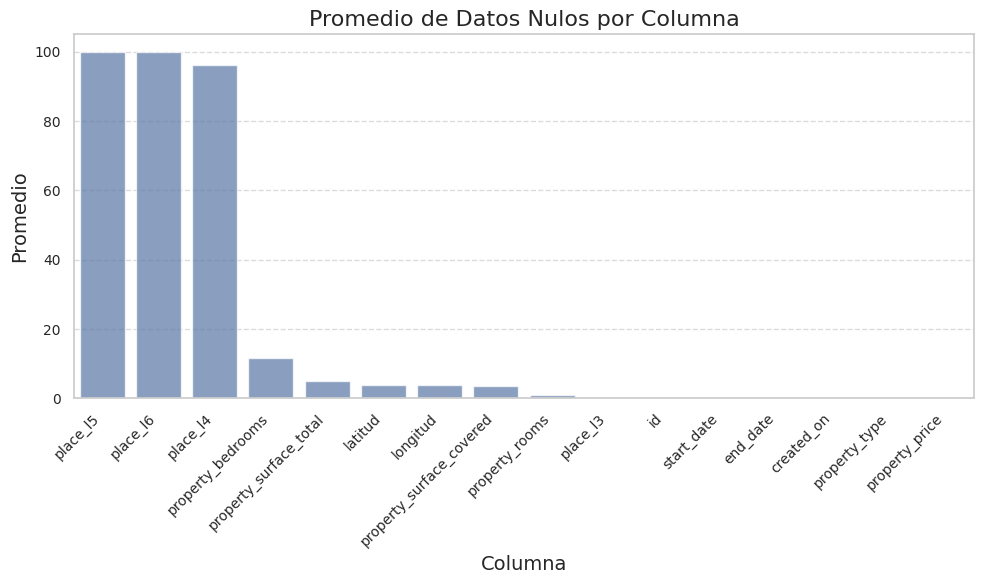

In [ ]:
ds_porcentaje = promedio_datos_nulos

# Ordenar los valores en orden descendente
ds_porcentaje = ds_porcentaje.sort_values(ascending = False)

# Establecer el estilo del gráfico
sns.set_style("whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el gráfico de barras
bar_plot = sns.barplot(x=ds_porcentaje.index, y=ds_porcentaje.values, alpha=0.7)

# Agregar título y etiquetas
bar_plot.set_title("Promedio de Datos Nulos por Columna", fontsize=16)
bar_plot.set_xlabel("Columna", fontsize=14)
bar_plot.set_ylabel("Promedio", fontsize=14)

# Rotar etiquetas del eje x para una mejor legibilidad
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Agregar líneas de la cuadrícula y ajustar el tamaño de la fuente
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Entonces los datos que debo analizar son:

In [ ]:
def obtener_cantidad_nulos(ds):
  promedio_datos_nulos = obtener_promedio_nulos(ds)
  promedio_datos_nulos.sort_values(ascending = False,inplace=True)
  filtro = promedio_datos_nulos!=0
  return promedio_datos_nulos[filtro] if not promedio_datos_nulos[filtro].empty else 'No existen valores NaN'

obtener_cantidad_nulos(ds_train)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.131248
property_bedrooms            11.638085
property_surface_total        5.090253
latitud                       3.988117
longitud                      3.988117
property_surface_covered      3.590233
property_rooms                1.095505
place_l3                      0.449608
dtype: float64

In [ ]:
obtener_cantidad_nulos(ds_test)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.148541
property_bedrooms            11.734748
property_surface_total        5.336870
latitud                       3.835544
longitud                      3.835544
property_surface_covered      3.432361
property_rooms                1.156499
place_l3                      0.413793
dtype: float64

#### Elimino places (place_l6, place_l5, place_l4)

Al ver el gráfico y el análisis previo de nulos. Puedo eliminar las columnas ```place_l6```, ```place_l5``` y ```place_l4```, pues tienen en su totalidad de datos nulos. El ```place_l4``` tiene casi su totalidad de nulos.

Consideramos que las columnas ```place_l6```, ```place_l5``` son datos faltantes de tipo MCAR

In [ ]:
columnas = ['place_l6','place_l5','place_l4']
ds_train.drop(columns=columnas, inplace=True)
ds_test.drop(columns=columnas, inplace=True)

In [ ]:
ds_train.head()

id  start_date    end_date created_on  \
152130  WdwW+njifJaAx+6GEb4Hdg==  2021-08-05  9999-12-31 2021-08-05   
62001   SR7AY4G7Cm11MDGP+geKgA==  2021-05-01  2021-06-05 2021-05-01   
51046   QZIxx+N2GuKzSMOoAxUcPQ==  2021-06-23  2021-10-18 2021-06-23   
159193  Nm3DjXksy709Lyo2zZkb7Q==  2021-11-13  2022-01-15 2021-11-13   
293794  9HQQvH9rPnePfqrrCbRoLA==  2021-02-23  2022-04-13 2021-02-23   

          latitud   longitud      place_l3 property_type  property_rooms  \
152130 -34.636634 -58.484079      Floresta  Departamento             1.0   
62001  -34.576115 -58.433387       Palermo  Departamento             3.0   
51046  -34.592109 -58.407433      Recoleta  Departamento             3.0   
159193 -34.620389 -58.457624     Caballito  Departamento             3.0   
293794 -34.601192 -58.431567  Villa Crespo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
152130                NaN                    36.0                      33.0   
62001                 2.0                    73.0                      70.0   
51046                 2.0                    88.0                      84.0   
159193                2.0                    58.0                      53.0   
293794                2.0                    61.0                      61.0   

        property_price  
152130         71000.0  
62001         165000.0  
51046         220000.0  
159193        139000.0  
293794        110000.0

In [ ]:
ds_test.head()

id  start_date    end_date  created_on  \
142004  mDSvcUFmZ770vz9WR1VooA==  2021-03-10  2021-04-10  2021-03-10   
398853  +2hVKrmeuBz1jOuZ15jycw==  2021-02-13  2021-03-01  2021-02-13   
307865  OOcAPxwRWQXp/s22sT2BrQ==  2021-01-28  2021-09-03  2021-01-28   
434363  hctBaQGDm7y4pXXgvWXpUA==  2021-05-04  2021-06-05  2021-05-04   
290496  T6NE7X2dTkNuwkRBQ6OdBg==  2021-10-20  2022-01-27  2021-10-20   

          latitud   longitud    place_l3 property_type  property_rooms  \
142004 -34.553090 -58.451495    Belgrano  Departamento             4.0   
398853 -34.623701 -58.448642   Caballito  Departamento             3.0   
307865 -34.551421 -58.452579    Belgrano  Departamento             2.0   
434363 -34.569927 -58.457676  Colegiales  Departamento             3.0   
290496 -34.576009 -58.433645     Palermo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
142004                3.0                   152.0                     136.0   
398853                2.0                    96.0                      66.0   
307865                1.0                    48.0                      46.0   
434363                2.0                    53.0                      45.0   
290496                2.0                    73.0                      70.0   

        property_price  
142004        486400.0  
398853        195000.0  
307865        140000.0  
434363        130000.0  
290496        165000.0

In [ ]:
nulos_preimputacion = obtener_cantidad_nulos(ds_train)

In [ ]:
obtener_cantidad_nulos(ds_test)

property_bedrooms           11.734748
property_surface_total       5.336870
latitud                      3.835544
longitud                     3.835544
property_surface_covered     3.432361
property_rooms               1.156499
place_l3                     0.413793
dtype: float64

#### Generar funciones para análisis

In [ ]:
# establezco si son o no nulos
def generar_ds_nulo(columnas):
  return ds_train[columnas].isna()

def filtrar_nulo(columna,ds):
  return ds[columna]==True

def filtrar_no_nulo(columna,ds):
  return ds[columna]==False

def aplicar_filtro(ds,filtro,columna,nulidad):
  ds.loc[filtro,columna] = nulidad
  return ds

In [ ]:
def contar_ds(ds,columna):
  return ds[columna].value_counts()

def imprimir_cantidades(nulos,no_nulos,columna):
  print("Cantidad de datos NULOS en {}: {}".format(columna,nulos))
  print("Cantidad de datos NO NULOS en {}: {}".format(columna,no_nulos))

In [ ]:
def generar_grafico(ds, columna):
  # Ajustar el tamaño de la figura
  plt.figure(figsize=(10, 6))

  # Agrupar por 'longitud' y obtener el tamaño de cada grupo, luego trazar el gráfico de barras horizontales
  ds.groupby(columna).size().plot(kind='barh', color=sns.color_palette('Dark2'))

  # Ocultar los ejes superior y derecho
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  titulo = 'Tamaño de Grupo por ' + columna
  # Configurar el tamaño de la letra del título y las etiquetas
  plt.title(titulo, fontsize=16)
  plt.xlabel('Cantidad', fontsize=14)
  plt.ylabel(columna, fontsize=14)

  # Mostrar el gráfico
  plt.show()

#### Latitud y longitud
Vamos a anlizar los nulos de estas dos variables

In [ ]:
latatitud_longitud = generar_ds_nulo(['latitud','longitud'])
# filtros latitud
v_filtro_latitud = filtrar_nulo('latitud',latatitud_longitud)
f_filtro_latitud = filtrar_no_nulo('latitud',latatitud_longitud)
# filtros longitud
v_filtro_longitud = filtrar_nulo('longitud',latatitud_longitud)
f_filtro_longitud = filtrar_no_nulo('longitud',latatitud_longitud)
# aplico los filtros
latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_latitud,'latitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_latitud,'latitud','no nulo')

latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_longitud,'longitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_longitud,'longitud','no nulo')

latatitud_longitud.head()



latitud longitud
152130  no nulo  no nulo
62001   no nulo  no nulo
51046   no nulo  no nulo
159193  no nulo  no nulo
293794  no nulo  no nulo

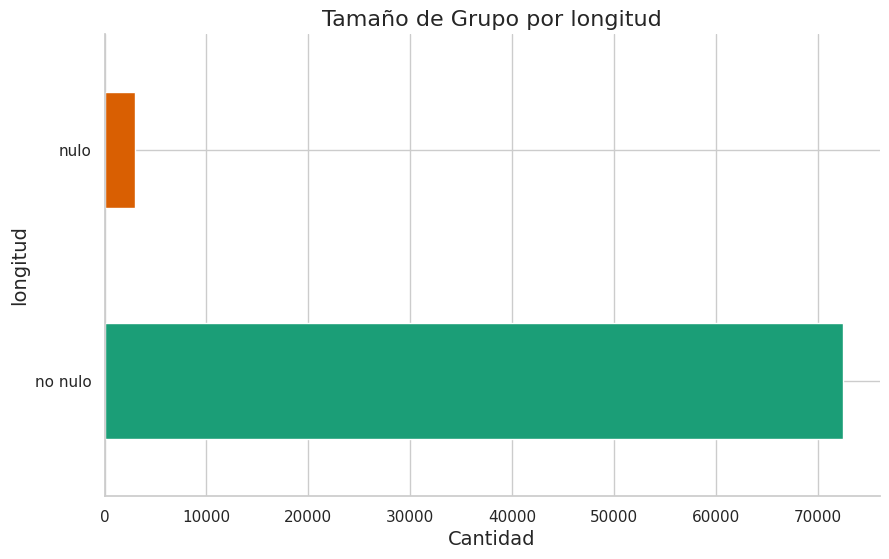

In [ ]:
generar_grafico(latatitud_longitud,'longitud')

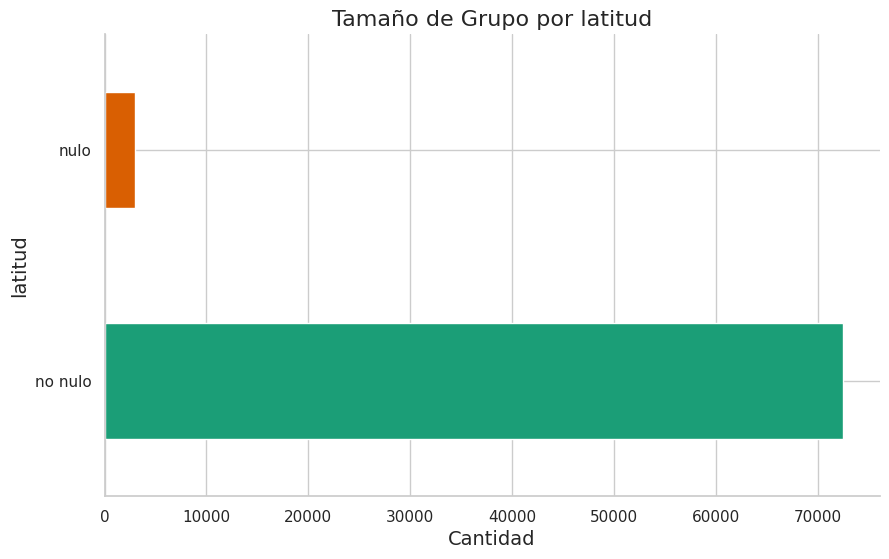

In [ ]:
generar_grafico(latatitud_longitud,'latitud')

In [ ]:
imprimir_cantidades(latatitud_longitud.value_counts()[1], latatitud_longitud.value_counts()[0], 'longitud')

Cantidad de datos NULOS en longitud: 3007
Cantidad de datos NO NULOS en longitud: 72392


In [ ]:
imprimir_cantidades(latatitud_longitud.value_counts()[1], latatitud_longitud.value_counts()[0], 'latitud')

Cantidad de datos NULOS en latitud: 3007
Cantidad de datos NO NULOS en latitud: 72392


#### Superficie total y Superficie cubierta (property_surface_total, property_surface_covered)

In [ ]:
# establezco si son o no nulos
sup_total_cubierta = generar_ds_nulo(['property_surface_total','property_surface_covered'])
# creo filtro si son o no nulos
v_filtro_total =  filtrar_nulo('property_surface_total',sup_total_cubierta)
f_filtro_total =  filtrar_no_nulo('property_surface_total',sup_total_cubierta)

v_filtro_cubierto =  filtrar_nulo('property_surface_covered',sup_total_cubierta)
f_filtro_cubierto =  filtrar_no_nulo('property_surface_covered',sup_total_cubierta)
# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_total,'property_surface_total','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_total,'property_surface_total','no nulo')

# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_cubierto,'property_surface_covered','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_cubierto,'property_surface_covered','no nulo')

sup_total_cubierta.head()

property_surface_total property_surface_covered
152130                no nulo                  no nulo
62001                 no nulo                  no nulo
51046                 no nulo                  no nulo
159193                no nulo                  no nulo
293794                no nulo                  no nulo

In [ ]:
imprimir_cantidades(sup_total_cubierta.value_counts()[1], sup_total_cubierta.value_counts()[0], 'property_surface_total')

Cantidad de datos NULOS en property_surface_total: 3838
Cantidad de datos NO NULOS en property_surface_total: 68854


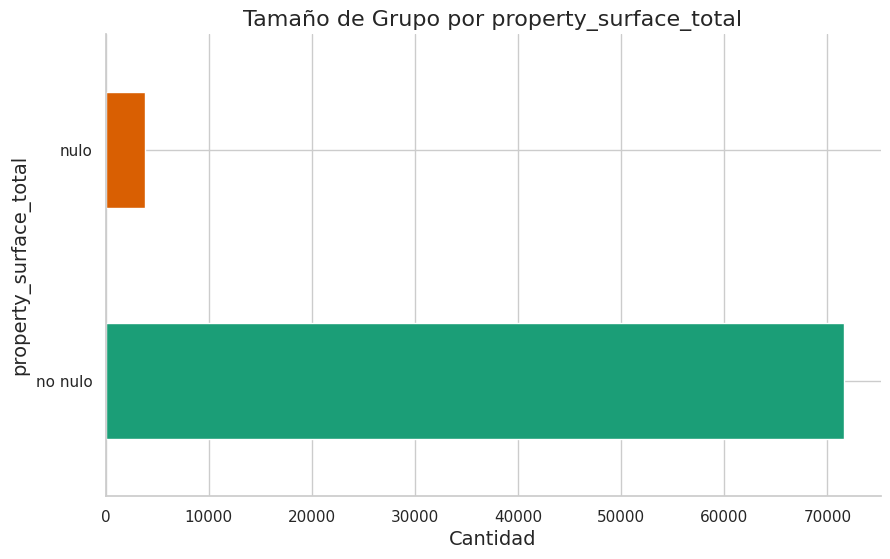

In [ ]:
generar_grafico(sup_total_cubierta,'property_surface_total')

In [ ]:
imprimir_cantidades(sup_total_cubierta.value_counts()[1], sup_total_cubierta.value_counts()[0], 'property_surface_covered')

Cantidad de datos NULOS en property_surface_covered: 3838
Cantidad de datos NO NULOS en property_surface_covered: 68854


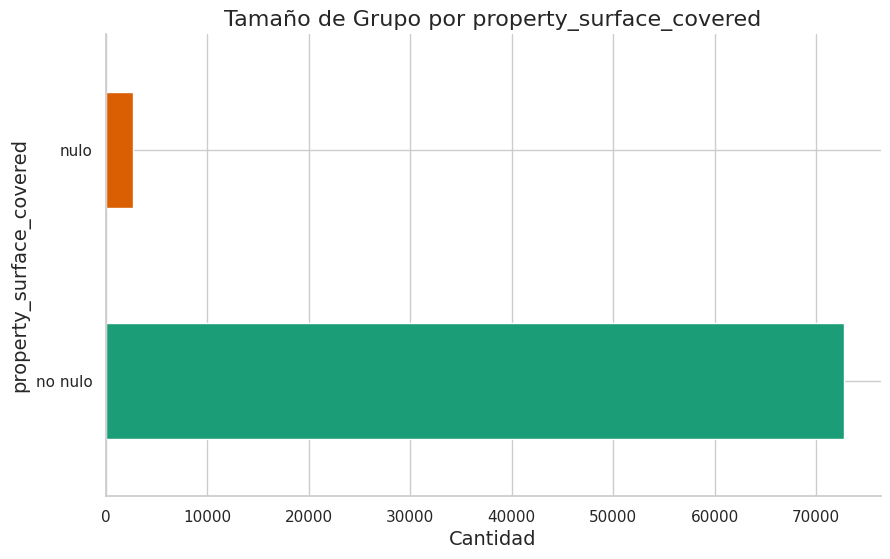

In [ ]:
generar_grafico(sup_total_cubierta,'property_surface_covered')

#### Habitaciones y dormitorios (property_rooms, property_bedrooms)

In [ ]:
# establezco si son o no nulos
habitaciones_dormis = generar_ds_nulo(['property_rooms','property_bedrooms'])
# creo filtro si son o no nulos
v_filtro_hab = filtrar_nulo('property_rooms',habitaciones_dormis)
f_filtro_hab =  filtrar_no_nulo('property_rooms',habitaciones_dormis)

v_filtro_dormis =  filtrar_nulo('property_bedrooms',habitaciones_dormis)
f_filtro_dormis =  filtrar_no_nulo('property_bedrooms',habitaciones_dormis)

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_hab,'property_rooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_hab,'property_rooms','no nulo')

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_dormis,'property_bedrooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_dormis,'property_bedrooms','no nulo')

habitaciones_dormis.head()

property_rooms property_bedrooms
152130        no nulo              nulo
62001         no nulo           no nulo
51046         no nulo           no nulo
159193        no nulo           no nulo
293794        no nulo           no nulo

In [ ]:
imprimir_cantidades(habitaciones_dormis.value_counts()[1], habitaciones_dormis.value_counts()[0], 'property_rooms')

Cantidad de datos NULOS en property_rooms: 8432
Cantidad de datos NO NULOS en property_rooms: 66141


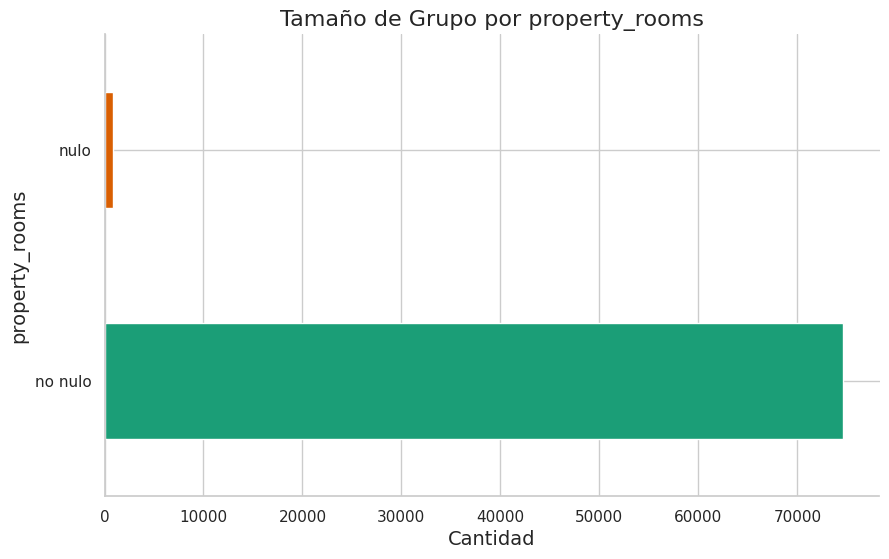

In [ ]:
generar_grafico(habitaciones_dormis,'property_rooms')

In [ ]:
imprimir_cantidades(habitaciones_dormis.value_counts()[1], habitaciones_dormis.value_counts()[0], 'property_bedrooms')

Cantidad de datos NULOS en property_bedrooms: 8432
Cantidad de datos NO NULOS en property_bedrooms: 66141


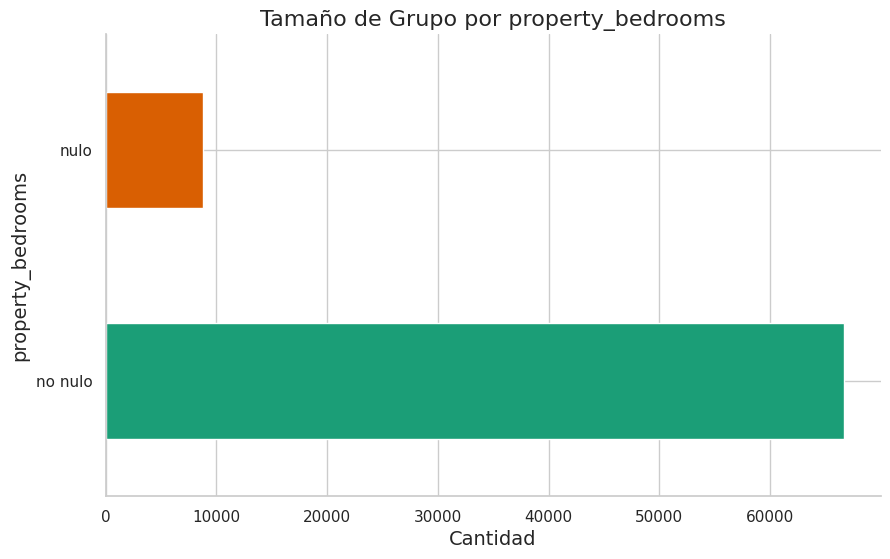

In [ ]:
generar_grafico(habitaciones_dormis,'property_bedrooms')

#### Barrio (place_l3)

In [ ]:
# establezco si son o no nulos
barrio = generar_ds_nulo('place_l3')
# creo filtro si son o no nulos
v_filtro_barrio =  barrio == True
f_filtro_barrio =  barrio == False
# establezco los nulos y no nulos
barrio.loc[v_filtro_barrio] = 'nulo'
barrio.loc[f_filtro_barrio] = 'no nulo'

barrio.head()

152130    no nulo
62001     no nulo
51046     no nulo
159193    no nulo
293794    no nulo
Name: place_l3, dtype: object

In [ ]:
imprimir_cantidades(barrio.value_counts()[1], barrio.value_counts()[0], 'place_l3')

Cantidad de datos NULOS en place_l3: 339
Cantidad de datos NO NULOS en place_l3: 75060


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable place_l3'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

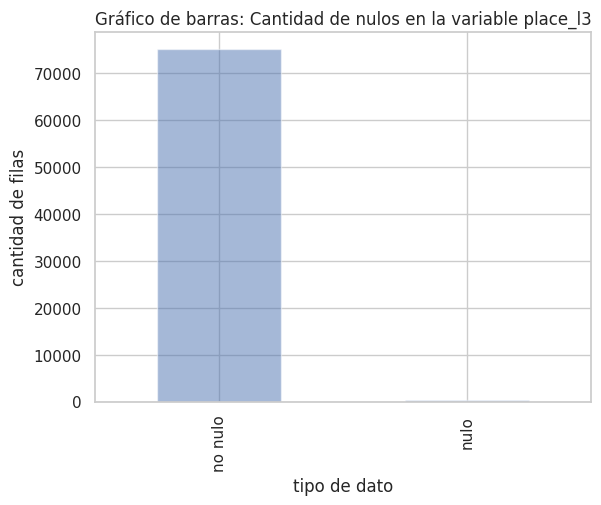

In [ ]:
barrio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable place_l3", xlabel="tipo de dato" , ylabel="cantidad de filas")

#### Precio

In [ ]:
precio = generar_ds_nulo('property_price')
# creo filtro si son o no nulos
v_filtro_precio =  precio == True
f_filtro_precio =  precio == False
# establezco los nulos y no nulos
precio.loc[v_filtro_precio] = 'nulo'
precio.loc[f_filtro_precio] = 'no nulo'

precio.head()

152130    no nulo
62001     no nulo
51046     no nulo
159193    no nulo
293794    no nulo
Name: property_price, dtype: object

In [ ]:
print("Cantidad de datos NO NULOS en property_price: {}".format(precio.value_counts()))

Cantidad de datos NO NULOS en property_price: property_price
no nulo    75399
Name: count, dtype: int64


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_price'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

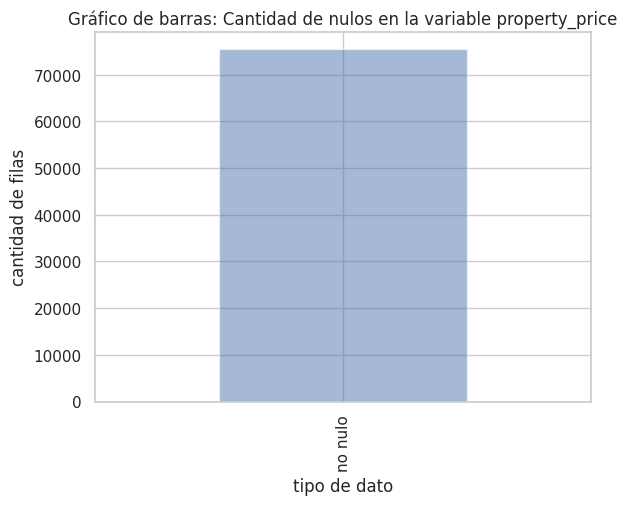

In [ ]:
precio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_price", xlabel="tipo de dato" , ylabel="cantidad de filas")

### Análisis de datos faltantes a nivel fila

Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos
faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de
faltantes por fila en el dataset.


In [ ]:
# Calcular la cantidad de filas nulas
cantidad_filas_nulas = ds_train.isna().sum(axis=1)
filtro = cantidad_filas_nulas > 0
cantidad_filas_nulas = cantidad_filas_nulas[filtro]
print("La cantidad de filas que tienen al menos un dato nulo es: ",len(cantidad_filas_nulas))

La cantidad de filas que tienen al menos un dato nulo es:  17082


<Axes: title={'center': 'Gráfico de barras: Cantidad de filas nulas en ds_train'}, xlabel='cantidad de nulos', ylabel='cantidad de filas'>

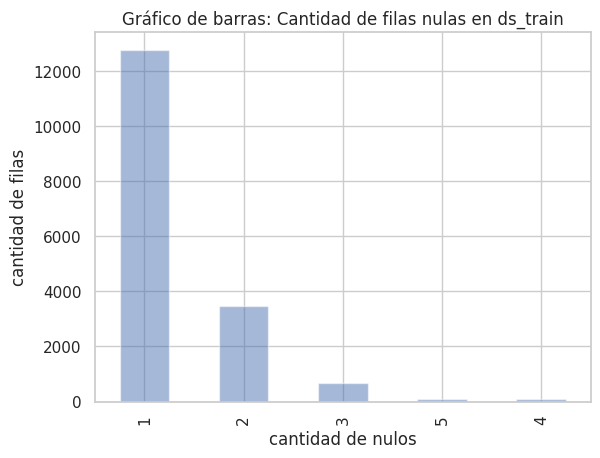

In [ ]:
cantidad_filas_nulas.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de filas nulas en ds_train", xlabel="cantidad de nulos" , ylabel="cantidad de filas")

### Revisión de datos faltantes o mal ingresados

Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de
valores, eliminación de registros incompletos, etc.

Recordemos los datos nulos que tenemos en ds_train

In [ ]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.638085
property_surface_total       5.090253
latitud                      3.988117
longitud                     3.988117
property_surface_covered     3.590233
property_rooms               1.095505
place_l3                     0.449608
dtype: float64

Veremos unas de las estrategias para para trabajar con datos faltantes. Procederemos a imputar datos

#### Imputación Cold Deck
Vamos a trabajar con los datos ```latitud``` y ```longitud``` para completar la variable ```place_l3```.
Para ello vamos a utilizar el csv ```barrios.csv``` provisto por [GCBA](https://data.buenosaires.gob.ar/dataset/barrios/resource/juqdkmgo-191-resource) que nos da la localización y límites geográficos de los barrios de la Ciudad.

Antes de imputar vamos a hacer una copia para analizar la imputación en el siguiente punto.

In [ ]:
ds_pre_imputacion = ds_train.copy()

Para ello vamos a usar Geopandas correspondiente a la documentación wkt

In [ ]:
ds_barrios = pd.read_csv(barrios_file, header=0,sep=';')
def completar_barrios(ds):
  for index, propiedad in ds.iterrows():
    if isinstance(propiedad["place_l3"], str):
      continue

    for index,barrio in ds_barrios.iterrows():
      barrio_aux = barrio['BARRIO']
      if barrio_aux == '' or barrio_aux is None:
        continue
      coordenada = Point(propiedad['longitud'],propiedad['latitud'])
      # uso wkt Para deserializar una cadena y obtener un nuevo objeto geométrico del tipo apropiado
      # uso covers para ver si está cubierta la coordenada de ds_barrios por lo que tiene mi ds
      if wkt.loads(barrio['WKT']).covers(coordenada):
        ds.loc[index,'place_l3'] = barrio_aux

  return

completar_barrios(ds_train)
completar_barrios(ds_test)

Visualizamos el dataset para ver si podemos ver algún nulo rápido.

In [ ]:
# Ordenar el DataFrame por 'place_l3'
ds_train_sorted = ds_train.sort_values(by='place_l3')

# Extraer la columna 'place_l3'
place_l3_column = ds_train_sorted['place_l3']

# Elimino la columna 'place_l3' del DataFrame
ds_train_sorted.drop(columns=['place_l3'], inplace=True)

# Inserto la columna 'place_l3' en la primera posición
ds_train_sorted.insert(0, 'place_l3', place_l3_column)

# Ahora ds_train_sorted tiene 'place_l3' como la primera columna
# para visualizarlo mejor
ds_train_sorted

place_l3                        id  start_date    end_date  \
27      AGRONOMIA                       NaN         NaN         NaN   
4         ALMAGRO                       NaN         NaN         NaN   
222045     Abasto  XnK33hgh5L9Eky30z+xe1g==  2021-10-11  2022-02-09   
352366     Abasto  HkVgSGojTqjOK1nIW9FJWQ==  2021-06-25  9999-12-31   
99874      Abasto  zXwpMvUKrRXXO5A1vyc1dQ==  2021-10-30  2021-11-07   
...           ...                       ...         ...         ...   
32695         NaN  pXTYXzkPghBWvbnQ8oOJlQ==  2021-02-08  2022-03-25   
130461        NaN  F+Cl6rdsPmk/EsPK/pQyIA==  2021-05-27  2021-06-05   
309009        NaN  lueG6ZNaiqX2qrMCJHFeyg==  2021-09-01  2022-03-09   
19432         NaN  0aconk7ts22QpC2oohza4g==  2021-01-27  9999-12-31   
286975        NaN  TO9zmGEevDqKAwW4/Ear4w==  2021-06-16  2021-11-04   

       created_on    latitud   longitud property_type  property_rooms  \
27            NaT        NaN        NaN           NaN             NaN   
4             NaT        NaN        NaN           NaN             NaN   
222045 2021-10-11 -34.607800 -58.408960  Departamento             4.0   
352366 2021-06-25 -34.603281 -58.395433  Departamento             4.0   
99874  2021-10-30 -34.603709 -58.413119  Departamento             2.0   
...           ...        ...        ...           ...             ...   
32695  2021-02-08 -24.770804 -65.400812          Casa             5.0   
130461 2021-05-27 -31.493185 -60.426737          Casa             NaN   
309009 2021-09-01        NaN        NaN          Casa             NaN   
19432  2021-01-27 -34.621637 -58.391566  Departamento             1.0   
286975 2021-06-16        NaN        NaN  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
27                    NaN                     NaN                       NaN   
4                     NaN                     NaN                       NaN   
222045                3.0                    79.0                      77.0   
352366                3.0                    94.0                      94.0   
99874                 1.0                    47.0                      41.0   
...                   ...                     ...                       ...   
32695                 4.0                   588.0                     523.0   
130461                3.0                    57.0                      80.0   
309009                6.0                  2200.0                     500.0   
19432                 NaN                    46.0                      36.0   
286975                NaN                     NaN                      38.0   

        property_price  
27                 NaN  
4                  NaN  
222045        100000.0  
352366        160000.0  
99874         144900.0  
...                ...  
32695        1600000.0  
130461         15500.0  
309009       1500000.0  
19432          89000.0  
286975         78000.0  

[75417 rows x 13 columns]

Vemos que hay datos NaN en el barrio

In [ ]:
ds_train['place_l3'].isna().value_counts()

place_l3
False    75078
True       339
Name: count, dtype: int64

Estos datos en NaN pueden ser datos mal ingresados. Se ingresó mal la coordenada de la propiedad y se la clasificó como Capital Federal. Lo mismo puede suceder de que no tengan latitud ni longitud. Procedo a eliminar dichos datos

In [ ]:
columnas_a_eliminar = ['latitud','longitud','place_l3']
ds_train = ds_train.dropna(subset=columnas_a_eliminar)
ds_test =  ds_test.dropna(subset=columnas_a_eliminar)

Verifico mis datos_nulos en mi dataset

In [ ]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.499889
property_surface_total       4.988087
property_surface_covered     3.566877
property_rooms               0.941933
dtype: float64

#### Análisis de property's
Ahora vamos a seguir con el análisis de las siguientes variables:
*     property_bedrooms
*     property_rooms
*     property_surface_total
*     property_surface_covered

Podemos identificar que estas variables son tipos de datos faltantes MAR.

##### Análisis de ceros

Para empezar verifico si alguno de estos datos es negativo. Pues valores negativos para alguno de estos atributos no tiene sentido.

In [ ]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                          True
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Vemos que existen valores menores o iguales que 0 en el atributo ```property_bedrooms```. Procedo a ver cuantos registros cumplen con esta condición.

In [ ]:
filtro = ds_propiedades_filtradas['property_bedrooms'] < 1
ds_propiedades_filtradas[filtro]

id  start_date    end_date  created_on  \
406880  3WI+zCCMeb9TR5kOBm7rhg==  2021-01-07  2021-03-18  2021-01-07   

          latitud   longitud         place_l2       place_l3 place_l4  \
406880 -34.577595 -58.495185  Capital Federal  Villa Urquiza      NaN   

       place_l5  place_l6 operation property_type  property_rooms  \
406880      NaN       NaN     Venta  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
406880               -1.0                    61.0                      43.0   

        property_price property_currency  \
406880        125000.0               USD   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...

Como hay un registro, procederemos a asignarlo nulo.

In [ ]:
ds_train.loc[ds_train['property_bedrooms'] < 1,'property_bedrooms'] = np.nan

Se verifica si hay valores menores o iguales que cero.

In [ ]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Se realiza el mismo análisis con ds_test

In [ ]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_test[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

##### Análisis de duplicados

Verificamos si hay datos duplicados en estas columnas

In [ ]:
ds_train[ds_train.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_test[ds_test.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

Procederemos a eliminar filas duplicadas

In [ ]:
size_antes = len(ds_train)
ds_train_filtrado = ds_train.drop_duplicates()
size_despues = len(ds_train_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_train")

Se eliminaron: 0 filas duplicadas de ds_train


In [ ]:
ds_train_filtrado.reset_index(drop=True, inplace=True)

In [ ]:
size_antes = len(ds_test)
ds_test_filtrado = ds_test.drop_duplicates()
size_despues = len(ds_test_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_test")

Se eliminaron: 0 filas duplicadas de ds_test


In [ ]:
ds_test_filtrado.reset_index(drop=True, inplace=True)

##### Completacion de las columnas de forma multivariada

Como las variables faltantes son datos de tipo MAR (Missing At Random), elijiremos el proceso de imputación de datos MICE (Multivariate Imputation by Chained Equations)

In [ ]:
# la variable columnas_con_numeros tiene las columnas a analizar
lr = LinearRegression()
imp = IterativeImputer(
    estimator=lr,
    missing_values = np.nan,
    max_iter = 20,
    verbose = 0,
    random_state = 0,
    min_value = 1
)


def rellenar_variables(ds,columnas):
  df_eliminar_nans_op3_completo = ds[columnas].copy()
  ds[columnas] = imp.fit_transform(df_eliminar_nans_op3_completo)

rellenar_variables(ds_train,columnas_con_numeros)
rellenar_variables(ds_test,columnas_con_numeros)

ds_train[columnas_con_numeros] = ds_train[columnas_con_numeros].round()
ds_test[columnas_con_numeros] = ds_test[columnas_con_numeros].round()


In [ ]:
obtener_promedio_nulos(ds_train)

id                          0.0
start_date                  0.0
end_date                    0.0
created_on                  0.0
latitud                     0.0
longitud                    0.0
place_l3                    0.0
property_type               0.0
property_rooms              0.0
property_bedrooms           0.0
property_surface_total      0.0
property_surface_covered    0.0
property_price              0.0
dtype: float64

In [ ]:
obtener_cantidad_nulos(ds_train)

'No existen valores NaN'

### Comparación de distribuciones
En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con
la distribución anterior a la imputación de los datos faltantes.

Para ello veamos nuestro ```ds_pre_imputacion```

In [ ]:
ds_pre_imputacion.head()

id  start_date    end_date created_on  \
152130  WdwW+njifJaAx+6GEb4Hdg==  2021-08-05  9999-12-31 2021-08-05   
62001   SR7AY4G7Cm11MDGP+geKgA==  2021-05-01  2021-06-05 2021-05-01   
51046   QZIxx+N2GuKzSMOoAxUcPQ==  2021-06-23  2021-10-18 2021-06-23   
159193  Nm3DjXksy709Lyo2zZkb7Q==  2021-11-13  2022-01-15 2021-11-13   
293794  9HQQvH9rPnePfqrrCbRoLA==  2021-02-23  2022-04-13 2021-02-23   

          latitud   longitud      place_l3 property_type  property_rooms  \
152130 -34.636634 -58.484079      Floresta  Departamento             1.0   
62001  -34.576115 -58.433387       Palermo  Departamento             3.0   
51046  -34.592109 -58.407433      Recoleta  Departamento             3.0   
159193 -34.620389 -58.457624     Caballito  Departamento             3.0   
293794 -34.601192 -58.431567  Villa Crespo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
152130                NaN                    36.0                      33.0   
62001                 2.0                    73.0                      70.0   
51046                 2.0                    88.0                      84.0   
159193                2.0                    58.0                      53.0   
293794                2.0                    61.0                      61.0   

        property_price  
152130         71000.0  
62001         165000.0  
51046         220000.0  
159193        139000.0  
293794        110000.0

Recordemos que datos imputamos

In [ ]:
nulos_preimputacion

property_bedrooms           11.638085
property_surface_total       5.090253
latitud                      3.988117
longitud                     3.988117
property_surface_covered     3.590233
property_rooms               1.095505
place_l3                     0.449608
dtype: float64

In [ ]:
nulos_preimputacion.index.tolist()

['property_bedrooms',
 'property_surface_total',
 'latitud',
 'longitud',
 'property_surface_covered',
 'property_rooms',
 'place_l3']

Para ver la distribuciones de las variables imputadas vamos a utilizar un gráfico de distribución continua BoxPlot. El cual nos va a ayudar a visualizar la distribución de los datos y la asimetría de los mismos mediante la visualización de cuartiles y promedios de los datos.

#### Funciones de distribución

In [ ]:
def generar_distribucion(variable):
  # Configuración de estilo y colores
  sns.set(style="whitegrid")
  sns.set_palette("pastel")

  # Creo la cuadrícula de subgráficos con una fila y dos columnas
  fig, axes = plt.subplots(1, 2, figsize=(12, 12))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0], width=0.5)
  axes[0].set_title("Boxplot {} pre-imputación".format(variable), fontsize=14)
  axes[0].set_ylabel("Valor", fontsize=12)
  axes[0].set_xlabel("", fontsize=12)

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1], width=0.5)
  axes[1].set_title("Boxplot {} post-imputación".format(variable), fontsize=14)
  axes[1].set_ylabel("Valor", fontsize=12)
  axes[1].set_xlabel("", fontsize=12)

  # Ajusto el diseño
  plt.tight_layout()

  plt.show()

  return

In [ ]:
def generar_distribucion_zoom(variable):
  fig, axes = plt.subplots(1, 2, figsize=(12, 12))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0])
  axes[0].set_title("Boxplot {} pre-imputacion".format(variable))
  axes[0].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1])
  axes[1].set_title("Boxplot {} post-imputacion".format(variable))
  axes[1].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Ajustar el diseño
  plt.tight_layout()

  plt.show()
  return

In [ ]:
def obtener_cantidad_variables(ds,columna):
  analisis = ds[columna].value_counts().reset_index()
  analisis.columns = [columna, 'cantidad']
  return analisis

In [ ]:
def comparar_imputacion(pre, post, columna):
    longitud_post = len(post)
    longitud_pre = len(pre)

    for i in range(longitud_post):
        # Verificar si i es mayor que la longitud de pre
        if i >= longitud_pre:
            print("i es mayor que la longitud de pre. Se corta el bucle.")
            break

        registros_imputados = post['cantidad'][i] - pre['cantidad'][i]
        registros_imputados = abs(registros_imputados)  # Tomar el valor absoluto
        print("{} registros se imputaron con el valor de {} {}".format(registros_imputados, post[columna][i], columna))

    return

#### Comparación property_bedrooms

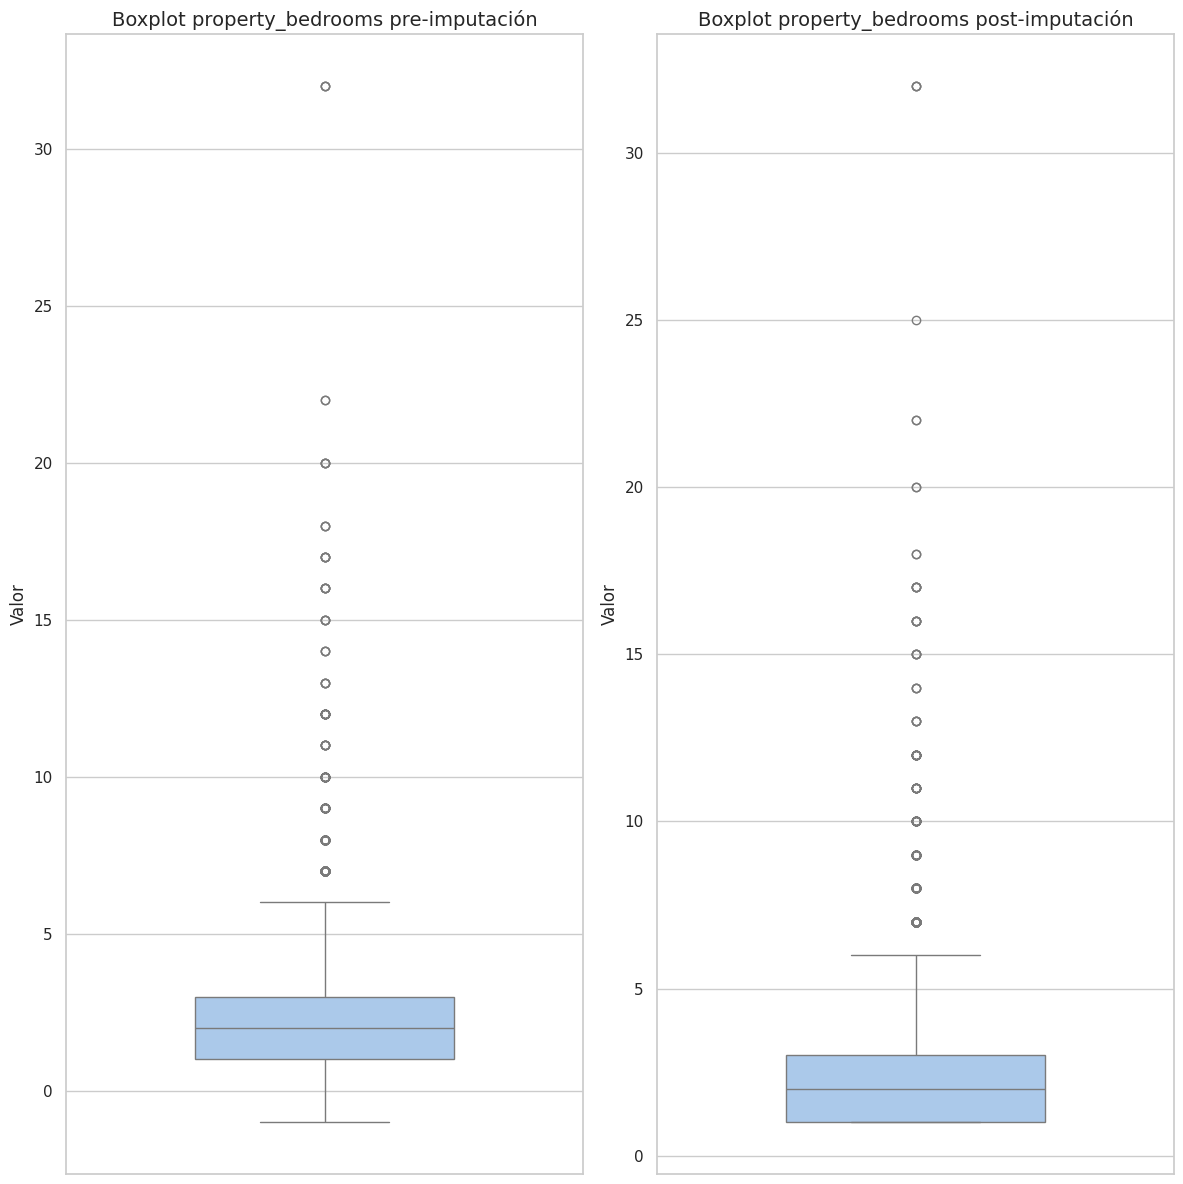

In [ ]:
generar_distribucion("property_bedrooms")

Un poco de zoom

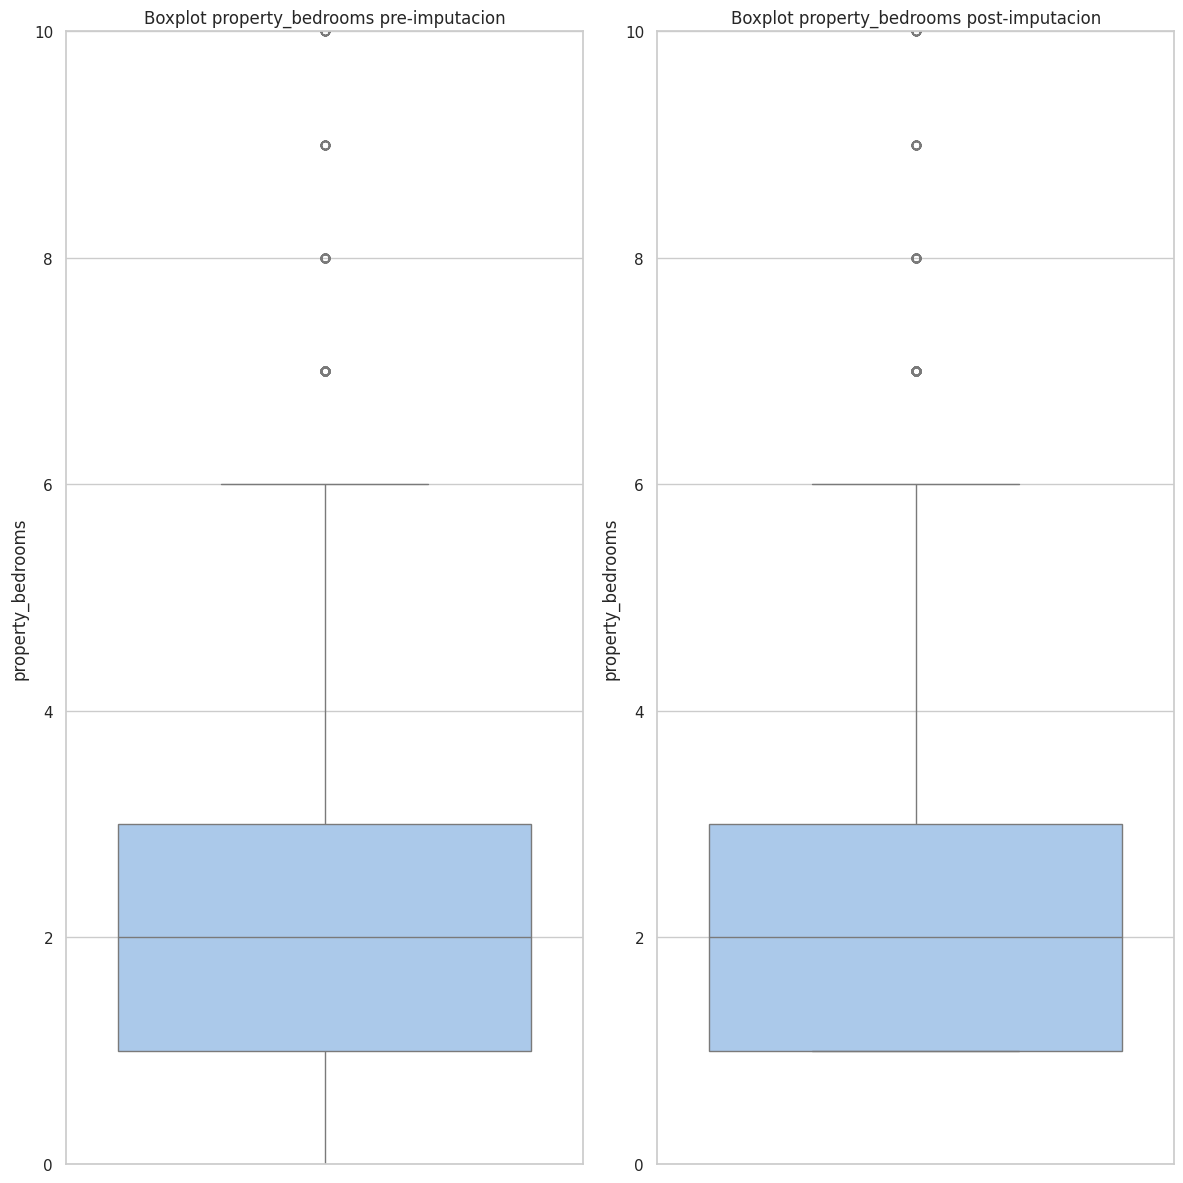

In [ ]:
generar_distribucion_zoom("property_bedrooms")

La comparación de los boxplots revela una gran coherencia en la distribución de la variable entre los conjuntos de datos antes y después de la imputación. Aunque se observa una discrepancia leve entre los valores de aproximadamente 20 y 30, esta diferencia es mínima en comparación con la totalidad de los datos. Esto sugiere que las imputaciones se realizaron de manera consistente y dentro de los límites razonables de la variable, sin introducir valores atípicos o extremos.

Vamos a analizar cada property_bedrooms

In [ ]:
pre_bedrooms = obtener_cantidad_variables(ds_pre_imputacion,'property_bedrooms')
pre_bedrooms.head()

property_bedrooms  cantidad
0                1.0     25575
1                2.0     22022
2                3.0     14079
3                4.0      3788
4                5.0       736

In [ ]:
post_bedrooms = obtener_cantidad_variables(ds_train,'property_bedrooms')
post_bedrooms.head()

property_bedrooms  cantidad
0                1.0     32197
1                2.0     21692
2                3.0     13594
3                4.0      3601
4                5.0       687

Con esto podemos ver la cantidad de imputaciones que se hicieron gracias al método MICE.

In [ ]:
comparar_imputacion(pre_bedrooms,post_bedrooms,'property_bedrooms')

6622 registros se imputaron con el valor de 1.0 property_bedrooms
330 registros se imputaron con el valor de 2.0 property_bedrooms
485 registros se imputaron con el valor de 3.0 property_bedrooms
187 registros se imputaron con el valor de 4.0 property_bedrooms
49 registros se imputaron con el valor de 5.0 property_bedrooms
9 registros se imputaron con el valor de 6.0 property_bedrooms
4 registros se imputaron con el valor de 7.0 property_bedrooms
1 registros se imputaron con el valor de 8.0 property_bedrooms
3 registros se imputaron con el valor de 9.0 property_bedrooms
0 registros se imputaron con el valor de 10.0 property_bedrooms
0 registros se imputaron con el valor de 12.0 property_bedrooms
3 registros se imputaron con el valor de 11.0 property_bedrooms
0 registros se imputaron con el valor de 17.0 property_bedrooms
0 registros se imputaron con el valor de 16.0 property_bedrooms
0 registros se imputaron con el valor de 15.0 property_bedrooms
0 registros se imputaron con el valor d

Podemos concluir que la mayoría de los datos nulos en la variable property_bedrooms fueron llenados con la cantidad de un dormitorio

#### Comparación property_rooms

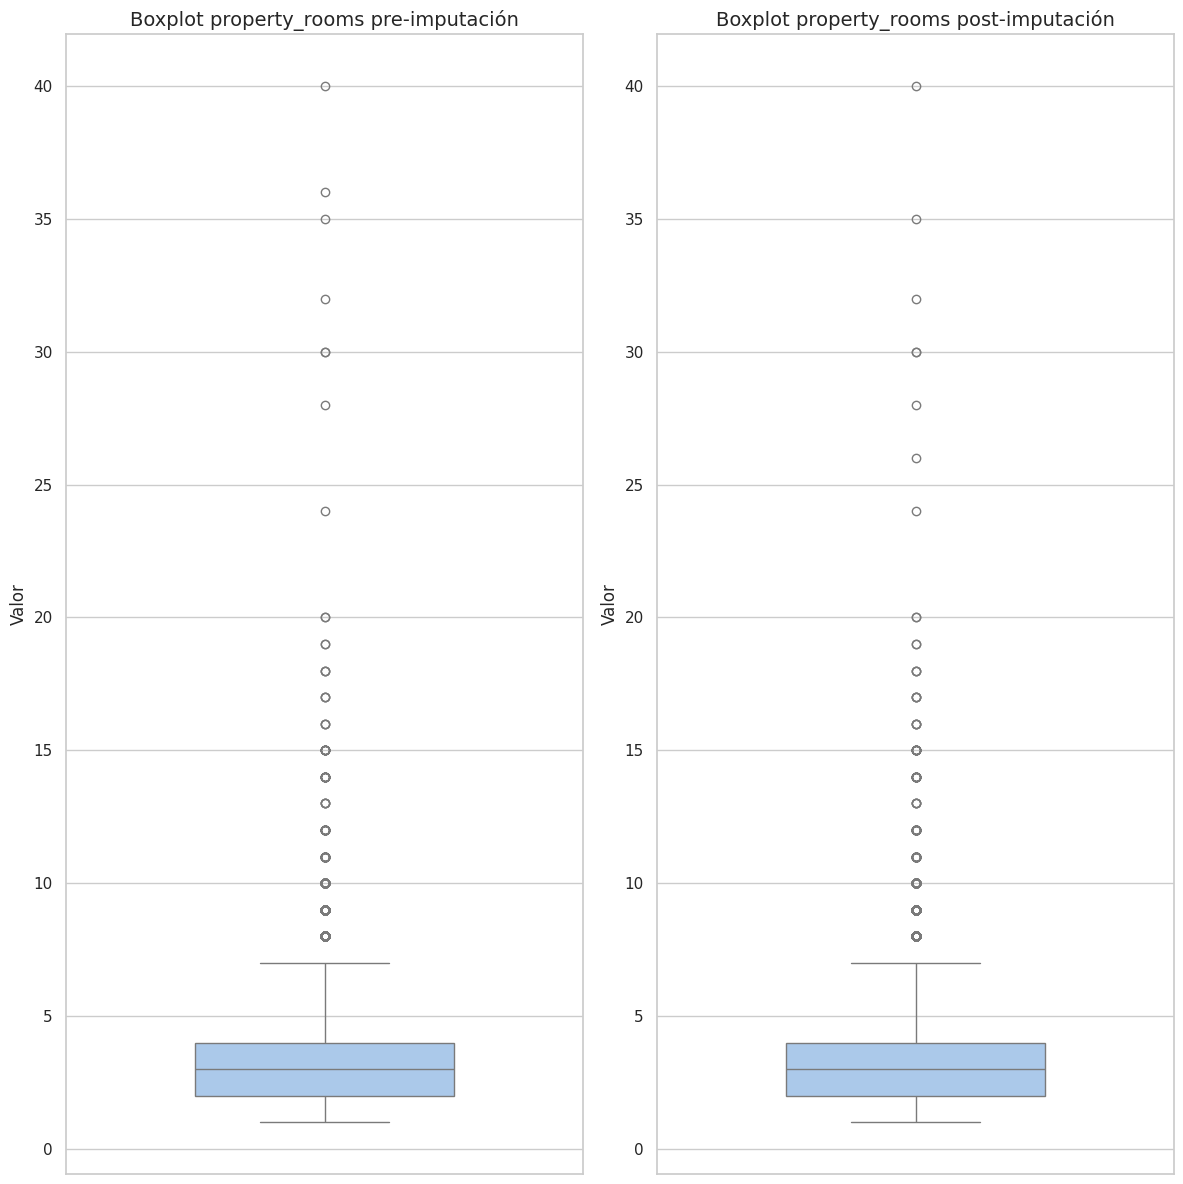

In [ ]:
generar_distribucion("property_rooms")

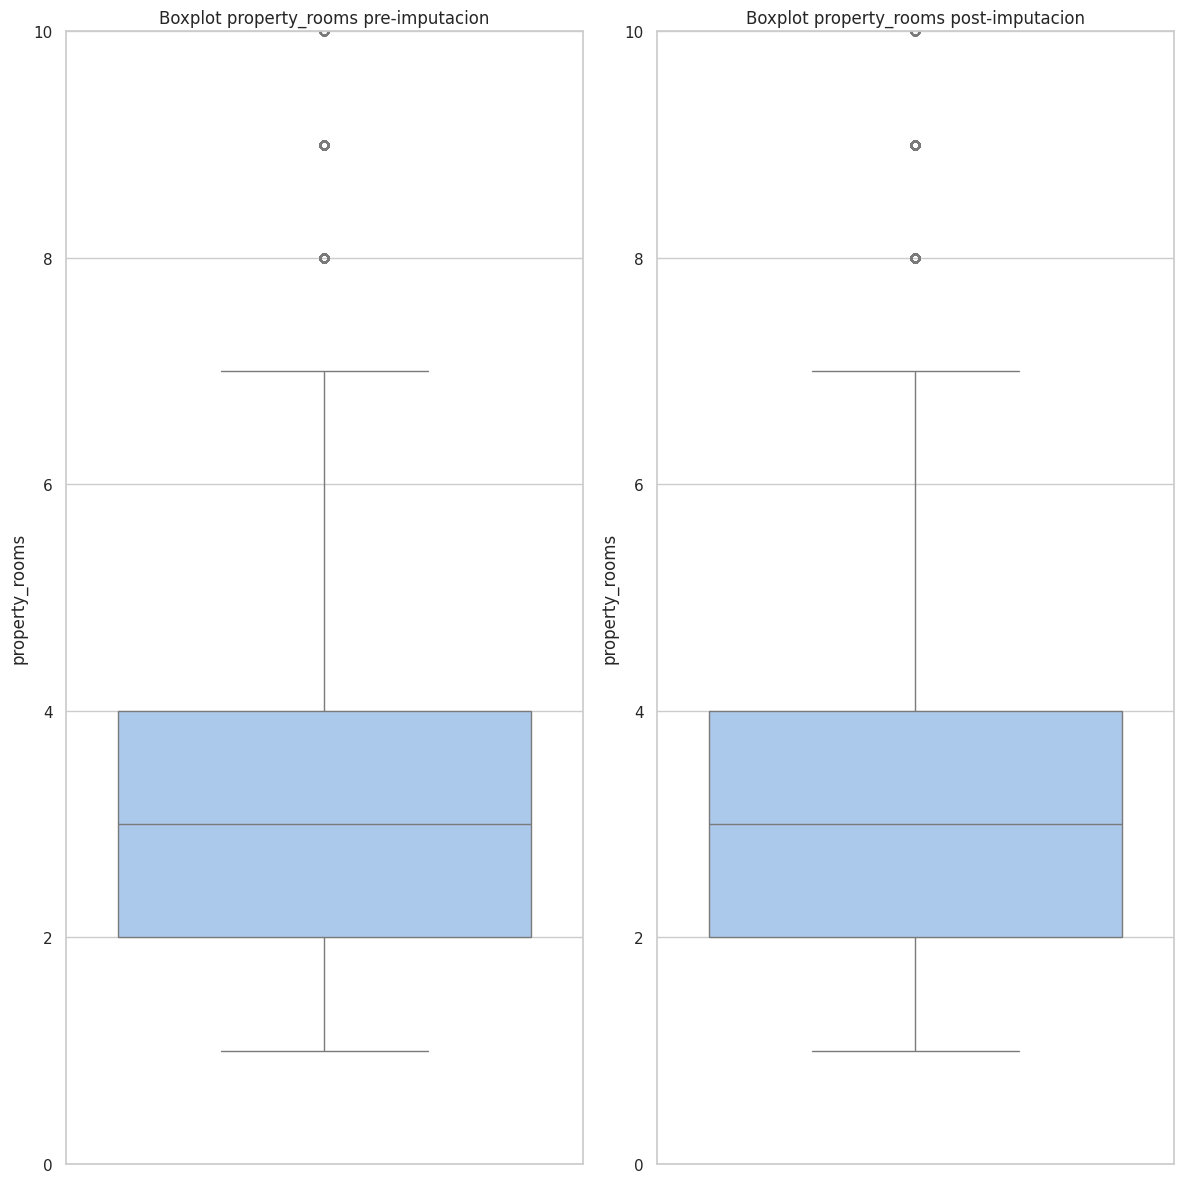

In [ ]:
generar_distribucion_zoom("property_rooms")

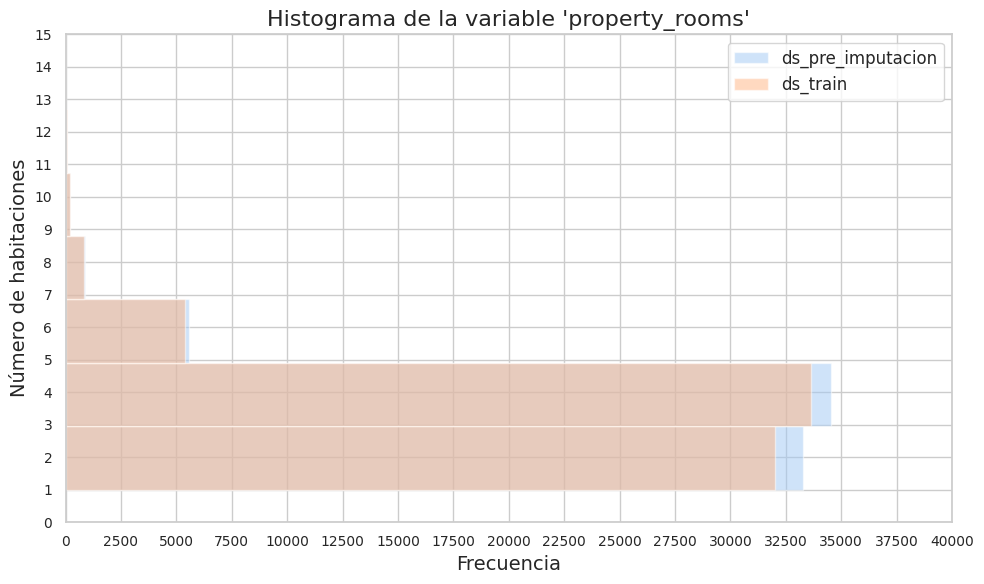

In [ ]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Histograma para ds_pre_imputacion en el eje y (invertido)
plt.hist(ds_pre_imputacion['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_pre_imputacion')

# Histograma para ds_train en el eje y (invertido)
plt.hist(ds_train['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_train')

# Ajustes de título y etiquetas
plt.title("Histograma de la variable 'property_rooms'", fontsize=16)
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Número de habitaciones", fontsize=14)

# Ajustes de límites de los ejes (zoom)
plt.ylim(0, 15)
plt.xlim(0, 40000)

# Establecer intervalos del eje x
plt.xticks(np.arange(0, 40001, 2500), fontsize=10)

# Añadir leyenda
plt.legend(fontsize=12)

# Establecer intervalos del eje y
plt.yticks(np.arange(16), fontsize=10)

plt.tight_layout()
plt.show()

<Axes: xlabel='property_rooms'>

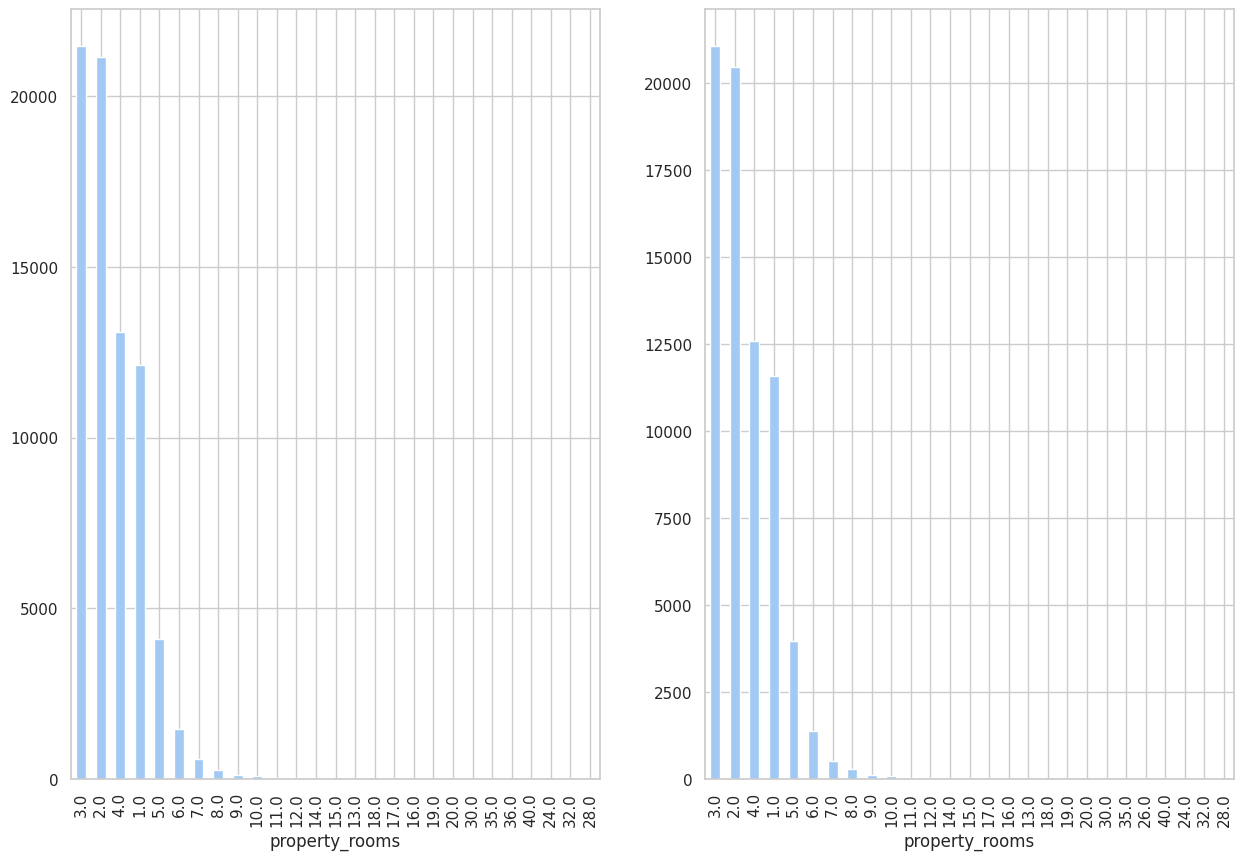

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
ds_pre_imputacion["property_rooms"].value_counts().plot.bar(ax=axes[0])
ds_train["property_rooms"].round().value_counts().plot.bar(ax=axes[1])

A través de estos gráficos, se observan sutiles discrepancias al asignar la cantidad de habitaciones a la hora de realizar la imputación.

In [ ]:
pre_rooms = obtener_cantidad_variables(ds_pre_imputacion,'property_rooms')
pre_rooms.head()

property_rooms  cantidad
0             3.0     21470
1             2.0     21145
2             4.0     13084
3             1.0     12135
4             5.0      4107

In [ ]:
post_rooms = obtener_cantidad_variables(ds_train,'property_rooms')
post_rooms.head()

property_rooms  cantidad
0             3.0     21059
1             2.0     20452
2             4.0     12584
3             1.0     11578
4             5.0      3981

In [ ]:
comparar_imputacion(pre_rooms,post_rooms,'property_rooms')

411 registros se imputaron con el valor de 3.0 property_rooms
693 registros se imputaron con el valor de 2.0 property_rooms
500 registros se imputaron con el valor de 4.0 property_rooms
557 registros se imputaron con el valor de 1.0 property_rooms
126 registros se imputaron con el valor de 5.0 property_rooms
72 registros se imputaron con el valor de 6.0 property_rooms
42 registros se imputaron con el valor de 7.0 property_rooms
2 registros se imputaron con el valor de 8.0 property_rooms
7 registros se imputaron con el valor de 9.0 property_rooms
1 registros se imputaron con el valor de 10.0 property_rooms
0 registros se imputaron con el valor de 11.0 property_rooms
6 registros se imputaron con el valor de 12.0 property_rooms
2 registros se imputaron con el valor de 14.0 property_rooms
2 registros se imputaron con el valor de 15.0 property_rooms
0 registros se imputaron con el valor de 17.0 property_rooms
1 registros se imputaron con el valor de 16.0 property_rooms
1 registros se imputa

Podemos inferir que la mayoría de los valores faltantes en la variable "property_rooms" fueron sustituidos por la cantidad de dos habitaciones.

#### Comparación property_surface_total

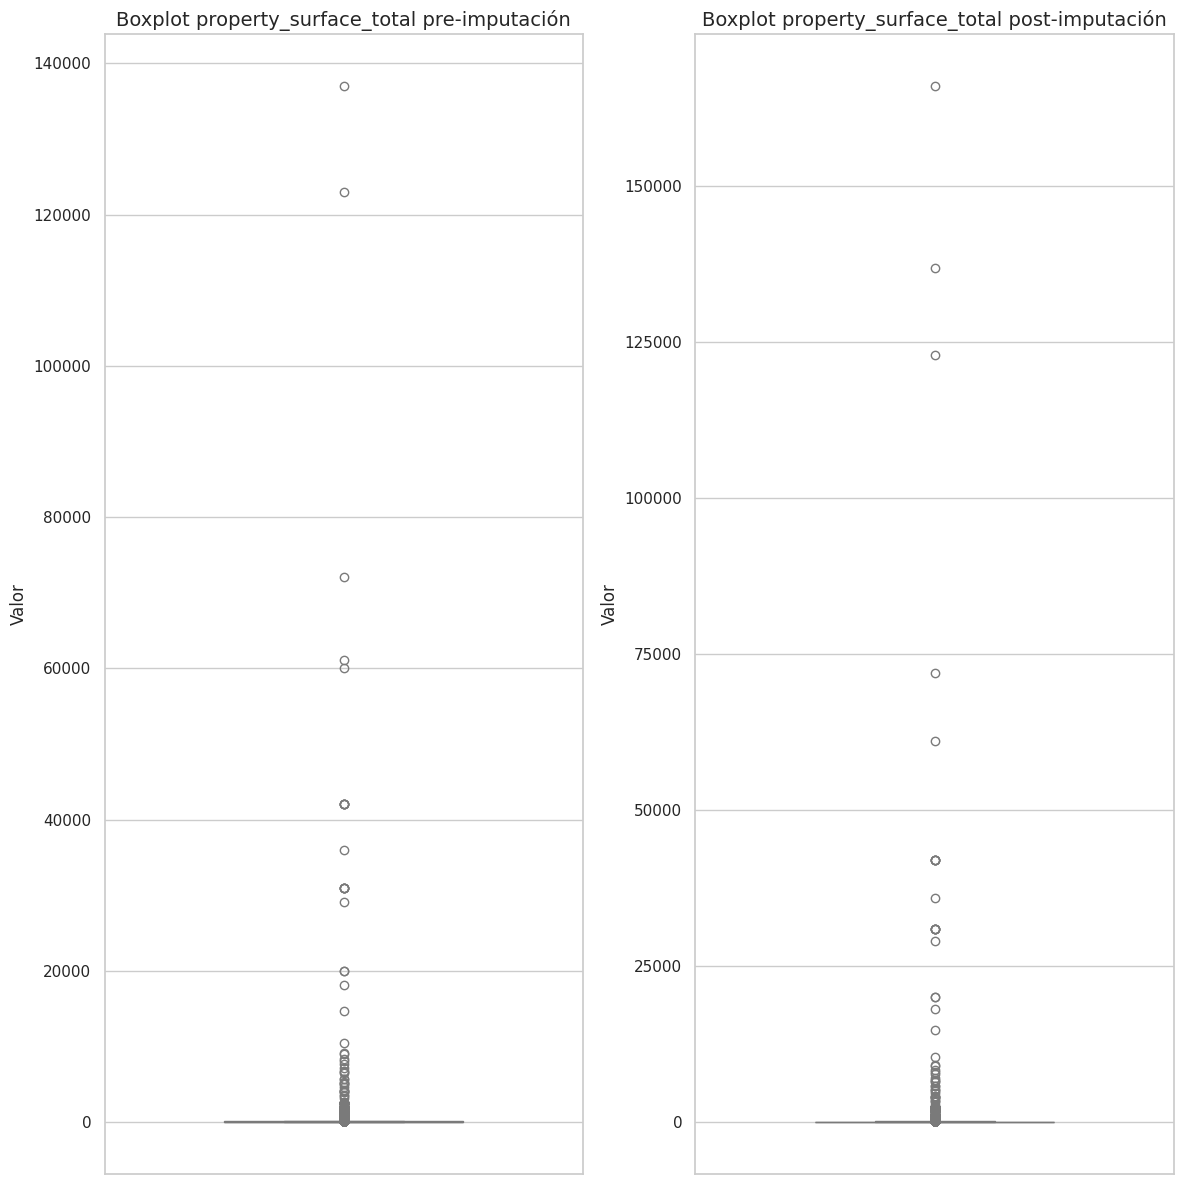

In [ ]:
generar_distribucion("property_surface_total")

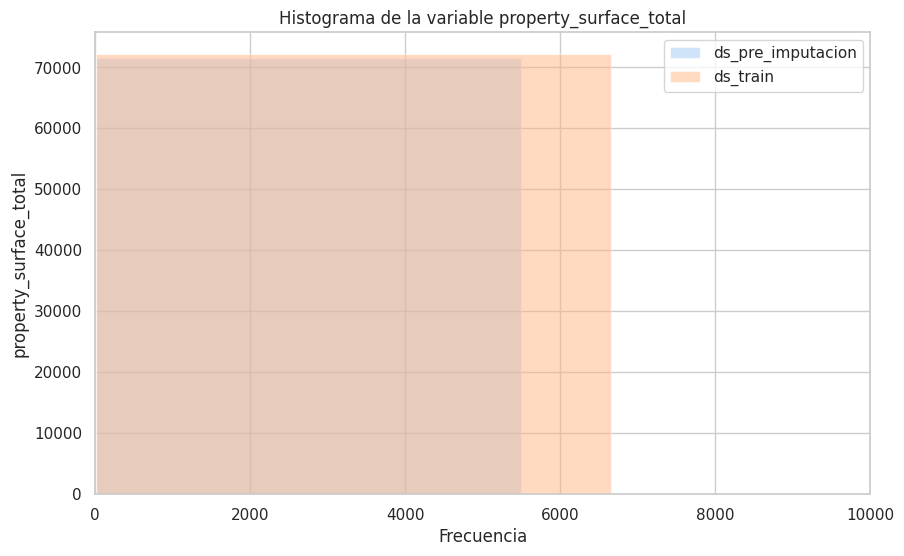

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_total'], bins=25, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_total'], bins=25, alpha=0.5, label='ds_train')

plt.title("Histograma de la variable property_surface_total")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_total")

plt.xlim(0, 10000)

plt.legend()

plt.show()

Observamos una notable disparidad en la cantidad de datos faltantes antes de la imputación de la variable "superficie total".

In [ ]:
pre_total = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_total')
pre_total.head()

property_surface_total  cantidad
0                    50.0      1432
1                    40.0      1364
2                    42.0      1252
3                    45.0      1240
4                    35.0      1216

In [ ]:
post_total = obtener_cantidad_variables(ds_train,'property_surface_total')
post_total.head()

property_surface_total  cantidad
0                    50.0      1417
1                    40.0      1343
2                    42.0      1231
3                    45.0      1221
4                    35.0      1201

In [ ]:
comparar_imputacion(pre_total,post_total,'property_surface_total')

15 registros se imputaron con el valor de 50.0 property_surface_total
21 registros se imputaron con el valor de 40.0 property_surface_total
21 registros se imputaron con el valor de 42.0 property_surface_total
19 registros se imputaron con el valor de 45.0 property_surface_total
15 registros se imputaron con el valor de 35.0 property_surface_total
14 registros se imputaron con el valor de 55.0 property_surface_total
30 registros se imputaron con el valor de 60.0 property_surface_total
8 registros se imputaron con el valor de 38.0 property_surface_total
11 registros se imputaron con el valor de 44.0 property_surface_total
13 registros se imputaron con el valor de 37.0 property_surface_total
5 registros se imputaron con el valor de 43.0 property_surface_total
27 registros se imputaron con el valor de 52.0 property_surface_total
14 registros se imputaron con el valor de 36.0 property_surface_total
2 registros se imputaron con el valor de 34.0 property_surface_total
4 registros se imputaro

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_total" fueron reemplazados con una superficie total de 33 m²


#### Comparación property_surface_covered

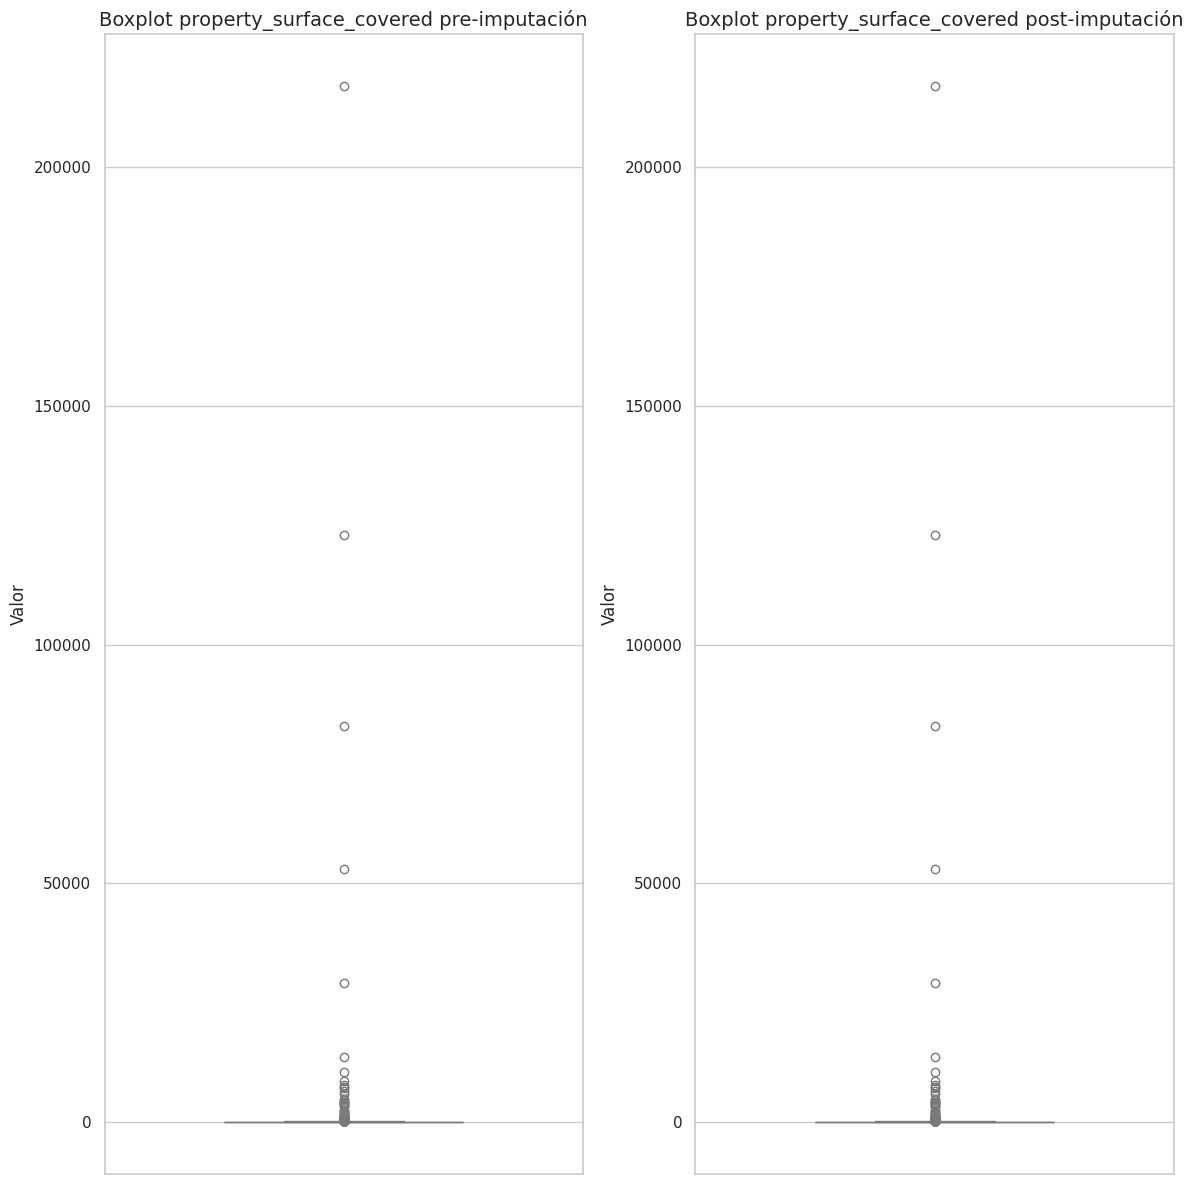

In [ ]:
generar_distribucion("property_surface_covered")

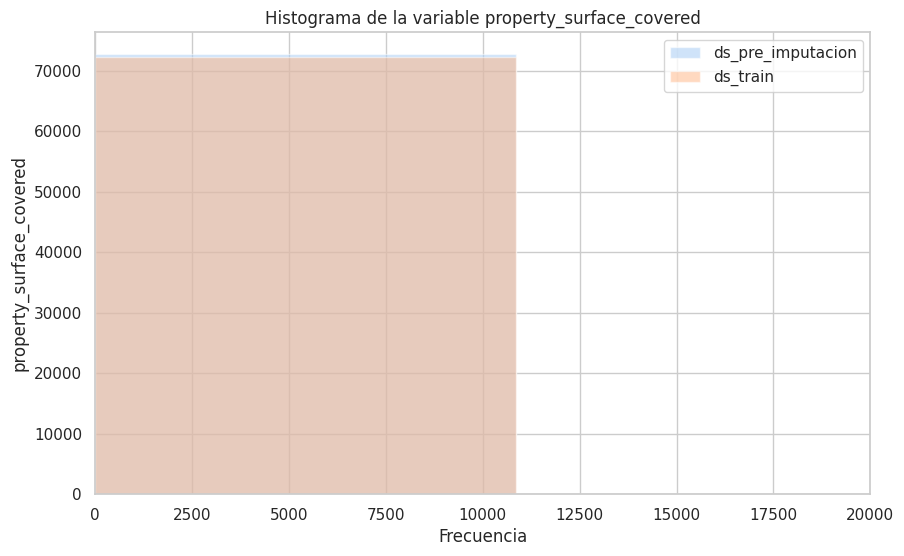

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_covered'], bins=20, alpha=0.5,  label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_covered'], bins=20, alpha=0.5,  label='ds_train')


plt.title("Histograma de la variable property_surface_covered")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_covered")


plt.xlim(0,20000)

plt.legend()

plt.show()

Se observa una ligera disparidad en los datos faltantes. Se puede inferir que se imputaron pocos datos para la variable "property_surface_covered", ya que esta variable era la que estaba entre los menos valores nulos.

In [ ]:
pre_cubierto = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_covered')
pre_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1883
1                      50.0      1636
2                      38.0      1595
3                      45.0      1549
4                      35.0      1483

In [ ]:
post_cubierto = obtener_cantidad_variables(ds_train,'property_surface_covered')
post_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1851
1                      50.0      1581
2                      38.0      1554
3                      45.0      1494
4                      35.0      1471

In [ ]:
comparar_imputacion(pre_cubierto,post_cubierto,'property_surface_covered')

32 registros se imputaron con el valor de 40.0 property_surface_covered
55 registros se imputaron con el valor de 50.0 property_surface_covered
41 registros se imputaron con el valor de 38.0 property_surface_covered
55 registros se imputaron con el valor de 45.0 property_surface_covered
12 registros se imputaron con el valor de 35.0 property_surface_covered
31 registros se imputaron con el valor de 42.0 property_surface_covered
18 registros se imputaron con el valor de 60.0 property_surface_covered
34 registros se imputaron con el valor de 37.0 property_surface_covered
53 registros se imputaron con el valor de 32.0 property_surface_covered
30 registros se imputaron con el valor de 36.0 property_surface_covered
26 registros se imputaron con el valor de 30.0 property_surface_covered
32 registros se imputaron con el valor de 34.0 property_surface_covered
19 registros se imputaron con el valor de 33.0 property_surface_covered
28 registros se imputaron con el valor de 43.0 property_surface_

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_covered" fueron completados con una superficie cubierta de 45 m²

#### Comparación latitud

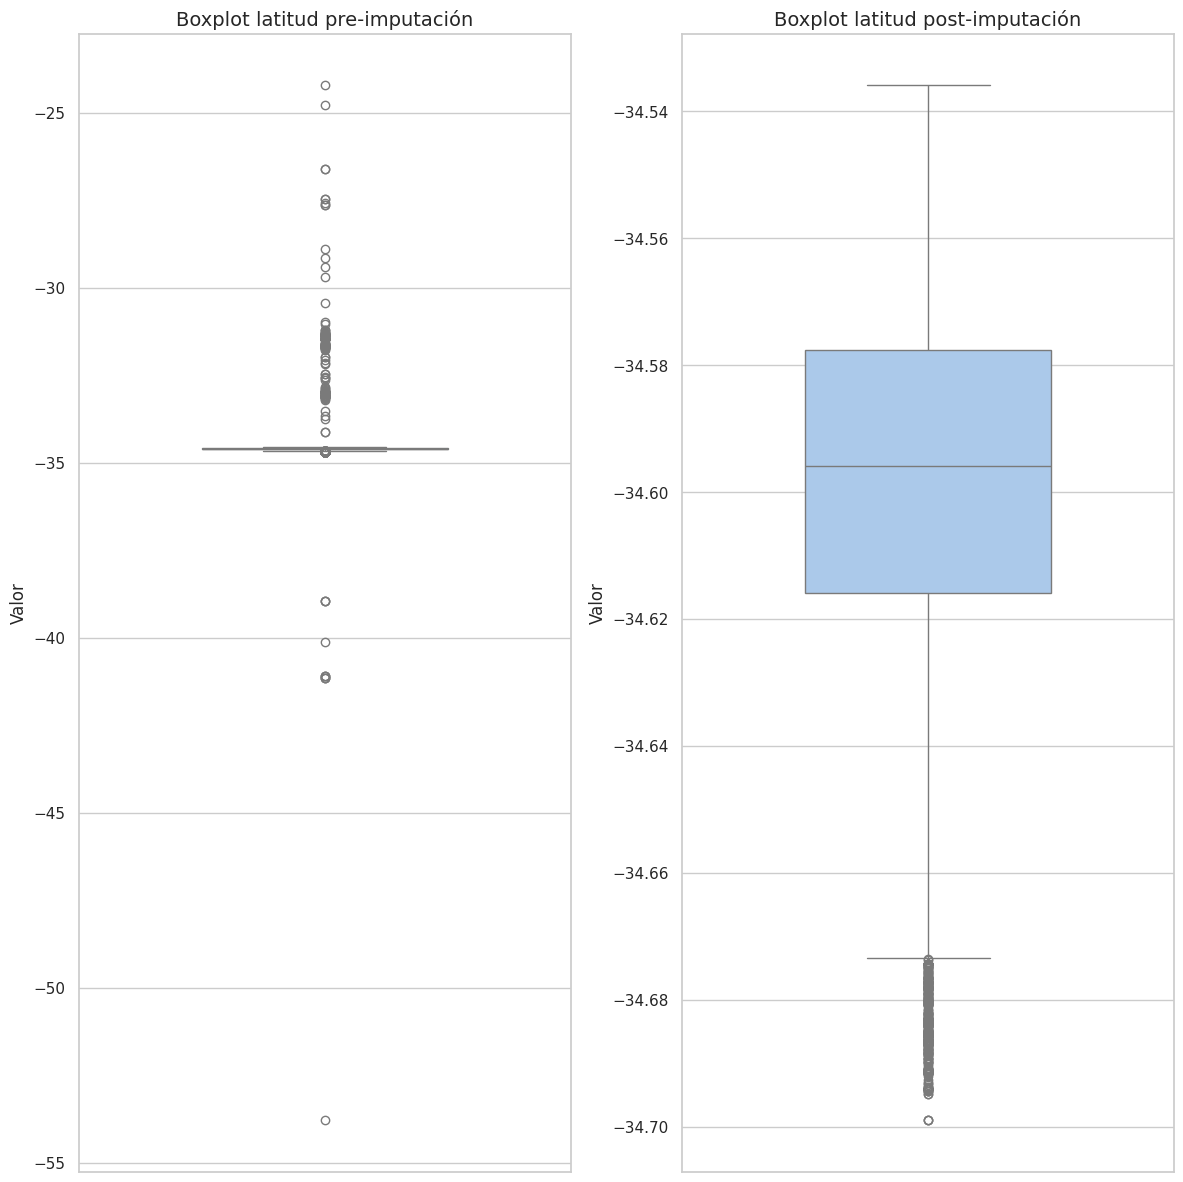

In [ ]:
generar_distribucion("latitud")

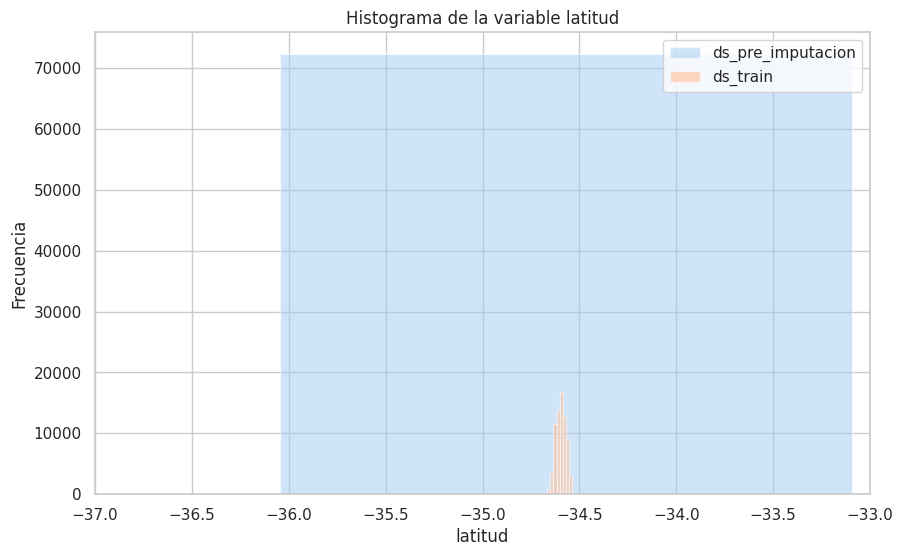

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['latitud'], bins=10, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['latitud'], bins=10, alpha=0.5, label='ds_train')

plt.xlim(-37, -33)

plt.title("Histograma de la variable latitud")
plt.xlabel("latitud")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

Se puede observar que antes de la imputación, la latitud tenía una frecuencia constante para todos sus valores. Sin embargo, al imputar los datos, la frecuencia varía más, generando una distribución en forma de campana de Gauss. Se destaca que la latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -34.58.

In [ ]:
pre_latitud = obtener_cantidad_variables(ds_pre_imputacion,'latitud')
pre_latitud

latitud  cantidad
0     -34.541250       122
1     -34.619406        98
2     -34.604538        89
3     -34.541616        87
4     -34.581910        80
...          ...       ...
39278 -34.583265         1
39279 -34.587579         1
39280 -34.637754         1
39281 -34.584965         1
39282 -34.607636         1

[39283 rows x 2 columns]

In [ ]:
post_latitud = obtener_cantidad_variables(ds_train,'latitud')
post_latitud

latitud  cantidad
0     -34.541250       122
1     -34.619406        98
2     -34.604538        89
3     -34.541616        87
4     -34.581910        80
...          ...       ...
39136 -34.597489         1
39137 -34.647603         1
39138 -34.551673         1
39139 -34.579650         1
39140 -34.607636         1

[39141 rows x 2 columns]

Parecieran ser iguales... pero lo hemos imputado

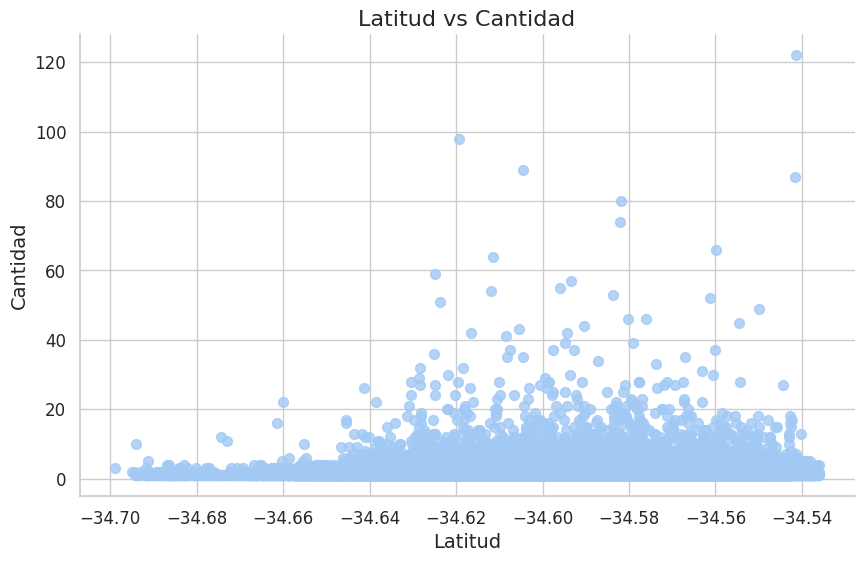

In [ ]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_latitud['latitud'], post_latitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Latitud vs Cantidad", fontsize=16)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
pre_latitud.equals(post_latitud)

False

In [ ]:
print(len(pre_latitud))
print(len(post_latitud))
print('diferencia: {}'.format(len(pre_latitud)-len(post_latitud)))

39283
39141
diferencia: 142


#### Comparación longitud

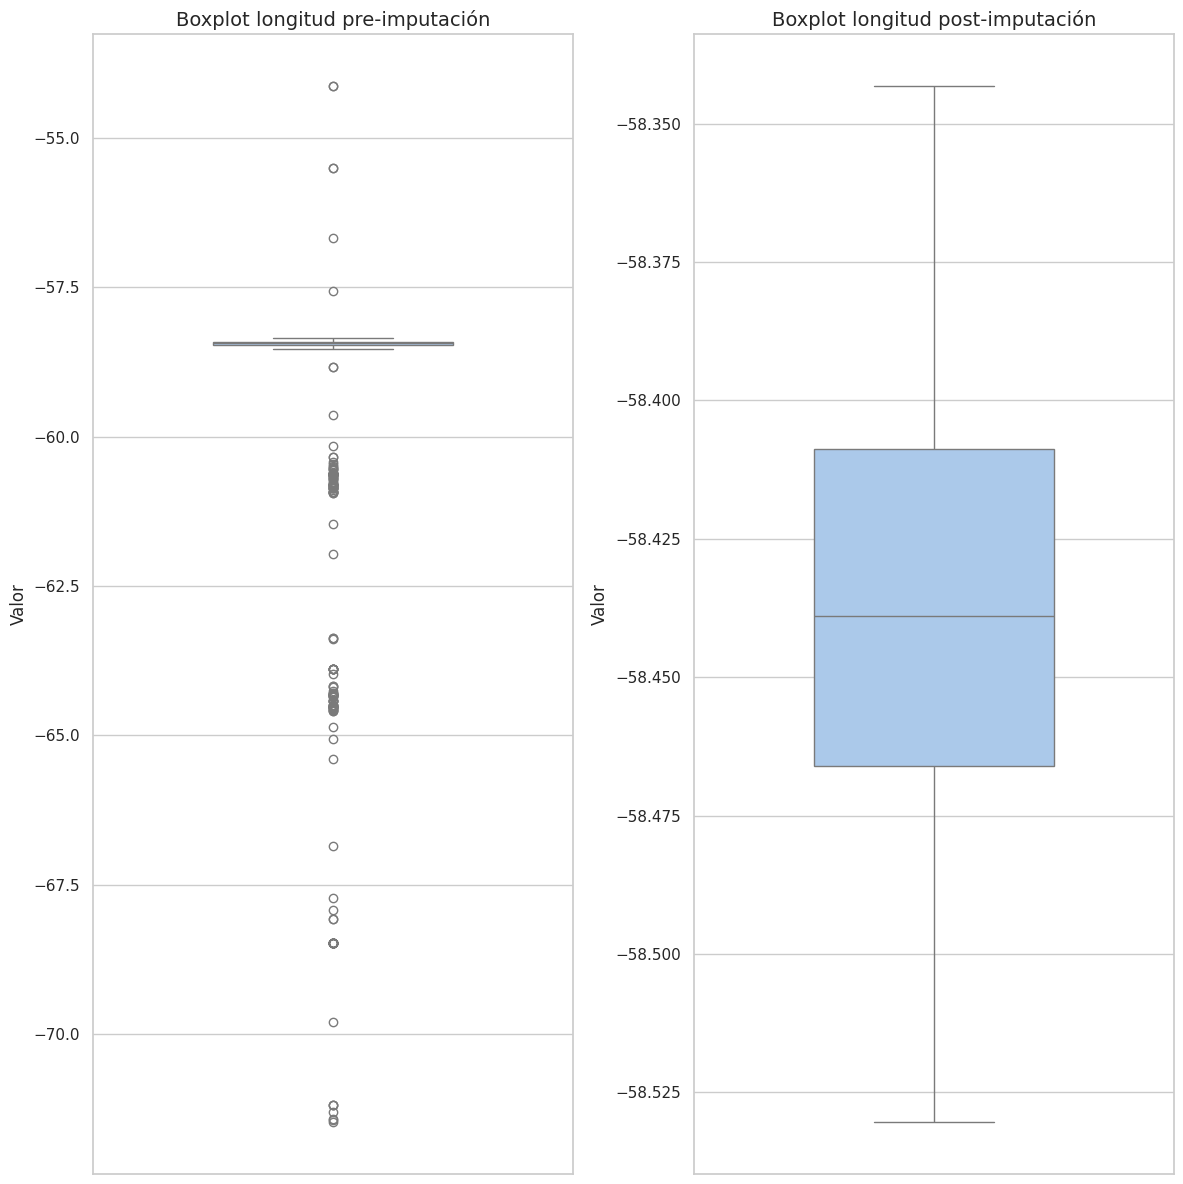

In [ ]:
generar_distribucion("longitud")

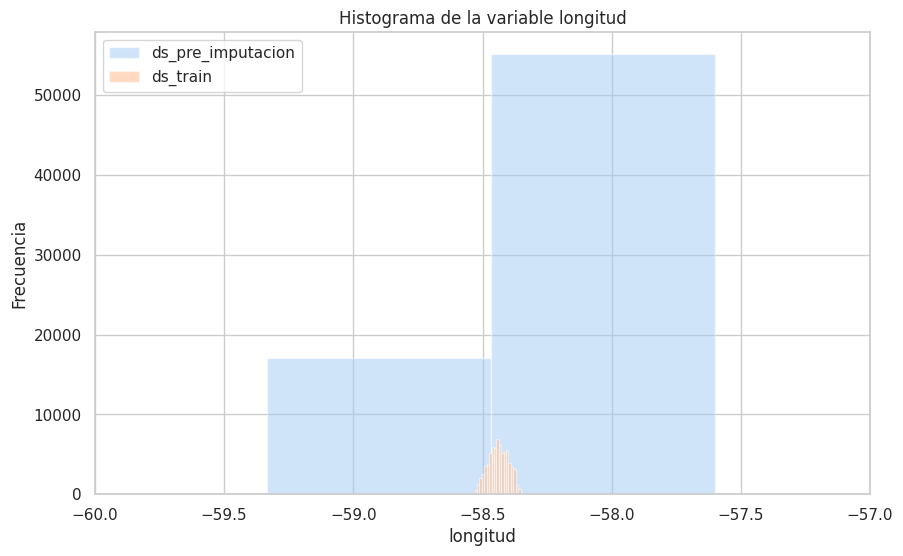

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['longitud'], bins=20, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['longitud'], bins=20, alpha=0.5, label='ds_train')


plt.title("Histograma de la variable longitud")
plt.xlabel("longitud")
plt.ylabel("Frecuencia")

plt.xlim(-60, -57)

plt.legend()

plt.show()

Todos los valores que se mencionarán en el siguiente párrafo se consideran aproximados.

Antes de la imputación, se observa que la latitud tenía una frecuencia medianamente constante. Desde la latitud -59.3 hasta -58.5, la frecuencia es de aproximadamente 18000, luego aumenta en más de 50000 hasta llegar a la latitud -57.5.

Tras la imputación de los datos, se observa una variación en la frecuencia que genera una distribución en forma de campana de Gauss. La latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -58.400.

In [ ]:
pre_longitud = obtener_cantidad_variables(ds_pre_imputacion,'longitud')
pre_longitud.head()

longitud  cantidad
0 -58.472966       122
1 -58.451999        98
2 -58.424956        89
3 -58.473377        87
4 -58.449381        80

In [ ]:
post_longitud = obtener_cantidad_variables(ds_train,'longitud')
post_longitud.head()

longitud  cantidad
0 -58.472966       122
1 -58.451999        98
2 -58.424956        89
3 -58.473377        87
4 -58.449381        80

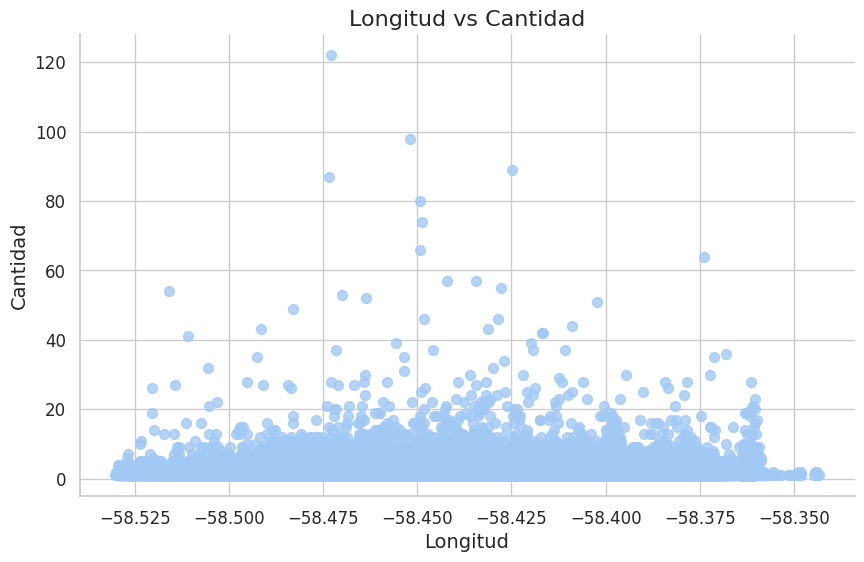

In [ ]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_longitud['longitud'], post_longitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Longitud vs Cantidad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
pre_longitud.equals(post_longitud)

False

In [ ]:
print(len(pre_longitud))
print(len(post_longitud))
print('diferencia: {}'.format(len(pre_longitud)-len(post_longitud)))

39098
38956
diferencia: 142


#### Comparación place_l3

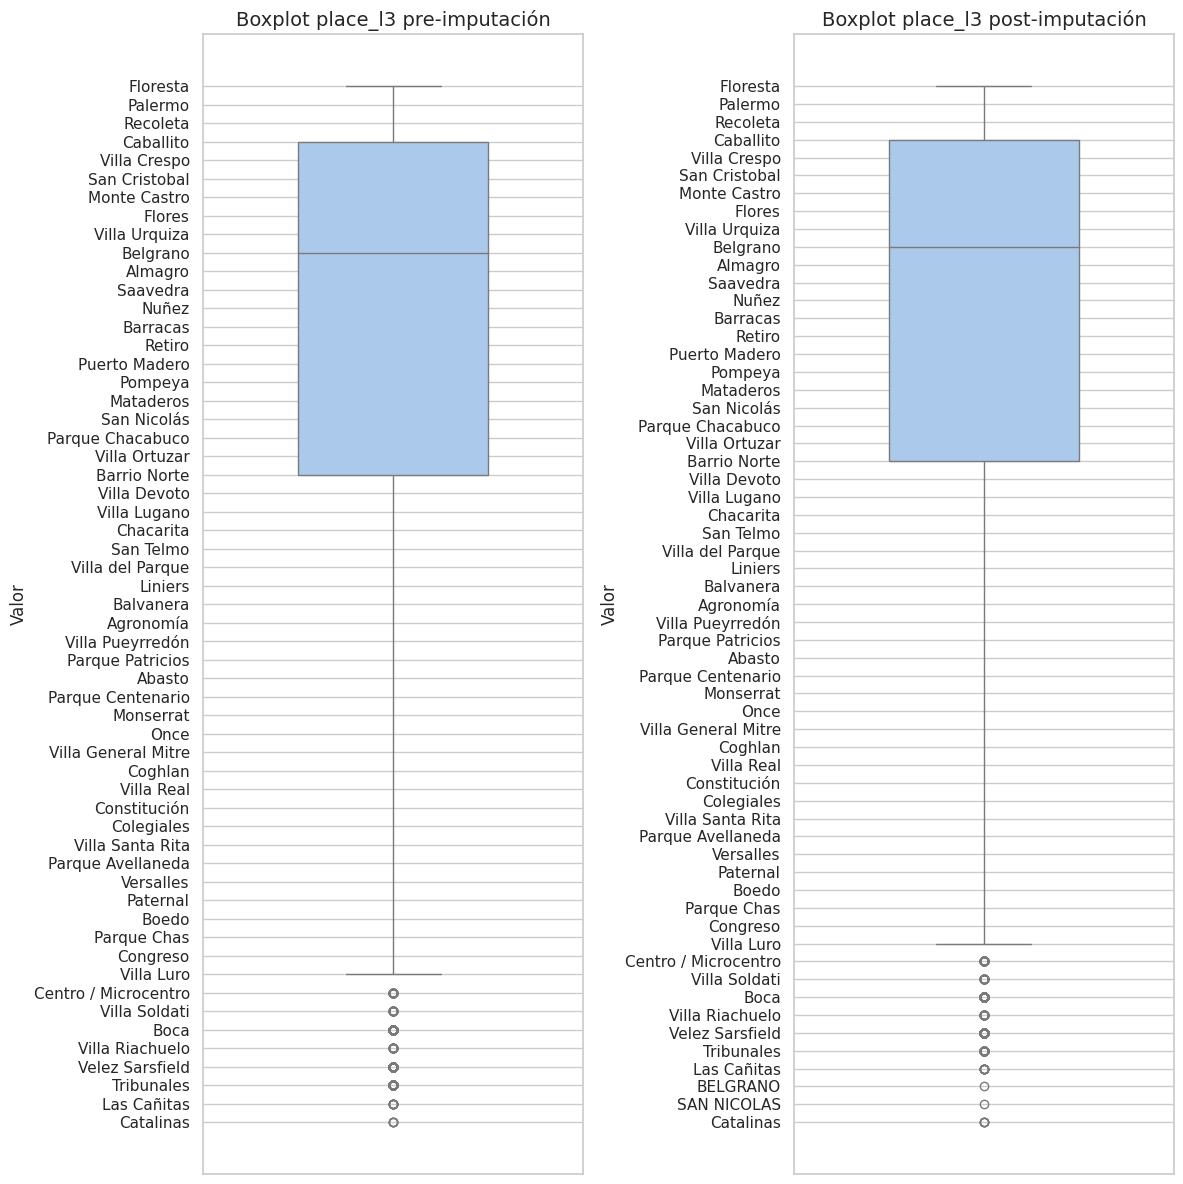

In [ ]:
generar_distribucion("place_l3")

Como los datos nulos en la variable place_l3 era de 0.454913. No se observan grandes cambios en el gráfico.
Podemos notar que la media de Palermo se mantiene, lo mismo con Villa del Parque y Belgrano.

In [ ]:
pre_barrio = obtener_cantidad_variables(ds_pre_imputacion,'place_l3')
pre_barrio.head()

place_l3  cantidad
0        Palermo     11473
1       Belgrano      7063
2      Caballito      5736
3       Recoleta      5002
4  Villa Urquiza      3725

In [ ]:
post_barrio = obtener_cantidad_variables(ds_train,'place_l3')
post_barrio.head()

place_l3  cantidad
0        Palermo     10738
1       Belgrano      6562
2      Caballito      5600
3       Recoleta      4822
4  Villa Urquiza      3601

In [ ]:
comparar_imputacion(pre_barrio,post_barrio,'place_l3')

735 registros se imputaron con el valor de Palermo place_l3
501 registros se imputaron con el valor de Belgrano place_l3
136 registros se imputaron con el valor de Caballito place_l3
180 registros se imputaron con el valor de Recoleta place_l3
124 registros se imputaron con el valor de Villa Urquiza place_l3
135 registros se imputaron con el valor de Almagro place_l3
196 registros se imputaron con el valor de Nuñez place_l3
81 registros se imputaron con el valor de Villa Crespo place_l3
93 registros se imputaron con el valor de Flores place_l3
145 registros se imputaron con el valor de Barrio Norte place_l3
66 registros se imputaron con el valor de Balvanera place_l3
9 registros se imputaron con el valor de Colegiales place_l3
6 registros se imputaron con el valor de Villa Devoto place_l3
6 registros se imputaron con el valor de Villa del Parque place_l3
8 registros se imputaron con el valor de Saavedra place_l3
52 registros se imputaron con el valor de Puerto Madero place_l3
74 regist

Podemos concluir que la mayoría de los valores faltantes en la variable "place_l3" fueron completados con el nombre del barrio "Palermo".

## Valores atípicos

### *Prefacio*

Recordando lo visto en la sección de variables cualitativas en Exploración inicial.

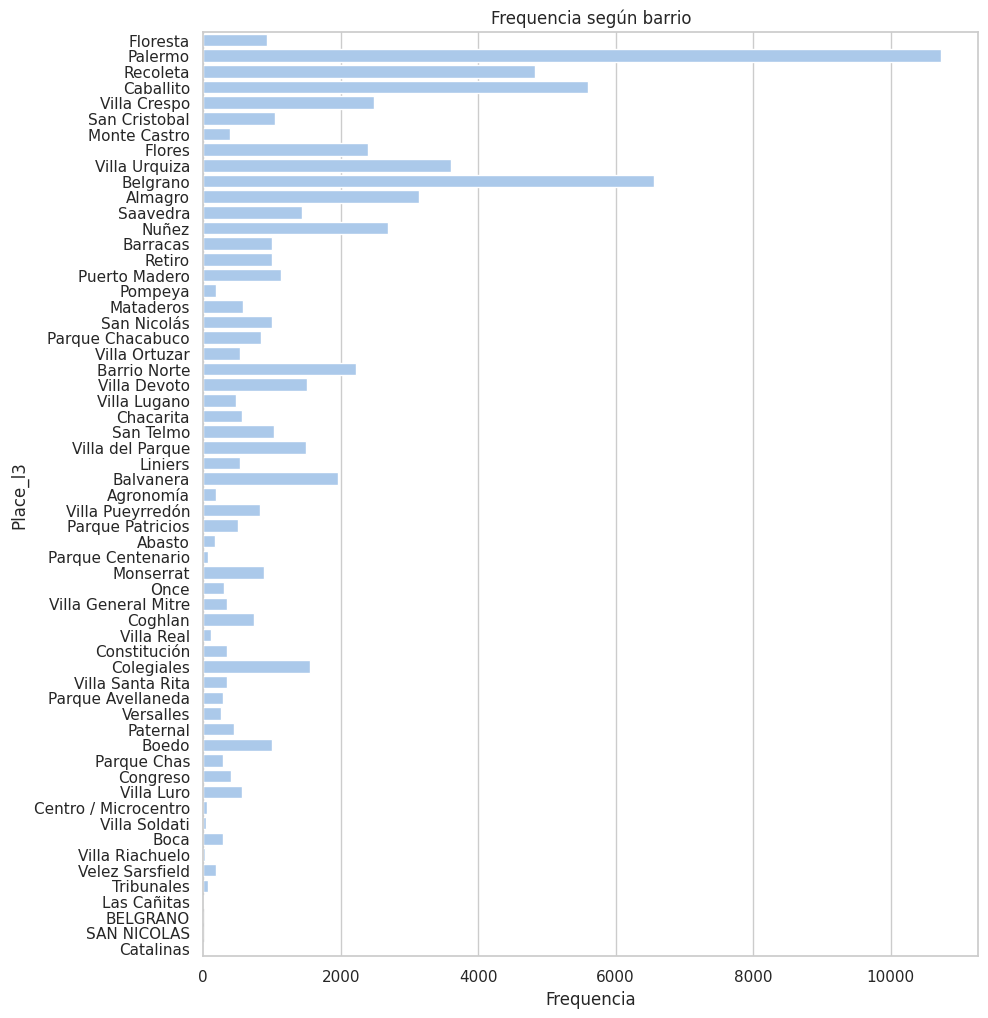

In [ ]:
# Hacemos un gráfico de frecuencias de los barrios
plt.figure(figsize=(10, 12))
sns.countplot(y=ds_train.place_l3)
plt.xlabel('Frequencia')
plt.ylabel('Place_l3')
plt.title('Frequencia según barrio')
plt.show()

Las Cañitas, Catalinas, San Nicolas tienen una representación nula/casi nula.
Villa Soldati, Microcentro, Parque Centenario, Villa Riachuelo, Tribunales tienen una representación tan pequeña que tenemos que tener en cuenta que los registros pueden ser casos aislados/no representativos de la realidad de las ventas de inmuebles en el barrio.

In [ ]:
# Hacemos una copia del dataset hasta el momento
ds_atipicos = ds_train.copy()

Funciones auxiliares para el análisis:



In [ ]:
#Función para cálculo de limite superior e inferior de outliers según cuartiles
def limite_rango_iq(df, variable):
  # Cuartiles
  Q1 = np.quantile(df[variable], 0.25)
  Q3 = np.quantile(df[variable], 0.75)

  # Rango intercuartil
  IQR = Q3 - Q1

  # Limite inferior Outliers
  out_inf = Q1 - 1.5 * IQR

  # Limite superior Outliers
  out_sup = Q1 + 1.5 * IQR

  return out_inf, out_sup

# Funcion para cálculo de Z Score normal
def calculo_z_score(serie):
  media = np.mean(serie)
  std = np.std(serie)
  return (serie - media) / std

#Función para calculo de Z Score modificado
def calculo_z_mod(serie):
  median = np.median(serie)
  MAD = np.median(np.absolute(serie - median))
  return (serie - median) * 0.6745 / MAD

# Grafico comparativo
def plot_comparativo(df_antes, df_despues, var):

  # Create subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  # Plot for df_antes
  sns.boxplot(y=df_antes[var], ax=axs[0])
  axs[0].set_title('Antes')

  # Plot for df_despues
  sns.boxplot(y=df_despues[var], ax=axs[1])
  axs[1].set_title('Después')

  # Show plots
  plt.tight_layout()
  plt.show()
  return

# Boxplot por barrio de la variable a evaluar
def plot_por_barrio(df, var):
  # Lista de barrios
  barrios = ['Coghlan','Colegiales','Abasto','Nuñez','Constitución',
             'Boedo', 'San Nicolás', 'Retiro', 'Liniers', 'Almagro',
             'Boca', 'Palermo', 'Balvanera','Barracas', 'Caballito',
             'Villa Ortuzar', 'Villa Luro', 'Puerto Madero', 'Pompeya', 'Saavedra',
             'Parque Chacabuco', 'Belgrano', 'Recoleta', 'Floresta', 'Monserrat',
             'Villa del Parque', 'San Telmo', 'Villa Crespo', 'Tribunales', 'Once',
             'Barrio Norte', 'Villa Lugano', 'Congreso', 'Villa Urquiza', 'Mataderos',
             'Villa Devoto', 'Recoleta', 'San Cristobal', 'Villa Pueyrredon', 'Congreso']

  # Subplots
  fig, axs = plt.subplots(8, 5, figsize=(16, 24))
  axs = axs.flatten()

  for i, barrio in enumerate(barrios):
      filtered_data = df[df['place_l3'] == barrio]

      sns.boxplot(y=filtered_data[var], ax=axs[i])

      axs[i].set_title(f'{var} en {barrio}')

  # Adjust layout
  plt.tight_layout()
  # Show the plot
  plt.show()
  return



### Análisis univariado

Vamos a intentar identificar los outliers univariados utilizando los IQR y el Z Score.

#### *Análisis según cantidad de habitaciones(property_bedrooms)*

<Axes: ylabel='property_bedrooms'>

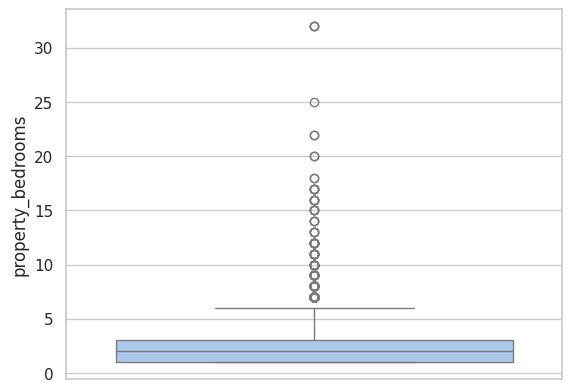

In [ ]:
sns.boxplot(y=ds_train.property_bedrooms)

In [ ]:
limite_rango_iq(ds_train, 'property_bedrooms')

(-2.0, 4.0)

Primero analizamos el outlier más notorio y verificamos si es un valor posible.

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 40]
outlier

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

Es un departamento de 3 ambientes con 70 habitaciones, lo cual no es posible. Tampoco podemos asumir que es un error de tipeo. A su vez, la superficie total es exagerada en comparación de la superficie cubierta y el precio de la propiedad.  Vamos a eliminar el outlier y visualizar nuevamente el código.  

<ipython-input-147-a0f165733f40>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: ylabel='property_bedrooms'>

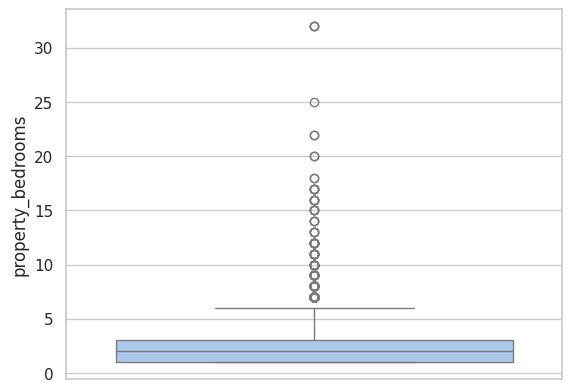

In [ ]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_bedrooms'] > 40].index
ds_train.drop(id_outlier,inplace=True)

# Visualizamos
sns.boxplot(y=ds_train.property_bedrooms)

Existen muchos valores atípicos por sobre el umbral marcado por los cuartiles, pero teniendo en cuenta que estamos trabajando con casas, PH y departamentos unicamente, revisaremos las anomalías mayores a 15, a partir de donde no hay muchas ocurrencias.



In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 15]
outlier

id  start_date    end_date created_on  \
346602  yzI9zylc11wllHX16av6jA==  2021-09-30  2021-11-02 2021-09-30   
150885  X3WGOe/PrGS1u+xozM5elA==  2021-03-24  2021-06-05 2021-03-24   
354668  +SPkA/Y4DHEHf+HIppYFKg==  2021-03-31  2021-04-16 2021-03-31   
49960   O/JMW/VVo7OmWF7SkXtBuA==  2021-10-16  2021-12-24 2021-10-16   
366101  8o3ZwoXgOddHoex/irib7g==  2021-04-10  2021-06-05 2021-04-10   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
48279   r3sXlEIiCgBG5TtUkN93mw==  2021-03-14  2021-06-05 2021-03-14   
307211  uqM9/WXFJkEJnXEQefcpRQ==  2021-09-19  2021-09-19 2021-09-19   
208593  CtbHDgBLf3+kTc20y2iVhw==  2021-11-29  2022-01-14 2021-11-29   
402448  9OrT+9jZlW4rMGyZYsmNPA==  2021-09-07  2022-02-09 2021-09-07   
115403  VuF9cBcZ03aoEcEWAsWGjA==  2021-12-07  2022-01-27 2021-12-07   
32758   KA441xdi8PtuWBvjcAbGOQ==  2021-02-08  2021-03-01 2021-02-08   
285222  WHu8kgA8Vu692UM8Dz3gnA==  2021-02-24  2022-02-09 2021-02-24   
362676  Gj3g5KCtRbYcwZIuh/wJGg==  2021-01-16  2021-08-06 2021-01-16   
140832  2aHER3AXQs3zb3EegLhmgg==  2021-12-08  2022-01-27 2021-12-08   
36421   VoyodCc8rftOZHr4TeYcpw==  2021-09-21  2022-02-03 2021-09-21   
292167  CxZv3EmTnK+m6EJD2uQ5fw==  2021-02-23  2021-03-03 2021-02-23   
332857  760pAR/aW7whZAZRLML/ZA==  2021-09-17  2022-02-25 2021-09-17   
90004   TEs1aRnhJPwR0jRMq/Vzdg==  2021-08-03  9999-12-31 2021-08-03   
389282  +xTrflFUv4fEGjwpwhP68w==  2021-05-05  2021-06-05 2021-05-05   

          latitud   longitud          place_l3 property_type  property_rooms  \
346602 -34.632537 -58.360577              Boca  Departamento            19.0   
150885 -34.642037 -58.438995  Parque Chacabuco  Departamento            35.0   
354668 -34.611905 -58.382384         Monserrat            PH            15.0   
49960  -34.630186 -58.389156  Parque Patricios  Departamento             1.0   
366101 -34.648922 -58.380522          Barracas          Casa            18.0   
1932   -34.637026 -58.426283  Parque Chacabuco          Casa            26.0   
48279  -34.608645 -58.485619  Villa del Parque  Departamento             4.0   
307211 -34.611905 -58.382384         Monserrat            PH            15.0   
208593 -34.629796 -58.363928              Boca            PH            18.0   
402448 -34.611413 -58.389221         Monserrat          Casa            17.0   
115403 -34.598070 -58.444686      Villa Crespo            PH            17.0   
32758  -34.632698 -58.360514              Boca            PH            19.0   
285222 -34.638432 -58.369712          Barracas            PH            20.0   
362676 -34.618485 -58.377993         San Telmo          Casa            16.0   
140832 -34.588454 -58.385257          Recoleta  Departamento             5.0   
36421  -34.576061 -58.421289           Palermo  Departamento             3.0   
292167 -34.616487 -58.371596         San Telmo            PH            24.0   
332857 -34.611905 -58.382384         Monserrat  Departamento            18.0   
90004  -34.633236 -58.480313          Floresta            PH            32.0   
389282 -34.570959 -58.458106          Belgrano          Casa            28.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
346602               18.0                   372.0                     318.0   
150885               25.0                    37.0                      33.0   
354668               16.0                   587.0                     276.0   
49960                32.0                    32.0                      32.0   
366101               17.0                   515.0                     515.0   
1932                 20.0                166077.0                  217000.0   
48279                32.0                    83.0                      75.0   
307211               16.0                   587.0                     276.0   
208593               17.0                   386.0                     323.0   
402448               16.0                   585.0                  

Tenemos 230 anomalías. Los casos donde el número de ambientes es razonable, parece error de tipeo. Lo corregimos

In [ ]:
condition = (ds_train['property_bedrooms'] > 15) & (ds_train['property_rooms'] < 10)
ds_train.loc[condition, 'property_surface_covered'] /= 10

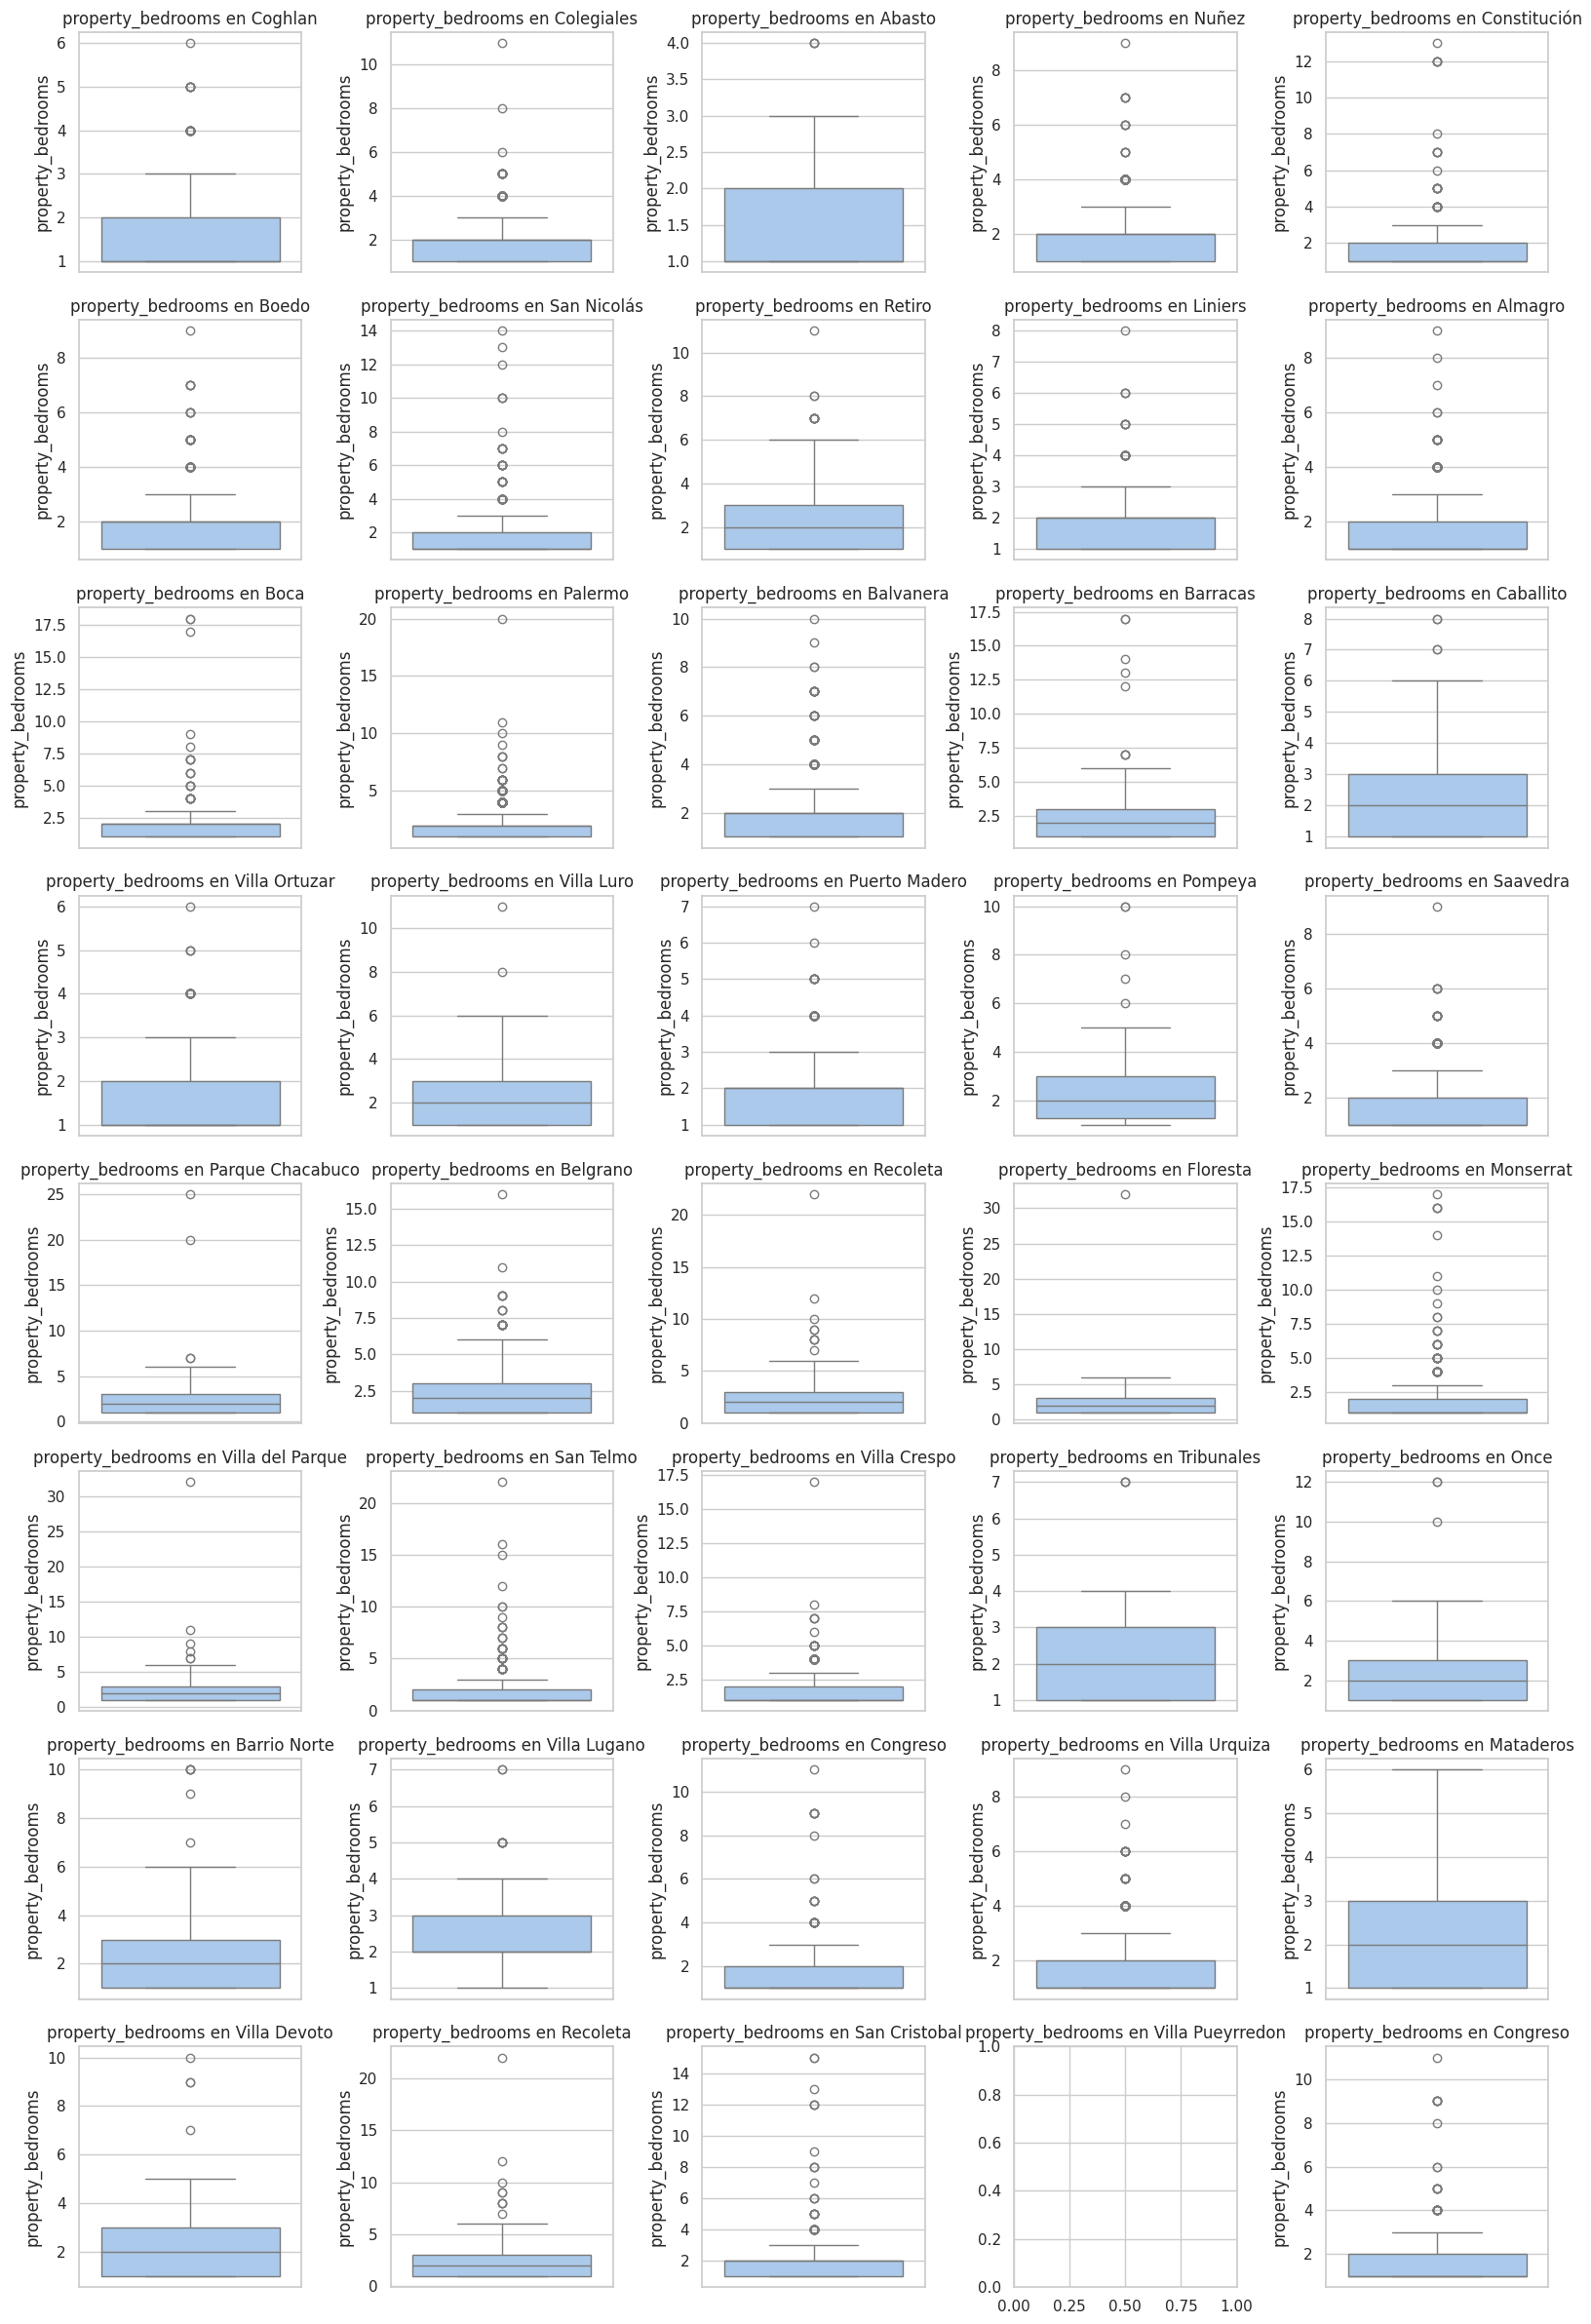

In [ ]:
plot_por_barrio(ds_train, 'property_bedrooms')

Analizando los boxplot de la cantidad de habitaciones pero dividido según el barrio en el que se encuentra la propiedad, podemos ver aún teniendo en cuenta las variaciones, que aquellos casos de casas con más de 8 habitaciones son outliers extremos y decidimos normalizarlas utilizando una transformación logaritmica.

Nota: el limite intercuartil en general para la zona de CABA era 4, pero como vemos en barrios como Caballito esto se encuentra totalmente dentro de la norma.

In [ ]:
ds_train.loc[ds_train['property_bedrooms'] > 7.0, 'property_bedrooms'] = np.log(ds_train['property_bedrooms'])

In [ ]:
ds_train[ds_train['property_bedrooms'] > 6]

id  start_date    end_date created_on  \
221832  qSYgo2cL11dYsKSTenve1A==  2021-06-30  2021-07-03 2021-06-30   
419923  WzM3a+vloszrf/C8UM7vqg==  2021-12-01  2022-01-27 2021-12-01   
245430  sw6Y2UwVsN+YOQz1D2MtCw==  2021-10-08  2022-02-09 2021-10-08   
251811  AXcoUMwXUfZ/taJ27RlqYw==  2021-06-18  2021-08-25 2021-06-18   
441897  zCnRx6zoD4JjG+r+MNJekw==  2021-05-07  2021-06-05 2021-05-07   
...                          ...         ...         ...        ...   
351821  SioTWvNhCyTDPmU9CtHJSw==  2021-06-25  2021-07-04 2021-06-25   
325449  LZhr2owtQ83MiDi55T7vfA==  2021-08-27  2022-03-29 2021-08-27   
239183  jyynD4VNyy77y4Wgf8G9uA==  2021-05-21  2021-06-05 2021-05-21   
303903  FzaCrwAN9oMUXFSzKYOQtw==  2021-04-15  2021-06-05 2021-04-15   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   

          latitud   longitud      place_l3 property_type  property_rooms  \
221832 -34.629030 -58.456957        Flores          Casa             8.0   
419923 -34.577702 -58.399924       Palermo          Casa             9.0   
245430 -34.553050 -58.448411      Belgrano          Casa             8.0   
251811 -34.629273 -58.418845         Boedo          Casa            12.0   
441897 -34.619862 -58.418653       Almagro            PH            10.0   
...           ...        ...           ...           ...             ...   
351821 -34.615136 -58.376863     Monserrat          Casa             7.0   
325449 -34.598801 -58.436084  Villa Crespo          Casa             5.0   
239183 -34.572554 -58.469842      Belgrano          Casa             8.0   
303903 -34.593316 -58.377201        Retiro  Departamento             9.0   
239181 -34.572554 -58.469842      Belgrano          Casa             8.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
221832                7.0                   637.0                     637.0   
419923                7.0                   850.0                     800.0   
245430                7.0                   415.0                     415.0   
251811                7.0                   500.0                     500.0   
441897                7.0                   380.0                     260.0   
...                   ...                     ...                       ...   
351821                7.0                   258.0                     258.0   
325449                7.0                   411.0                     274.0   
239183                7.0                   400.0                     400.0   
303903                7.0                   380.0                     350.0   
239181                7.0                   400.0                     400.0   

        property_price  
221832       1350000.0  
419923       4500000.0  
245430        820000.0  
251811        450000.0  
441897        330000.0  
...                ...  
351821        329000.0  
325449        430000.0  
239183        920000.0  
303903        690000.0  
239181        920000.0  

[98 rows x 13 columns]

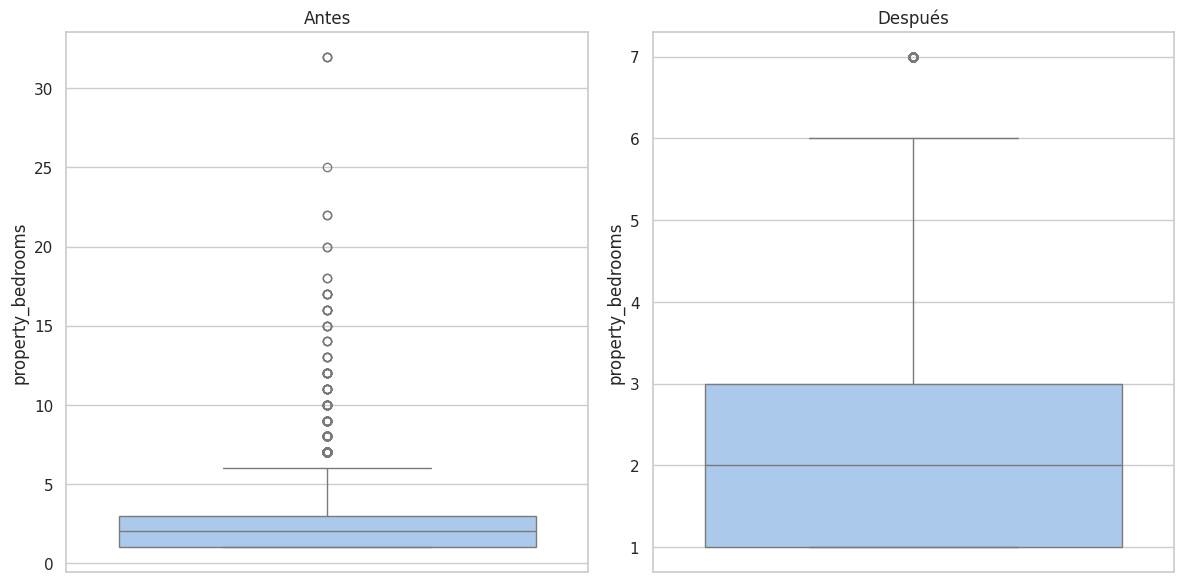

In [ ]:
plot_comparativo(ds_atipicos, ds_train, 'property_bedrooms')

Podemos ver que se han solucionado la mayoría de las anomalías. Dejaremos las restantes (85 registros) para el análisis multivariado.

#### *Análisis según cantidad de ambientes (property_rooms)*

<Axes: ylabel='property_rooms'>

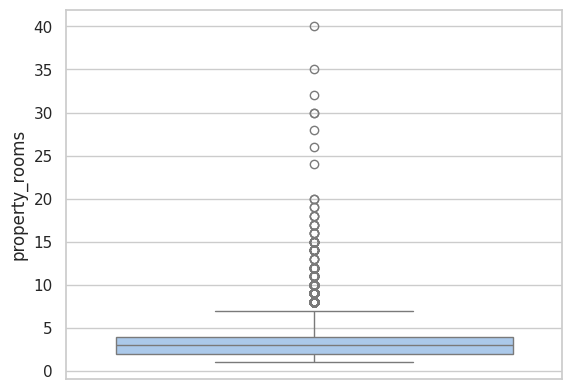

In [ ]:
sns.boxplot(y=ds_train.property_rooms)

In [ ]:
limite_rango_iq(ds_train, 'property_rooms')

(-1.0, 5.0)

El limite intercuartil superior es 5.0. Vemos que si bien hay muchos outliers por sobre el limite de 5 ambientes, esto se acentúa una vez que se superan los 20 ambientes.



In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_rooms'] > 20]
outlier

id  start_date    end_date created_on  \
21009   bmop3OsDu5kJmbAVgJ5wzA==  2021-03-15  2021-06-05 2021-03-15   
150885  X3WGOe/PrGS1u+xozM5elA==  2021-03-24  2021-06-05 2021-03-24   
52157   HwHiC1DJIxRAjUAOmujXsg==  2021-02-07  2021-06-15 2021-02-07   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
356618  +e6yeZZqYElYRYq4/cd9qg==  2021-11-18  2021-12-02 2021-11-18   
292167  CxZv3EmTnK+m6EJD2uQ5fw==  2021-02-23  2021-03-03 2021-02-23   
90004   TEs1aRnhJPwR0jRMq/Vzdg==  2021-08-03  9999-12-31 2021-08-03   
389282  +xTrflFUv4fEGjwpwhP68w==  2021-05-05  2021-06-05 2021-05-05   

          latitud   longitud           place_l3 property_type  property_rooms  \
21009  -34.616391 -58.456038          Caballito  Departamento            30.0   
150885 -34.642037 -58.438995   Parque Chacabuco  Departamento            35.0   
52157  -34.649872 -58.483012  Parque Avellaneda            PH            30.0   
1932   -34.637026 -58.426283   Parque Chacabuco          Casa            26.0   
356618 -34.588742 -58.422459            Palermo  Departamento            40.0   
292167 -34.616487 -58.371596          San Telmo            PH            24.0   
90004  -34.633236 -58.480313           Floresta            PH            32.0   
389282 -34.570959 -58.458106           Belgrano          Casa            28.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
21009            2.000000                    79.0                      79.0   
150885           3.218876                    37.0                      33.0   
52157            2.000000                    72.0                      60.0   
1932             2.995732                166077.0                  217000.0   
356618           3.000000                    75.0                      68.0   
292167           3.091042                   800.0                     650.0   
90004            3.465736                   535.0                     435.0   
389282           2.772589                   845.0                     845.0   

        property_price  
21009         230000.0  
150885         67000.0  
52157         123500.0  
1932          250000.0  
356618        145000.0  
292167        350000.0  
90004         300000.0  
389282        950000.0

Si bien los datos de habitaciones y ambientes no son posibles, por ahora no serán borrados ya que el resto (superficie cubierta, precio) parecen coherentes con el resto del dataset y pueden ser útiles.

Controlaremos según barrio.

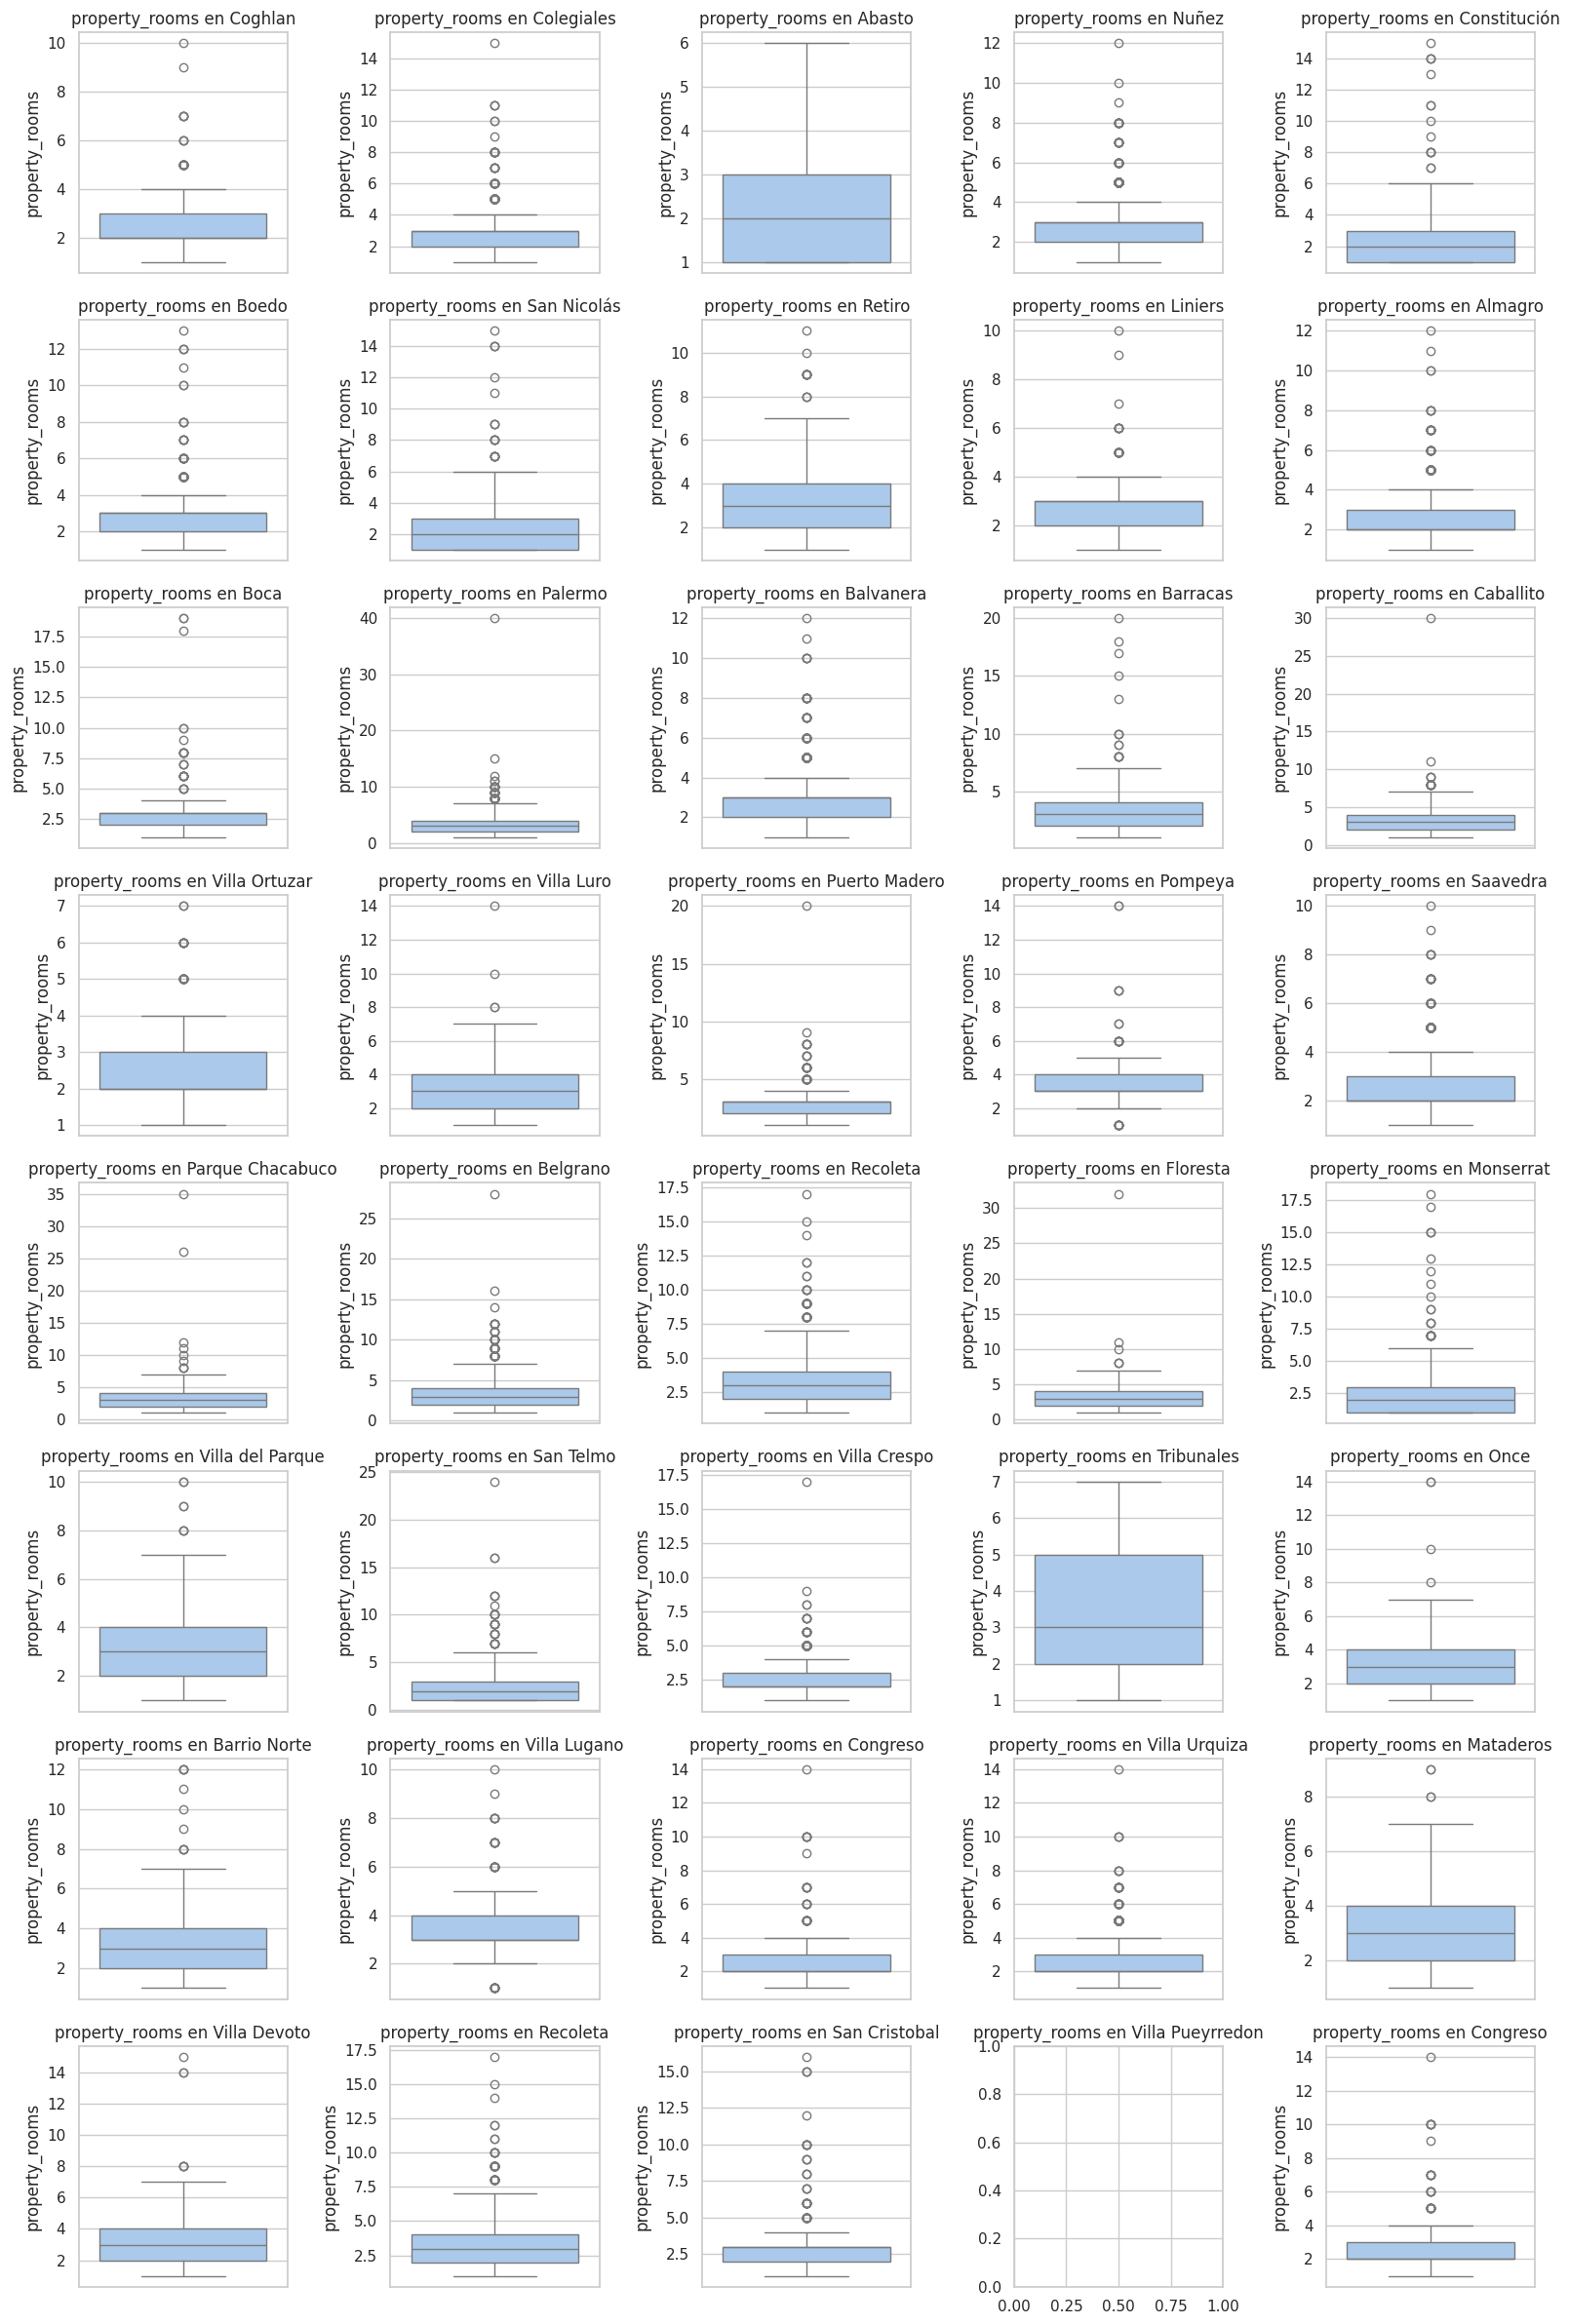

In [ ]:
plot_por_barrio(ds_train, 'property_rooms')

Si bien nuestro límite intercuartil era de 5.0 vemos una tendencia un poco superior al ver los boxplot por barrio, así que realizaremos una corrección en aquellos registros atípicos que superen los 10 ambientes.

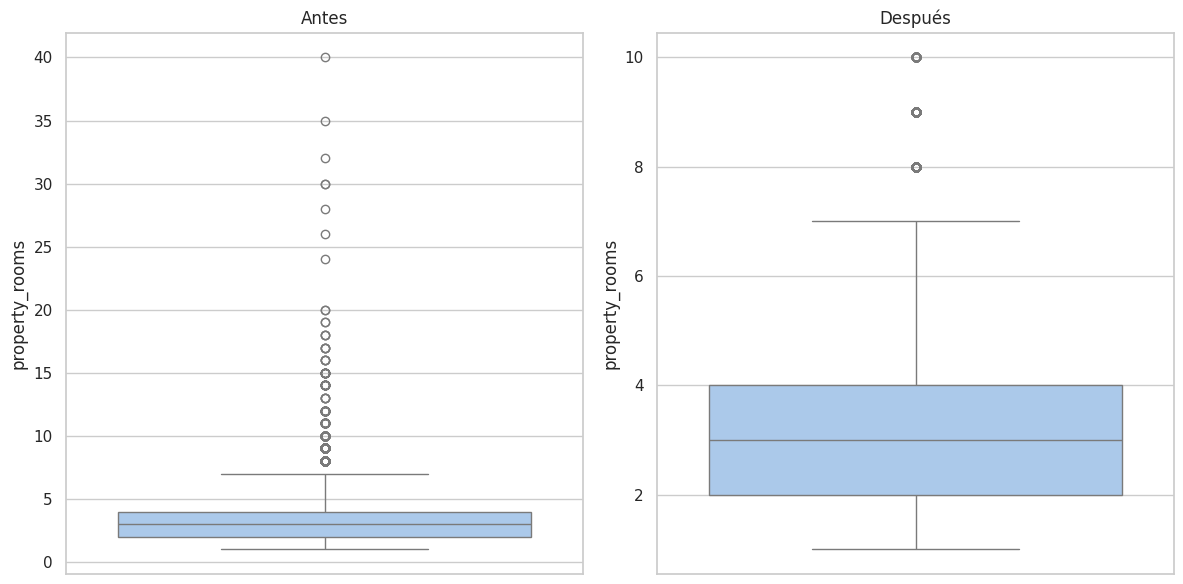

In [ ]:
#Normalizacion logaritmica
ds_train.loc[ds_train['property_rooms'] > 10.0, 'property_rooms'] = np.log(ds_train['property_rooms'])

#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_rooms')

In [ ]:
ds_train[(ds_train['property_rooms'] > 7.0)]

id  start_date    end_date created_on  \
171299  trfw04e4hbUBl71Iy/MnAA==  2021-04-19  2021-06-05 2021-04-19   
321112  egnwpcRsvN67bynu0F3s7A==  2021-09-03  2021-10-14 2021-09-03   
369645  Fo8wpD36R/8umFa0qGVmgA==  2021-11-08  2022-01-27 2021-11-08   
275119  1kinKbnpXDGuJ/3xSY81bw==  2021-09-15  2021-09-16 2021-09-15   
267481  GsMafsuIG9pj1Nav5cn5Tg==  2021-07-09  2021-07-14 2021-07-09   
...                          ...         ...         ...        ...   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   
260380  WoyTUcPl6DweuVhiaE4vgQ==  2021-04-14  2021-05-06 2021-04-14   
245488  w6DqE0Y0v+yrxEjLqEQbkw==  2021-10-08  2022-05-01 2021-10-08   
401773  hks3y1OrHqam6rDkrKawfw==  2021-06-17  2022-03-09 2021-06-17   
282367  hn3JWymen9ADvI1VG1o1Bg==  2021-09-16  2022-03-09 2021-09-16   

          latitud   longitud   place_l3 property_type  property_rooms  \
171299 -34.595356 -58.408323   Recoleta  Departamento             9.0   
321112 -34.590923 -58.384214   Recoleta  Departamento             9.0   
369645 -34.556356 -58.465867      Nuñez          Casa             8.0   
275119 -34.620682 -58.458331  Caballito          Casa             8.0   
267481 -34.554993 -58.445175   Belgrano          Casa             8.0   
...           ...        ...        ...           ...             ...   
239181 -34.572554 -58.469842   Belgrano          Casa             8.0   
260380 -34.578491 -58.408168    Palermo  Departamento             8.0   
245488 -34.625889 -58.442435  Caballito          Casa             8.0   
401773 -34.614331 -58.377502  Monserrat  Departamento             9.0   
282367 -34.577292 -58.402073    Palermo          Casa            10.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
171299           6.000000                   185.0                     185.0   
321112           4.000000                   668.0                     668.0   
369645           6.000000                   392.0                     216.0   
275119           6.000000                   265.0                     195.0   
267481           6.000000                   560.0                     236.0   
...                   ...                     ...                       ...   
239181           7.000000                   400.0                     400.0   
260380           4.000000                   366.0                     366.0   
245488           5.000000                   244.0                     219.0   
401773           2.079442                   201.0                     201.0   
282367           5.000000                   410.0                     410.0   

        property_price  
171299        678000.0  
321112       5000000.0  
369645       1300000.0  
275119        270000.0  
267481        790000.0  
...                ...  
239181        920000.0  
260380       1600000.0  
245488        649000.0  
401773        259000.0  
282367       1890000.0  

[494 rows x 13 columns]

Tenemos 482 valores por sobre el máximo marcado por el bigote en el boxplot actual y que pueden ser considerados outliers. Reveeremos estos valores en otros análisis.

#### *Análisis según precio de la propiedad (property_price)*

<Axes: ylabel='property_price'>

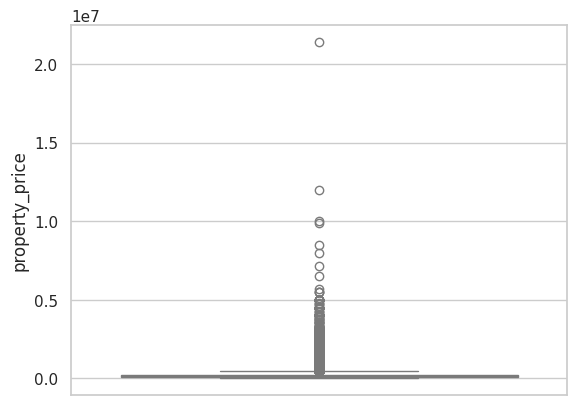

In [ ]:
sns.boxplot(y=ds_train.property_price)

In [ ]:
limite_rango_iq(ds_train, 'property_price')

(-113500.0, 303500.0)

Primero analizamos las anomalías más extremas, valores mayores o iguales a 8M.

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_price'] >= 8000000]
outlier

id  start_date    end_date created_on  \
60073   uoM9HDKq3jZKQKgHXTIGkg==  2021-01-25  2022-05-13 2021-01-25   
156777  8ChrVZoOYyEqAJMIP/pXoQ==  2021-02-17  2021-02-19 2021-02-17   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
85725   pKJUYwxjs9j+ub8gzLyc/g==  2021-03-26  2021-06-05 2021-03-26   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   
332190  PkbD1ixa/IWHlTjwozccRQ==  2021-09-17  2022-03-09 2021-09-17   

          latitud   longitud     place_l3 property_type  property_rooms  \
60073  -34.616044 -58.458621    Caballito  Departamento             3.0   
156777 -34.608300 -58.371200    Monserrat          Casa             3.0   
1140   -34.605781 -58.376705  San Nicolás  Departamento             4.0   
85725  -34.572494 -58.462433     Belgrano          Casa             5.0   
148534 -34.565947 -58.442326     Belgrano          Casa             9.0   
332190 -34.593634 -58.377164       Retiro          Casa            10.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
60073            2.000000                    68.0                      64.0   
156777           2.000000                   225.0                      93.0   
1140             3.000000                 10500.0                   10500.0   
85725            4.000000                  3197.0                    3367.0   
148534           5.000000                  1763.0                    1763.0   
332190           2.079442                  1166.0                    1485.0   

        property_price  
60073       21400000.0  
156777       8500000.0  
1140         9900000.0  
85725       12000000.0  
148534       8000000.0  
332190      10000000.0

Buscando propiedades actualmente en venta en barrios y tamaños similares, parecería haber un error. Sin embargo, incluso haciendo un reducción de un decimo (valores más coherentes para esos varrios y tamaños de casas), estaríamos por sobre el límite intercuartil, asi que por ahora no haremos transformaciones.

Analicemos según barrio:

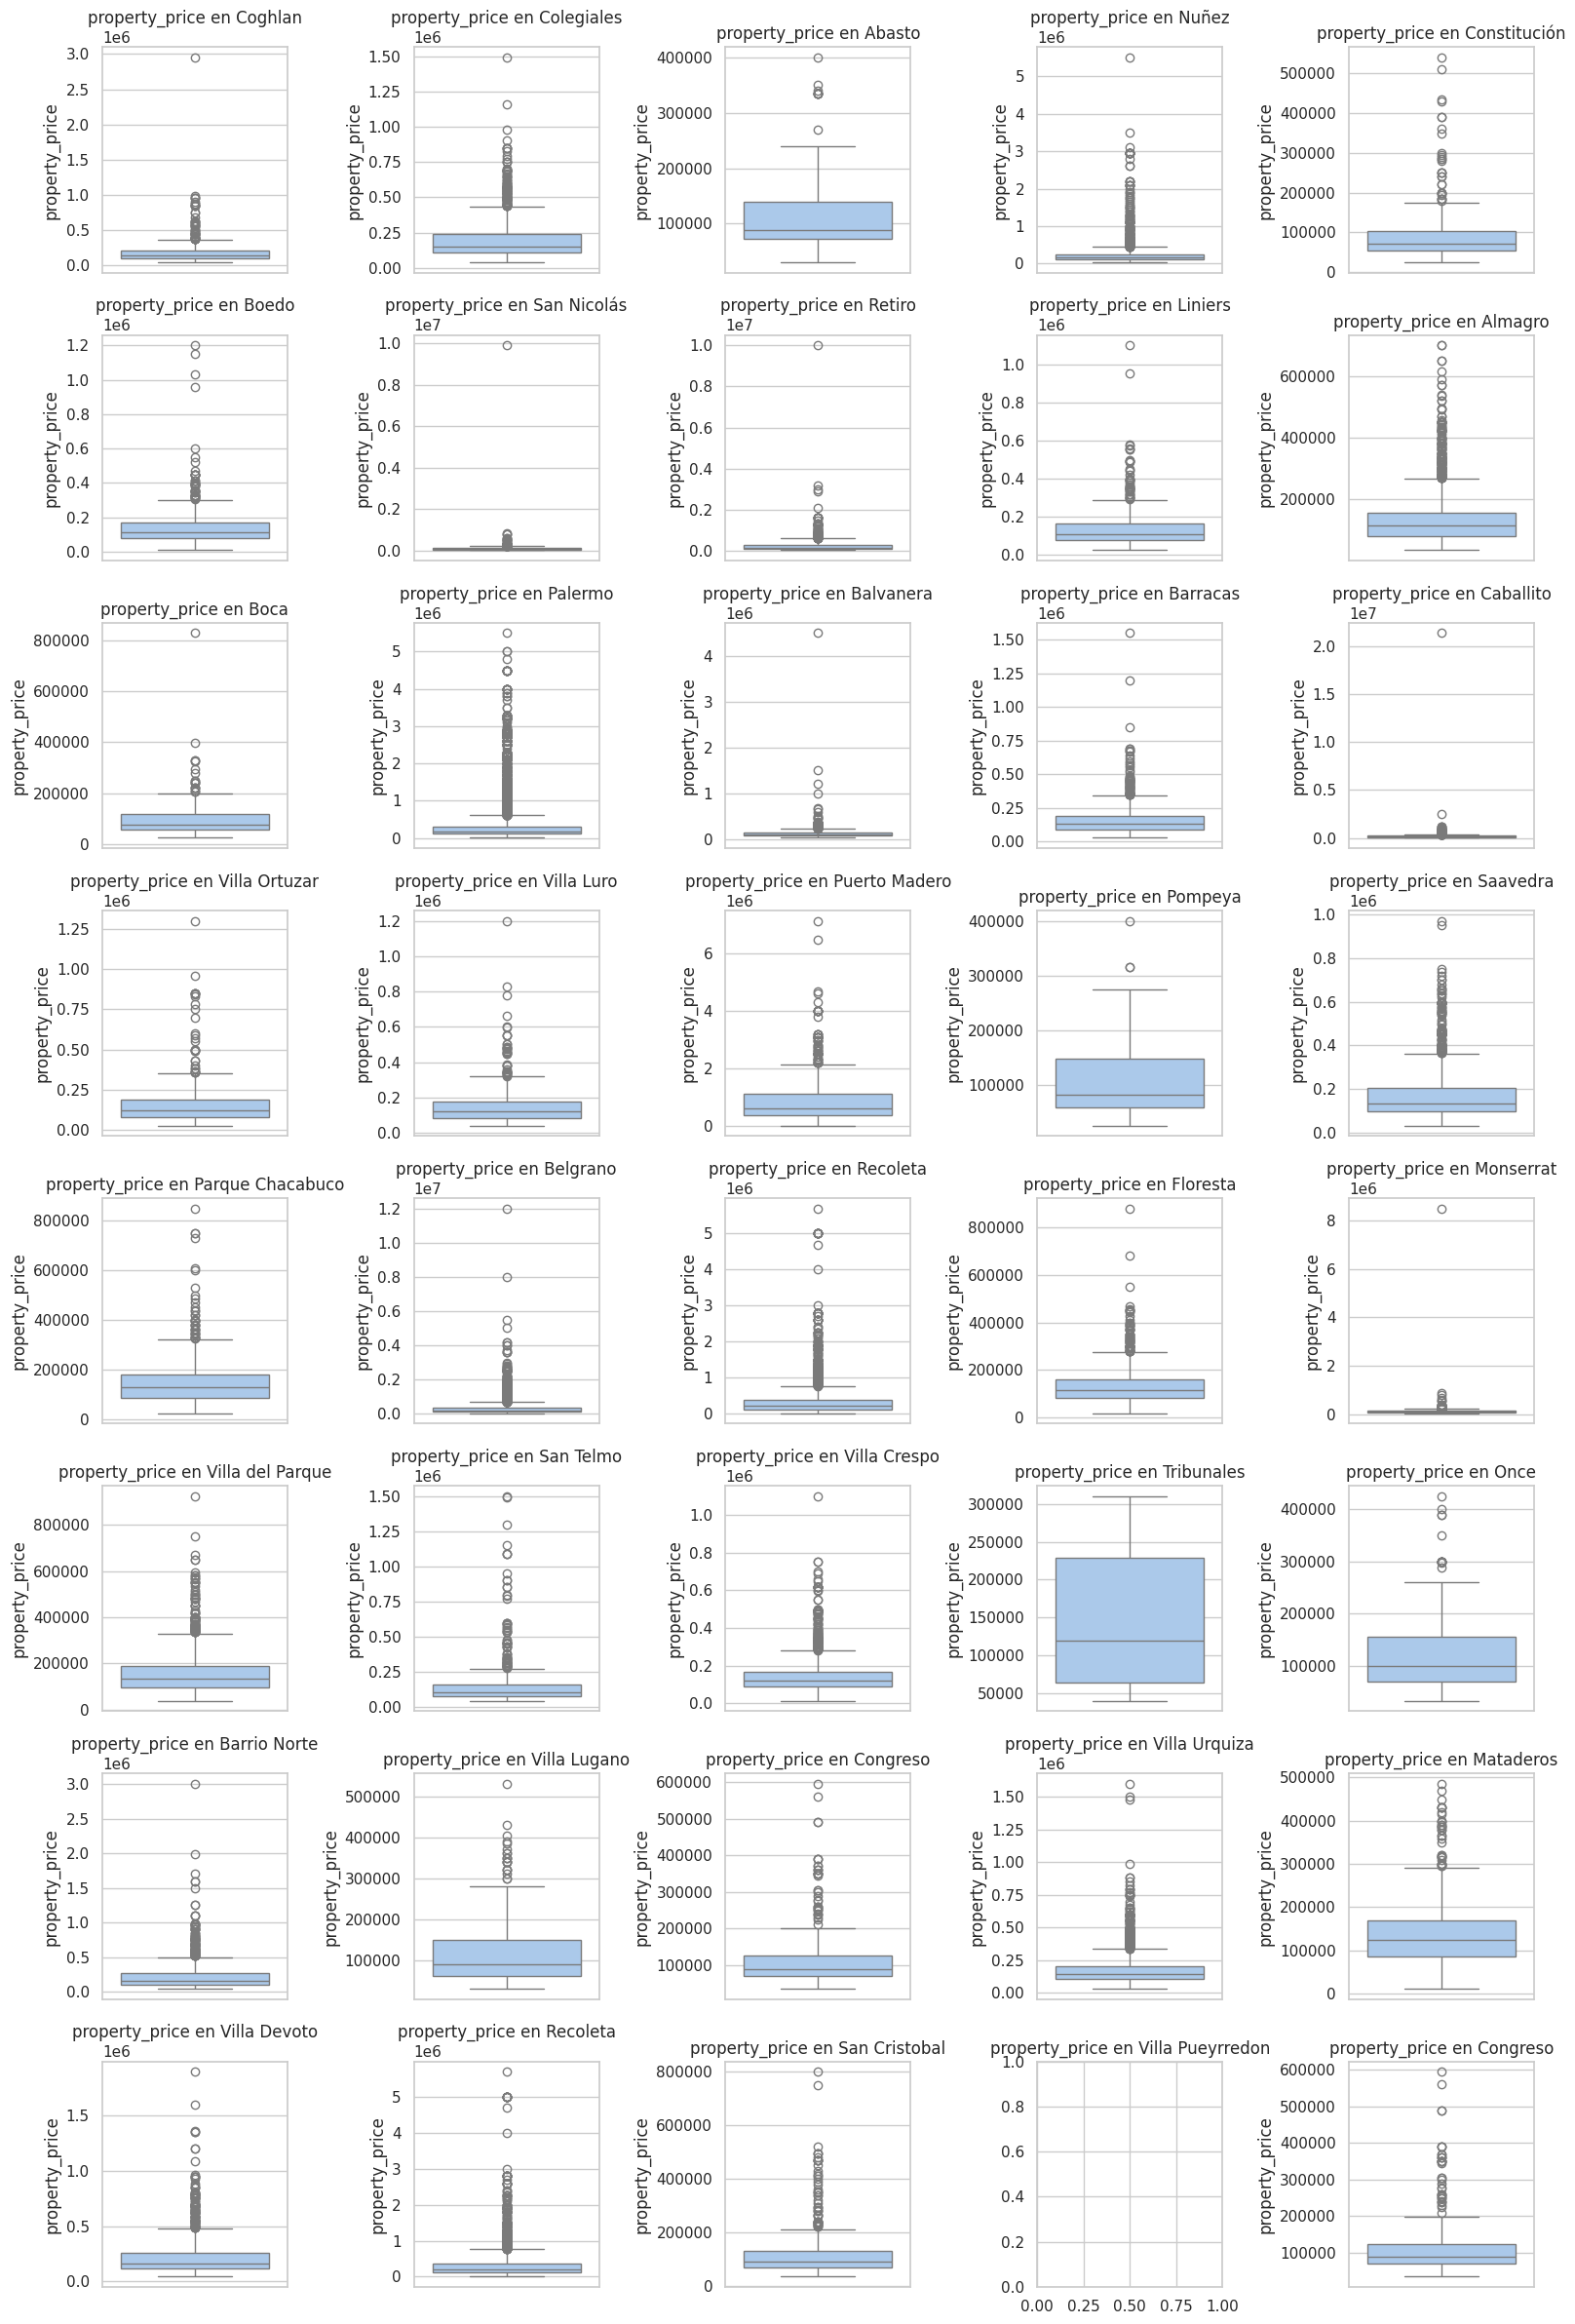

In [ ]:
plot_por_barrio(ds_train, 'property_price')

Hasta el momento, este el analisis según barrio menos homogéneo. Si tomamos el limite superior intercuartil general (305m), se distorcionarían totalmente los datos de barrios como Palermo y Puerto Madero. Teniendo en cuenta lo relevante que es éste dato a la hora de que se establezca el precio de una propiedad, solo trabajaremos con los outliers que sean extremos en el contexto de cada barrio (analisis multivariado).

*Análisis según superficie cubierta (property_surface_covered)*

<Axes: ylabel='property_surface_covered'>

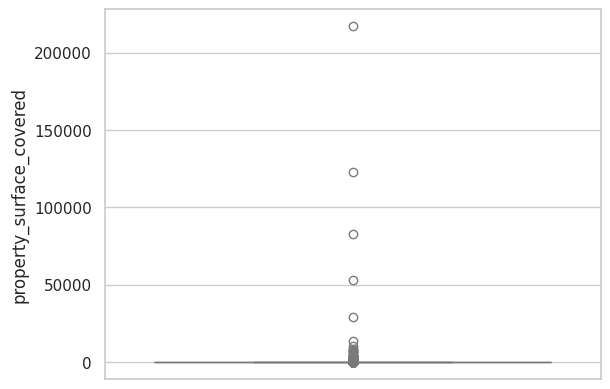

In [ ]:
sns.boxplot(y=ds_train.property_surface_covered)

In [ ]:
limite_rango_iq(ds_train, 'property_surface_covered')

(-32.0, 112.0)

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_covered'] <= 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_covered'].idxmin()
ds_train.loc[min_surface_index]

id                          awa2X9WsSwo40hALUq7sow==
start_date                                2021-11-26
end_date                                  2022-01-27
created_on                       2021-11-26 00:00:00
latitud                                   -34.558176
longitud                                  -58.458353
place_l3                                    Belgrano
property_type                           Departamento
property_rooms                                   1.0
property_bedrooms                                1.0
property_surface_total                          33.0
property_surface_covered                         1.0
property_price                              105000.0
Name: 124687, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [ ]:
ds_train[ds_train['property_surface_covered'] < 15]

id  start_date    end_date created_on  \
124687  awa2X9WsSwo40hALUq7sow==  2021-11-26  2022-01-27 2021-11-26   
261227  0HzVbfAIIAEpmLFWd4ZnTA==  2021-04-14  2021-06-05 2021-04-14   
151947  xbz2In0pyB3kabcr2bN7gQ==  2021-08-05  2021-08-28 2021-08-05   
170925  112jbybzPMjl3AaPu8PZ8A==  2021-04-19  2021-06-05 2021-04-19   
360441  wMrF37uAWOVMk4FLg0E3Tg==  2021-06-11  2021-06-29 2021-06-11   
...                          ...         ...         ...        ...   
288876  q31DJlmOqHEK6ySlGIdlcA==  2021-02-25  2021-06-05 2021-02-25   
376741  +oZkEXhlv7axXfBccWsTyA==  2021-03-18  2021-06-05 2021-03-18   
298191  hMmndNe/Ju9aZNsjc7++pQ==  2021-06-12  2021-06-29 2021-06-12   
388467  AjlIu2EybIgCboef5QDm3Q==  2021-10-12  2021-10-27 2021-10-12   
178234  3PIuolUQmDVlxT4sWCPe0w==  2021-03-23  2021-06-02 2021-03-23   

          latitud   longitud       place_l3 property_type  property_rooms  \
124687 -34.558176 -58.458353       Belgrano  Departamento             1.0   
261227 -34.572201 -58.484704  Villa Urquiza  Departamento             1.0   
151947 -34.589272 -58.407453        Palermo  Departamento             1.0   
170925 -34.604539 -58.424370        Almagro  Departamento             1.0   
360441 -34.623793 -58.402256  San Cristobal  Departamento             1.0   
...           ...        ...            ...           ...             ...   
288876 -34.572751 -58.441971        Palermo  Departamento             1.0   
376741 -34.581372 -58.408388       Recoleta  Departamento             1.0   
298191 -34.615168 -58.408262  San Cristobal  Departamento             1.0   
388467 -34.589272 -58.407453        Palermo  Departamento             1.0   
178234 -34.609567 -58.384745      Monserrat  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
124687                1.0                    33.0                       1.0   
261227                1.0                    35.0                       1.0   
151947                1.0                    34.0                       1.0   
170925                1.0                    29.0                       1.0   
360441                1.0                    36.0                       1.0   
...                   ...                     ...                       ...   
288876                1.0                    41.0                       1.0   
376741                1.0                    35.0                       1.0   
298191                1.0                    35.0                       1.0   
388467                1.0                    34.0                       1.0   
178234                1.0                    13.0                      13.0   

        property_price  
124687        105000.0  
261227         95000.0  
151947         89900.0  
170925         70000.0  
360441         50000.0  
...                ...  
288876        106000.0  
376741        105000.0  
298191         53000.0  
388467         85900.0  
178234         55000.0  

[487 rows x 13 columns]

Tenemos 484 registros de propiedades que tienen menos de 15m^2 cubiertos, y si bien según código urbanistico de la Ciudad de Buenos Aires no permite departamentos tan pequeños, sabemos que eso puede infringirse. Bajo estos supuestos, y viendo los registros que aparecen, vamos a reemplazar aquellos con superficies demasiado pequeñas (menores a 10m^2) por la superficie total.

In [ ]:
# Reemplazamos el valor de superficie cubierta por el de superficie total cuando el valor sea menor a 10
ds_train.loc[ds_train['property_surface_covered'] < 10, 'property_surface_covered'] = ds_train.loc[ds_train['property_surface_covered'] < 10, 'property_surface_total']

In [ ]:
ds_train[ds_train['property_surface_covered'] < 15]

id  start_date    end_date created_on  \
104165  03zgVf+Yn3GtIEVJOn9I8g==  2021-05-28  2021-06-13 2021-05-28   
333830  FfMyx7es1we4sMCZL2XVTw==  2021-12-28  2022-02-09 2021-12-28   
299     fWyBppiSbXhNSIjAmVDULg==  2021-09-09  2021-09-26 2021-09-09   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
301212  /MNEruoihGzhMaUMEfP6TQ==  2021-08-10  2021-11-03 2021-08-10   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
119185  Fkf6o+RgKRAKwmeP/ekaow==  2021-03-25  2021-05-05 2021-03-25   
168082  nOmTA76B5Fc56I5HKId9Dg==  2021-04-30  2021-06-03 2021-04-30   
19478   J0/gRyRPvFY0WmEU0nY1Fw==  2021-01-27  2021-08-17 2021-01-27   
357158  OYlpRlGCDSlNEnjAZI3KUw==  2021-06-29  9999-12-31 2021-06-29   
50425   rBJcf/OUoNMDP0JylFF2Vg==  2021-06-23  2022-02-09 2021-06-23   
140832  2aHER3AXQs3zb3EegLhmgg==  2021-12-08  2022-01-27 2021-12-08   
36421   VoyodCc8rftOZHr4TeYcpw==  2021-09-21  2022-02-03 2021-09-21   
178234  3PIuolUQmDVlxT4sWCPe0w==  2021-03-23  2021-06-02 2021-03-23   

          latitud   longitud          place_l3 property_type  property_rooms  \
104165 -34.643724 -58.418383  Parque Patricios  Departamento             1.0   
333830 -34.600456 -58.376960            Retiro  Departamento             1.0   
299    -34.597934 -58.376981            Retiro  Departamento             1.0   
72233  -34.597934 -58.376981            Retiro  Departamento             1.0   
301212 -34.680927 -58.475828      Villa Lugano            PH             3.0   
76920  -34.625870 -58.384003      Constitución  Departamento             1.0   
119185 -34.596680 -58.375829            Retiro  Departamento             1.0   
168082 -34.606525 -58.430740         Caballito  Departamento             3.0   
19478  -34.602170 -58.412383            Abasto  Departamento             2.0   
357158 -34.627164 -58.405943       San Nicolás            PH             2.0   
50425  -34.644446 -58.418263           Pompeya  Departamento             1.0   
140832 -34.588454 -58.385257          Recoleta  Departamento             5.0   
36421  -34.576061 -58.421289           Palermo  Departamento             3.0   
178234 -34.609567 -58.384745         Monserrat  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
104165           1.000000                    14.0                      14.0   
333830           1.000000                    14.0                      14.0   
299              1.000000                    14.0                      14.0   
72233            1.000000                    14.0                      14.0   
301212           2.000000                   132.0                      14.0   
76920            1.000000                    14.0                      14.0   
119185           1.000000                    75.0                      14.0   
168082           2.000000                    12.0                      12.0   
19478            1.000000                    20.0                      10.0   
357158           1.000000                    35.0                      14.0   
50425            1.000000                    14.0                      14.0   
140832           3.091042                   425.0                      14.4   
36421            2.995732                   127.0                      11.7   
178234           1.000000                    13.0                      13.0   

        property_price  
104165         31500.0  
333830         37300.0  
299            45200.0  
72233          45200.0  
301212        180000.0  
76920          24500.0  
119185        115000.0  
168082         22000.0  
19478          30000.0  
357158         50000.0  
50425          26500.0  
140832        430000.0  
36421         650000.0  
178234         55000.0

Ahora nos quedan 20 registros unicamente.

In [ ]:
ds_train[ds_train['property_surface_covered'] > 15000]

id  start_date    end_date created_on  \
405324  tHz32dZ72wYshPnoABftrg==  2021-01-07  2021-06-02 2021-01-07   
199905  EDZUWORq83zRgdk9Zqlv+A==  2021-07-25  9999-12-31 2021-07-25   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   

          latitud   longitud          place_l3 property_type  property_rooms  \
405324 -34.569963 -58.481658     Villa Urquiza            PH        4.000000   
199905 -34.604362 -58.392366      Barrio Norte  Departamento        4.000000   
1932   -34.637026 -58.426283  Parque Chacabuco          Casa        3.258097   
72316  -34.578917 -58.429373           Palermo  Departamento        2.000000   
352883 -34.550093 -58.483034          Saavedra  Departamento        1.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
405324           3.000000                123000.0                  123000.0   
199905           3.000000                    83.0                   83000.0   
1932             2.995732                166077.0                  217000.0   
72316            1.000000                 61130.0                   53030.0   
352883           1.000000                 29064.0                   29064.0   

        property_price  
405324        165000.0  
199905        155000.0  
1932          250000.0  
72316         225000.0  
352883         87400.0

Los casos de propiedades con superficie cubierta mayor a 15000, parecen ser errores de escala que pueden solucionarse facilmente.

In [ ]:
condition = ds_train['property_surface_covered'] > 15000
ds_train.loc[condition, 'property_surface_covered'] /= 1000

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 15000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_train[ds_train['property_surface_covered'] > 4000]

id  start_date    end_date created_on  \
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
314541  /lzClyxH96pdJl/JI2ofKg==  2021-01-06  2021-01-09 2021-01-06   
94789   jXPtdq0ibrnXyePLhTi27g==  2021-09-24  2021-09-26 2021-09-24   
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   
398069  Z41Yr6x3GUjyoxu+Afv4og==  2021-02-13  2021-03-18 2021-02-13   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
459841  9aQHQRqWMburSn+z+Qt5aQ==  2021-01-05  2021-01-09 2021-01-05   
233699  McdySYNyXo2s4UZ2wypUig==  2021-03-20  2022-03-25 2021-03-20   
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
459842  Y4PuRUaAW17tsLGwFTukhA==  2021-01-05  2021-01-09 2021-01-05   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   

          latitud   longitud       place_l3 property_type  property_rooms  \
1140   -34.605781 -58.376705    San Nicolás  Departamento             4.0   
314541 -34.555086 -58.459669       Belgrano  Departamento             1.0   
94789  -34.614279 -58.361092      Caballito  Departamento             2.0   
459849 -34.628282 -58.437803      Caballito  Departamento             3.0   
398069 -34.558309 -58.459923       Belgrano  Departamento             2.0   
405272 -34.634638 -58.473519       Floresta            PH             4.0   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento             5.0   
459841 -34.627876 -58.437996      Caballito  Departamento             3.0   
233699 -34.606260 -58.452737   Villa Crespo  Departamento             2.0   
313745 -34.649174 -58.413106        Pompeya            PH             6.0   
459842 -34.628397 -58.437706      Caballito  Departamento             3.0   
459847 -34.628247 -58.437696      Caballito  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
1140                  3.0                 10500.0                   10500.0   
314541                1.0                  5741.0                    4276.0   
94789                 1.0                  5312.0                    4809.0   
459849                2.0                  7720.0                    5970.0   
398069                1.0                  6470.0                    4664.0   
405272                3.0                  8306.0                    7755.0   
264624                4.0                 14744.0                   13717.0   
459841                2.0                  7153.0                    7153.0   
233699                1.0                  4224.0                    4224.0   
313745                2.0                  8988.0                    7454.0   
459842                2.0                  8136.0                    6472.0   
459847                3.0                 18096.0                    8568.0   

        property_price  
1140         9900000.0  
314541         85144.0  
94789         145000.0  
459849        167894.0  
398069        149900.0  
405272        129000.0  
264624        330000.0  
459841        177807.0  
233699        100000.0  
313745        125000.0  
459842        203550.0  
459847        324558.0

Mismo que con las propiedades con superficie cubierta mayor a 5000, parece ser un problema de escala.

In [ ]:
condition = ds_train['property_surface_covered'] > 4000
ds_train.loc[condition, 'property_surface_covered'] /= 100

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 4000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_train[ds_train['property_surface_covered'] > 1100]

id  start_date    end_date created_on  \
264972  d99ugnqvWTu/psmVhGYVGw==  2021-11-19  2022-01-27 2021-11-19   
311702  BrohyhZSUQXAX3HqkGGT+w==  2021-01-03  2021-01-08 2021-01-03   
177140  KVFit7mVm+epRM497KAchw==  2021-03-23  2021-06-05 2021-03-23   
354376  oSruKb4+uOYztGpv3h5FKA==  2021-11-04  2022-01-27 2021-11-04   
104177  rGOjA8tJXYsGapcTNwIKQA==  2021-05-28  2021-06-13 2021-05-28   
165965  NzYulXk9Ddrc+qQoqAAGRw==  2021-04-30  2021-06-05 2021-04-30   
293109  tB9+CF2yPvyRqYvdI5wVqg==  2021-02-23  2021-06-25 2021-02-23   
409283  mpNfyaVZmVoa5okuzXnf+w==  2021-03-19  2021-06-05 2021-03-19   
85725   pKJUYwxjs9j+ub8gzLyc/g==  2021-03-26  2021-06-05 2021-03-26   
263173  YBglCjqyN6JqZ19HsNlLcQ==  2021-02-26  2021-03-27 2021-02-26   
51748   DGUIqrE5dSAcW7/SkUWaQA==  2021-06-23  2021-06-28 2021-06-23   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   
187888  Fm8kbPskFOK8xGRsNuCvWQ==  2021-06-05  2021-06-13 2021-06-05   
332190  PkbD1ixa/IWHlTjwozccRQ==  2021-09-17  2022-03-09 2021-09-17   

          latitud   longitud          place_l3 property_type  property_rooms  \
264972 -34.613827 -58.373096         San Telmo          Casa        3.000000   
311702 -34.609829 -58.385083         Monserrat  Departamento        2.000000   
177140 -34.627279 -58.373637          Barracas          Casa        2.833213   
354376 -34.579394 -58.453519        Colegiales  Departamento        3.000000   
104177 -34.603992 -58.500042  Villa del Parque  Departamento        1.000000   
165965 -34.557754 -58.471497           Coghlan          Casa        3.000000   
293109 -34.603310 -58.419520           Almagro  Departamento        3.000000   
409283 -34.599678 -58.436474           Palermo  Departamento        3.000000   
85725  -34.572494 -58.462433          Belgrano          Casa        5.000000   
263173 -34.557749 -58.471384          Belgrano          Casa        8.000000   
51748  -34.608698 -58.391820         Balvanera  Departamento       10.000000   
148534 -34.565947 -58.442326          Belgrano          Casa        9.000000   
187888 -34.606771 -58.502277  Villa del Parque  Departamento        2.000000   
332190 -34.593634 -58.377164            Retiro          Casa       10.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
264972           2.000000                  1993.0                    1900.0   
311702           1.000000                  3939.0                    3939.0   
177140           2.639057                  2500.0                    2500.0   
354376           2.000000                    41.0                    3837.0   
104177           1.000000                  3623.0                    3615.0   
165965           2.000000                  2266.0                    2266.0   
293109           2.000000                  5239.0                    3337.0   
409283           2.000000                  1174.0                    1481.0   
85725            4.000000                  3197.0                    3367.0   
263173           2.079442                  2204.0                    2204.0   
51748            5.000000                  1068.0                    1212.0   
148534           5.000000                  1763.0                    1763.0   
187888           1.000000                  3425.0                    3425.0   
332190           2.079442                  1166.0                    1485.0   

        property_price  
264972       1150000.0  
311702         64000.0  
177140       1550000.0  
354376         83000.0  
104177        110000.0  
165965       2950000.0  
293109        119000.0  
409283       2800000.0  
85725       12000000.0  
263173       1400000.0  
51748        1500000.0  
148534       8000000.0  
187888         75000.0  
332190      10000000.0

Entre las anomalías que persisten parecería haber un caso de error de escala. A su vez, en los casos donde las habitaciones son regulares (<=5.0) haremos una corrección logaritmica.

In [ ]:
# Corección de error de tipeo/escala
ds_train.loc[ds_train['id'] == 'mzH1lMHi7l9z9MTU0eMRVg==', 'property_surface_covered'] /= 100
# Corrección logaritmica
ds_train.loc[(ds_train['property_bedrooms'] <= 5.0) & (ds_train['property_surface_covered'] > 1100), 'property_surface_covered'] = np.log(ds_train['property_surface_covered'])



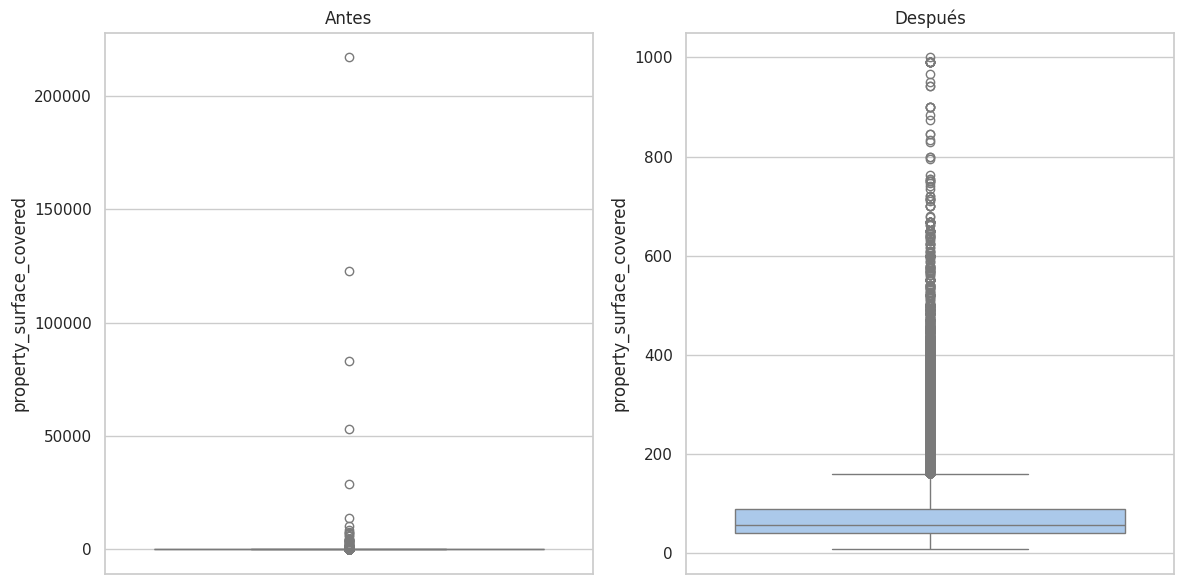

In [ ]:
#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_surface_covered')

In [ ]:
ds_train[(ds_train['property_surface_covered'] > 2000)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

Por ahora respetaremos éste valor atipico por ser un dato coherente. Se analizará más tarde.

#### *Análisis según superficie total (property_surface_total)*



<Axes: ylabel='property_surface_total'>

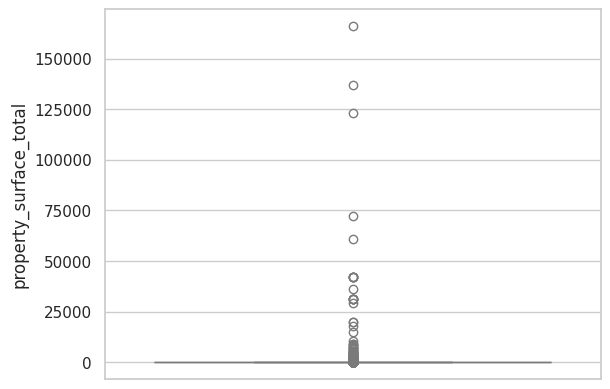

In [ ]:
sns.boxplot(y=ds_train.property_surface_total)

In [ ]:
limite_rango_iq(ds_train, 'property_surface_total')

(-45.0, 135.0)

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_total'] < 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_total'].idxmin()
ds_train.loc[min_surface_index]

id                          4jwFTdGy7N11fF14hLplcw==
start_date                                2021-05-17
end_date                                  2021-06-05
created_on                       2021-05-17 00:00:00
latitud                                   -34.571979
longitud                                  -58.446945
place_l3                                    Belgrano
property_type                           Departamento
property_rooms                                   3.0
property_bedrooms                                2.0
property_surface_total                          10.0
property_surface_covered                        65.0
property_price                              172216.0
Name: 32068, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [ ]:
ds_train[ds_train['property_surface_total'] < 15]

id  start_date    end_date created_on  \
32068   4jwFTdGy7N11fF14hLplcw==  2021-05-17  2021-06-05 2021-05-17   
104165  03zgVf+Yn3GtIEVJOn9I8g==  2021-05-28  2021-06-13 2021-05-28   
333830  FfMyx7es1we4sMCZL2XVTw==  2021-12-28  2022-02-09 2021-12-28   
299     fWyBppiSbXhNSIjAmVDULg==  2021-09-09  2021-09-26 2021-09-09   
21153   us/N38vEYZarzdFzep5a9A==  2021-03-15  2021-03-25 2021-03-15   
154950  /4B1aoAn2OzWObpjXevrmg==  2021-02-03  2022-09-01 2021-02-03   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
168082  nOmTA76B5Fc56I5HKId9Dg==  2021-04-30  2021-06-03 2021-04-30   
334734  YHwlmP7ig5lyXrqU3Othlw==  2021-12-28  2022-01-27 2021-12-28   
50425   rBJcf/OUoNMDP0JylFF2Vg==  2021-06-23  2022-02-09 2021-06-23   
168118  gsbwHqWC2NW1ywgCJd0xaQ==  2021-04-30  2021-06-03 2021-04-30   
41088   ngtAPqtsUhn8Y9+r/FgteA==  2021-07-19  9999-12-31 2021-07-19   
41192   jLK6eCdVrULnEhLxS2kgUg==  2021-01-12  2021-02-05 2021-01-12   
190609  /MC0i98hQuKwdP9/I6NdRg==  2021-10-09  2022-01-27 2021-10-09   
178234  3PIuolUQmDVlxT4sWCPe0w==  2021-03-23  2021-06-02 2021-03-23   

          latitud   longitud          place_l3 property_type  property_rooms  \
32068  -34.571979 -58.446945          Belgrano  Departamento             3.0   
104165 -34.643724 -58.418383  Parque Patricios  Departamento             1.0   
333830 -34.600456 -58.376960            Retiro  Departamento             1.0   
299    -34.597934 -58.376981            Retiro  Departamento             1.0   
21153  -34.633819 -58.504568        Villa Luro  Departamento             3.0   
154950 -34.637580 -58.500624        Villa Luro  Departamento             1.0   
72233  -34.597934 -58.376981            Retiro  Departamento             1.0   
76920  -34.625870 -58.384003      Constitución  Departamento             1.0   
168082 -34.606525 -58.430740         Caballito  Departamento             3.0   
334734 -34.563734 -58.483824     Villa Urquiza  Departamento             2.0   
50425  -34.644446 -58.418263           Pompeya  Departamento             1.0   
168118 -34.606525 -58.430740         Caballito  Departamento             3.0   
41088  -34.614573 -58.480650  Villa del Parque  Departamento             2.0   
41192  -34.635506 -58.417926             Boedo            PH             4.0   
190609 -34.568710 -58.473026          Saavedra  Departamento             1.0   
178234 -34.609567 -58.384745         Monserrat  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
32068            2.000000                    10.0                      65.0   
104165           1.000000                    14.0                      14.0   
333830           1.000000                    14.0                      14.0   
299              1.000000                    14.0                      14.0   
21153            2.000000                    10.0                      29.0   
154950           1.000000                    12.0                      24.0   
72233            1.000000                    14.0                      14.0   
76920            1.000000                    14.0                      14.0   
168082           2.000000                    12.0                      12.0   
334734           1.000000                    10.0                      60.0   
50425            1.000000                    14.0                      14.0   
168118           2.000000                    12.0                      22.0   
41088            2.397895                    14.0                      35.0   
41192            3.000000                    11.0                      75.0   
190609           1.000000                    14.0                      25.0   
178234           1.000000                    13.0                      13.0   

        property_price  
32068         172216.0  
104165         31500.0  
333830         37300.0  
299            45

Por las razones ya expuestas y teniendo en cuenta que son todos departamentos, decidimos reemplazar los datos de superficie total por los de superficie cubierta.

In [ ]:
# Reemplazamos el valor de superficie cubierta por el de superficie total cuando el valor sea menor a 10
ds_train.loc[ds_train['property_surface_total'] < 15, 'property_surface_total'] = ds_train.loc[ds_train['property_surface_total'] < 15, 'property_surface_covered']

In [ ]:
# Revisamos y solo quedan aquellos casos donde la superficie cubierta también era menor a 15.
ds_train[ds_train['property_surface_total'] < 15]

id  start_date    end_date created_on  \
104165  03zgVf+Yn3GtIEVJOn9I8g==  2021-05-28  2021-06-13 2021-05-28   
333830  FfMyx7es1we4sMCZL2XVTw==  2021-12-28  2022-02-09 2021-12-28   
299     fWyBppiSbXhNSIjAmVDULg==  2021-09-09  2021-09-26 2021-09-09   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
168082  nOmTA76B5Fc56I5HKId9Dg==  2021-04-30  2021-06-03 2021-04-30   
50425   rBJcf/OUoNMDP0JylFF2Vg==  2021-06-23  2022-02-09 2021-06-23   
178234  3PIuolUQmDVlxT4sWCPe0w==  2021-03-23  2021-06-02 2021-03-23   

          latitud   longitud          place_l3 property_type  property_rooms  \
104165 -34.643724 -58.418383  Parque Patricios  Departamento             1.0   
333830 -34.600456 -58.376960            Retiro  Departamento             1.0   
299    -34.597934 -58.376981            Retiro  Departamento             1.0   
72233  -34.597934 -58.376981            Retiro  Departamento             1.0   
76920  -34.625870 -58.384003      Constitución  Departamento             1.0   
168082 -34.606525 -58.430740         Caballito  Departamento             3.0   
50425  -34.644446 -58.418263           Pompeya  Departamento             1.0   
178234 -34.609567 -58.384745         Monserrat  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
104165                1.0                    14.0                      14.0   
333830                1.0                    14.0                      14.0   
299                   1.0                    14.0                      14.0   
72233                 1.0                    14.0                      14.0   
76920                 1.0                    14.0                      14.0   
168082                2.0                    12.0                      12.0   
50425                 1.0                    14.0                      14.0   
178234                1.0                    13.0                      13.0   

        property_price  
104165         31500.0  
333830         37300.0  
299            45200.0  
72233          45200.0  
76920          24500.0  
168082         22000.0  
50425          26500.0  
178234         55000.0

In [ ]:
ds_train[ds_train['property_surface_total'] > 100000]

id  start_date    end_date created_on  \
405324  tHz32dZ72wYshPnoABftrg==  2021-01-07  2021-06-02 2021-01-07   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
129214  tJ7TjXeyIl+4KPkaPqyAYA==  2021-07-01  9999-12-31 2021-07-01   

          latitud   longitud          place_l3 property_type  property_rooms  \
405324 -34.569963 -58.481658     Villa Urquiza            PH        4.000000   
1932   -34.637026 -58.426283  Parque Chacabuco          Casa        3.258097   
129214 -34.599421 -58.386867      Barrio Norte  Departamento        5.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
405324           3.000000                123000.0                     123.0   
1932             2.995732                166077.0                     217.0   
129214           3.000000                137000.0                     135.0   

        property_price  
405324        165000.0  
1932          250000.0  
129214        390000.0

En el caso de la propiedad de Parque Chacabuco, ninguno de los datos tiene coherencia al mirarlos en conjunto: una casa de 22.75 ambientes, y 17.23 habitaciones, con una superficie cubierta de 217.0 y total de 177198m^2. Tendriamos que imputar todos estos datos lo cual no tendría sentido, nos quedariamos con poco material real.

En los otros dos casos, parece ser más un error de escala asi que lo normalizamos.

In [ ]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_surface_total'] > 170000].index
ds_train.drop(id_outlier,inplace=True)

In [ ]:
# Modificamos los otros
condition = ds_train['property_surface_total'] > 100000
ds_train.loc[condition, 'property_surface_total'] /= 1000

ds_train[ds_train['property_surface_total'] > 100000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_train[ds_train['property_surface_total'] > 7000]

id  start_date    end_date created_on  \
275253  5nXtCXuxHhkZ51syuRB7YQ==  2021-09-15  2021-10-07 2021-09-15   
370921  DhCI1Vz1PAu5fOy930TFXw==  2021-04-24  2021-06-05 2021-04-24   
362741  G7sKDYpvhrBrps0xzAQrmQ==  2021-01-16  2021-04-14 2021-01-16   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
304492  Psg4w1RO9GxZAski6P2B8g==  2021-04-15  2021-06-05 2021-04-15   
300394  E2FhGbtCzmdLHk9QEY47BA==  2021-08-10  2021-09-15 2021-08-10   
370918  rnFgWleVdid1Czn05PkodA==  2021-04-24  2021-06-05 2021-04-24   
353009  f7xAHgUi1ruXPA9JxKGK6g==  2021-06-25  2021-08-10 2021-06-25   
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
459841  9aQHQRqWMburSn+z+Qt5aQ==  2021-01-05  2021-01-09 2021-01-05   
263945  xTMT4WGUrto9Ee8CBjxUxw==  2021-02-26  2021-02-28 2021-02-26   
84073   vMD1fCSS0kedOs8Bk/PCjA==  2021-02-05  2021-05-16 2021-02-05   
370917  OC6HYSBo/pqio5ZTLgoPvg==  2021-04-24  2021-06-05 2021-04-24   
219021  WQU6YIN+y4z30xaPRG4LHQ==  2021-03-07  2022-02-09 2021-03-07   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
370922  MkaLWAz6PgutYgXwXxPEjQ==  2021-04-24  2021-06-05 2021-04-24   
370932  IQUQeru+sjv8TBWlLfs+SA==  2021-04-24  2021-06-05 2021-04-24   
324541  s0do8ciUehI3xXZNULgg+Q==  2021-03-03  2021-03-23 2021-03-03   
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
459842  Y4PuRUaAW17tsLGwFTukhA==  2021-01-05  2021-01-09 2021-01-05   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
237392  wGXDCrWhpDX+JQBrC+7jpA==  2021-02-27  2021-03-03 2021-02-27   

          latitud   longitud       place_l3 property_type  property_rooms  \
275253 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370921 -34.571747 -58.422612        Palermo  Departamento             5.0   
362741 -34.579163 -58.455725     Colegiales  Departamento             1.0   
1140   -34.605781 -58.376705    San Nicolás  Departamento             4.0   
304492 -34.579163 -58.455725     Colegiales  Departamento             1.0   
300394 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370918 -34.571747 -58.422612        Palermo  Departamento             4.0   
353009 -34.579163 -58.455725     Colegiales  Departamento             1.0   
459849 -34.628282 -58.437803      Caballito  Departamento             3.0   
405272 -34.634638 -58.473519       Floresta            PH             4.0   
72316  -34.578917 -58.429373        Palermo  Departamento             2.0   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento             5.0   
459841 -34.627876 -58.437996      Caballito  Departamento             3.0   
263945 -34.576096 -58.441278        Palermo  Departamento             3.0   
84073  -34.588175 -58.396261       Recoleta  Departamento             1.0   
370917 -34.571747 -58.422612        Palermo  Departamento             4.0   
219021 -34.636532 -58.376406       Barracas  Departamento             4.0   
352883 -34.550093 -58.483034       Saavedra  Departamento             1.0   
370922 -34.571747 -58.422612        Palermo  Departamento             5.0   
370932 -34.571747 -58.422612        Palermo  Departamento             4.0   
324541 -34.628721 -58.421383          Boedo            PH             4.0   
313745 -34.649174 -58.413106        Pompeya            PH             6.0   
459842 -34.628397 -58.437706      Caballito  Departamento             3.0   
459847 -34.628247 -58.437696      Caballito  Departamento             4.0   
237392 -34.628721 -58.421383          Boedo            PH             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
275253                1.0                 31000.0                    26.000   
370921                

Se ve una tendencia entre la superficie total y la superficie cubierta que indicaría un error de escala. Vamos a corregirlo.

In [ ]:
# Buscamos las filas donde property_surface_total / 100 == property_surface_covered y hacemos una máscara.
mask = ds_train['property_surface_total'] / 100 == ds_train['property_surface_covered']

# Reemplazamos property_surface_total con property_surface_covered en esos casos
ds_train.loc[mask, 'property_surface_total'] = ds_train.loc[mask, 'property_surface_covered']

In [ ]:
ds_train[ds_train['property_surface_total'] > 7000]

id  start_date    end_date created_on  \
275253  5nXtCXuxHhkZ51syuRB7YQ==  2021-09-15  2021-10-07 2021-09-15   
370921  DhCI1Vz1PAu5fOy930TFXw==  2021-04-24  2021-06-05 2021-04-24   
362741  G7sKDYpvhrBrps0xzAQrmQ==  2021-01-16  2021-04-14 2021-01-16   
304492  Psg4w1RO9GxZAski6P2B8g==  2021-04-15  2021-06-05 2021-04-15   
300394  E2FhGbtCzmdLHk9QEY47BA==  2021-08-10  2021-09-15 2021-08-10   
370918  rnFgWleVdid1Czn05PkodA==  2021-04-24  2021-06-05 2021-04-24   
353009  f7xAHgUi1ruXPA9JxKGK6g==  2021-06-25  2021-08-10 2021-06-25   
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
263945  xTMT4WGUrto9Ee8CBjxUxw==  2021-02-26  2021-02-28 2021-02-26   
84073   vMD1fCSS0kedOs8Bk/PCjA==  2021-02-05  2021-05-16 2021-02-05   
370917  OC6HYSBo/pqio5ZTLgoPvg==  2021-04-24  2021-06-05 2021-04-24   
219021  WQU6YIN+y4z30xaPRG4LHQ==  2021-03-07  2022-02-09 2021-03-07   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
370922  MkaLWAz6PgutYgXwXxPEjQ==  2021-04-24  2021-06-05 2021-04-24   
370932  IQUQeru+sjv8TBWlLfs+SA==  2021-04-24  2021-06-05 2021-04-24   
324541  s0do8ciUehI3xXZNULgg+Q==  2021-03-03  2021-03-23 2021-03-03   
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
459842  Y4PuRUaAW17tsLGwFTukhA==  2021-01-05  2021-01-09 2021-01-05   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
237392  wGXDCrWhpDX+JQBrC+7jpA==  2021-02-27  2021-03-03 2021-02-27   

          latitud   longitud       place_l3 property_type  property_rooms  \
275253 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370921 -34.571747 -58.422612        Palermo  Departamento             5.0   
362741 -34.579163 -58.455725     Colegiales  Departamento             1.0   
304492 -34.579163 -58.455725     Colegiales  Departamento             1.0   
300394 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370918 -34.571747 -58.422612        Palermo  Departamento             4.0   
353009 -34.579163 -58.455725     Colegiales  Departamento             1.0   
459849 -34.628282 -58.437803      Caballito  Departamento             3.0   
405272 -34.634638 -58.473519       Floresta            PH             4.0   
72316  -34.578917 -58.429373        Palermo  Departamento             2.0   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento             5.0   
263945 -34.576096 -58.441278        Palermo  Departamento             3.0   
84073  -34.588175 -58.396261       Recoleta  Departamento             1.0   
370917 -34.571747 -58.422612        Palermo  Departamento             4.0   
219021 -34.636532 -58.376406       Barracas  Departamento             4.0   
352883 -34.550093 -58.483034       Saavedra  Departamento             1.0   
370922 -34.571747 -58.422612        Palermo  Departamento             5.0   
370932 -34.571747 -58.422612        Palermo  Departamento             4.0   
324541 -34.628721 -58.421383          Boedo            PH             4.0   
313745 -34.649174 -58.413106        Pompeya            PH             6.0   
459842 -34.628397 -58.437706      Caballito  Departamento             3.0   
459847 -34.628247 -58.437696      Caballito  Departamento             4.0   
237392 -34.628721 -58.421383          Boedo            PH             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
275253                1.0                 31000.0                    26.000   
370921                4.0                 42110.0                   307.000   
362741                1.0                 31000.0                    26.000   
304492                1.0                 31000.0                    26.000   
300394                1.0                 31000.0                    26.000   
37

Algunos registros específicos parecen ser errores de tipeo/escala. Los corregimos manualmente y el resto serán corregidos logaritmicamente.

In [ ]:
# Corección de error de tipeo/escala
condition = (ds_train['property_surface_total'] == 31000) & (ds_train['property_surface_covered'] == 26)
condition2 = (ds_train['property_surface_total'] == 42110.0) & (ds_train['property_surface_covered'] == 307)
ds_train.loc[condition, 'property_surface_total'] /= 1000
ds_train.loc[condition2, 'property_surface_total'] /= 100


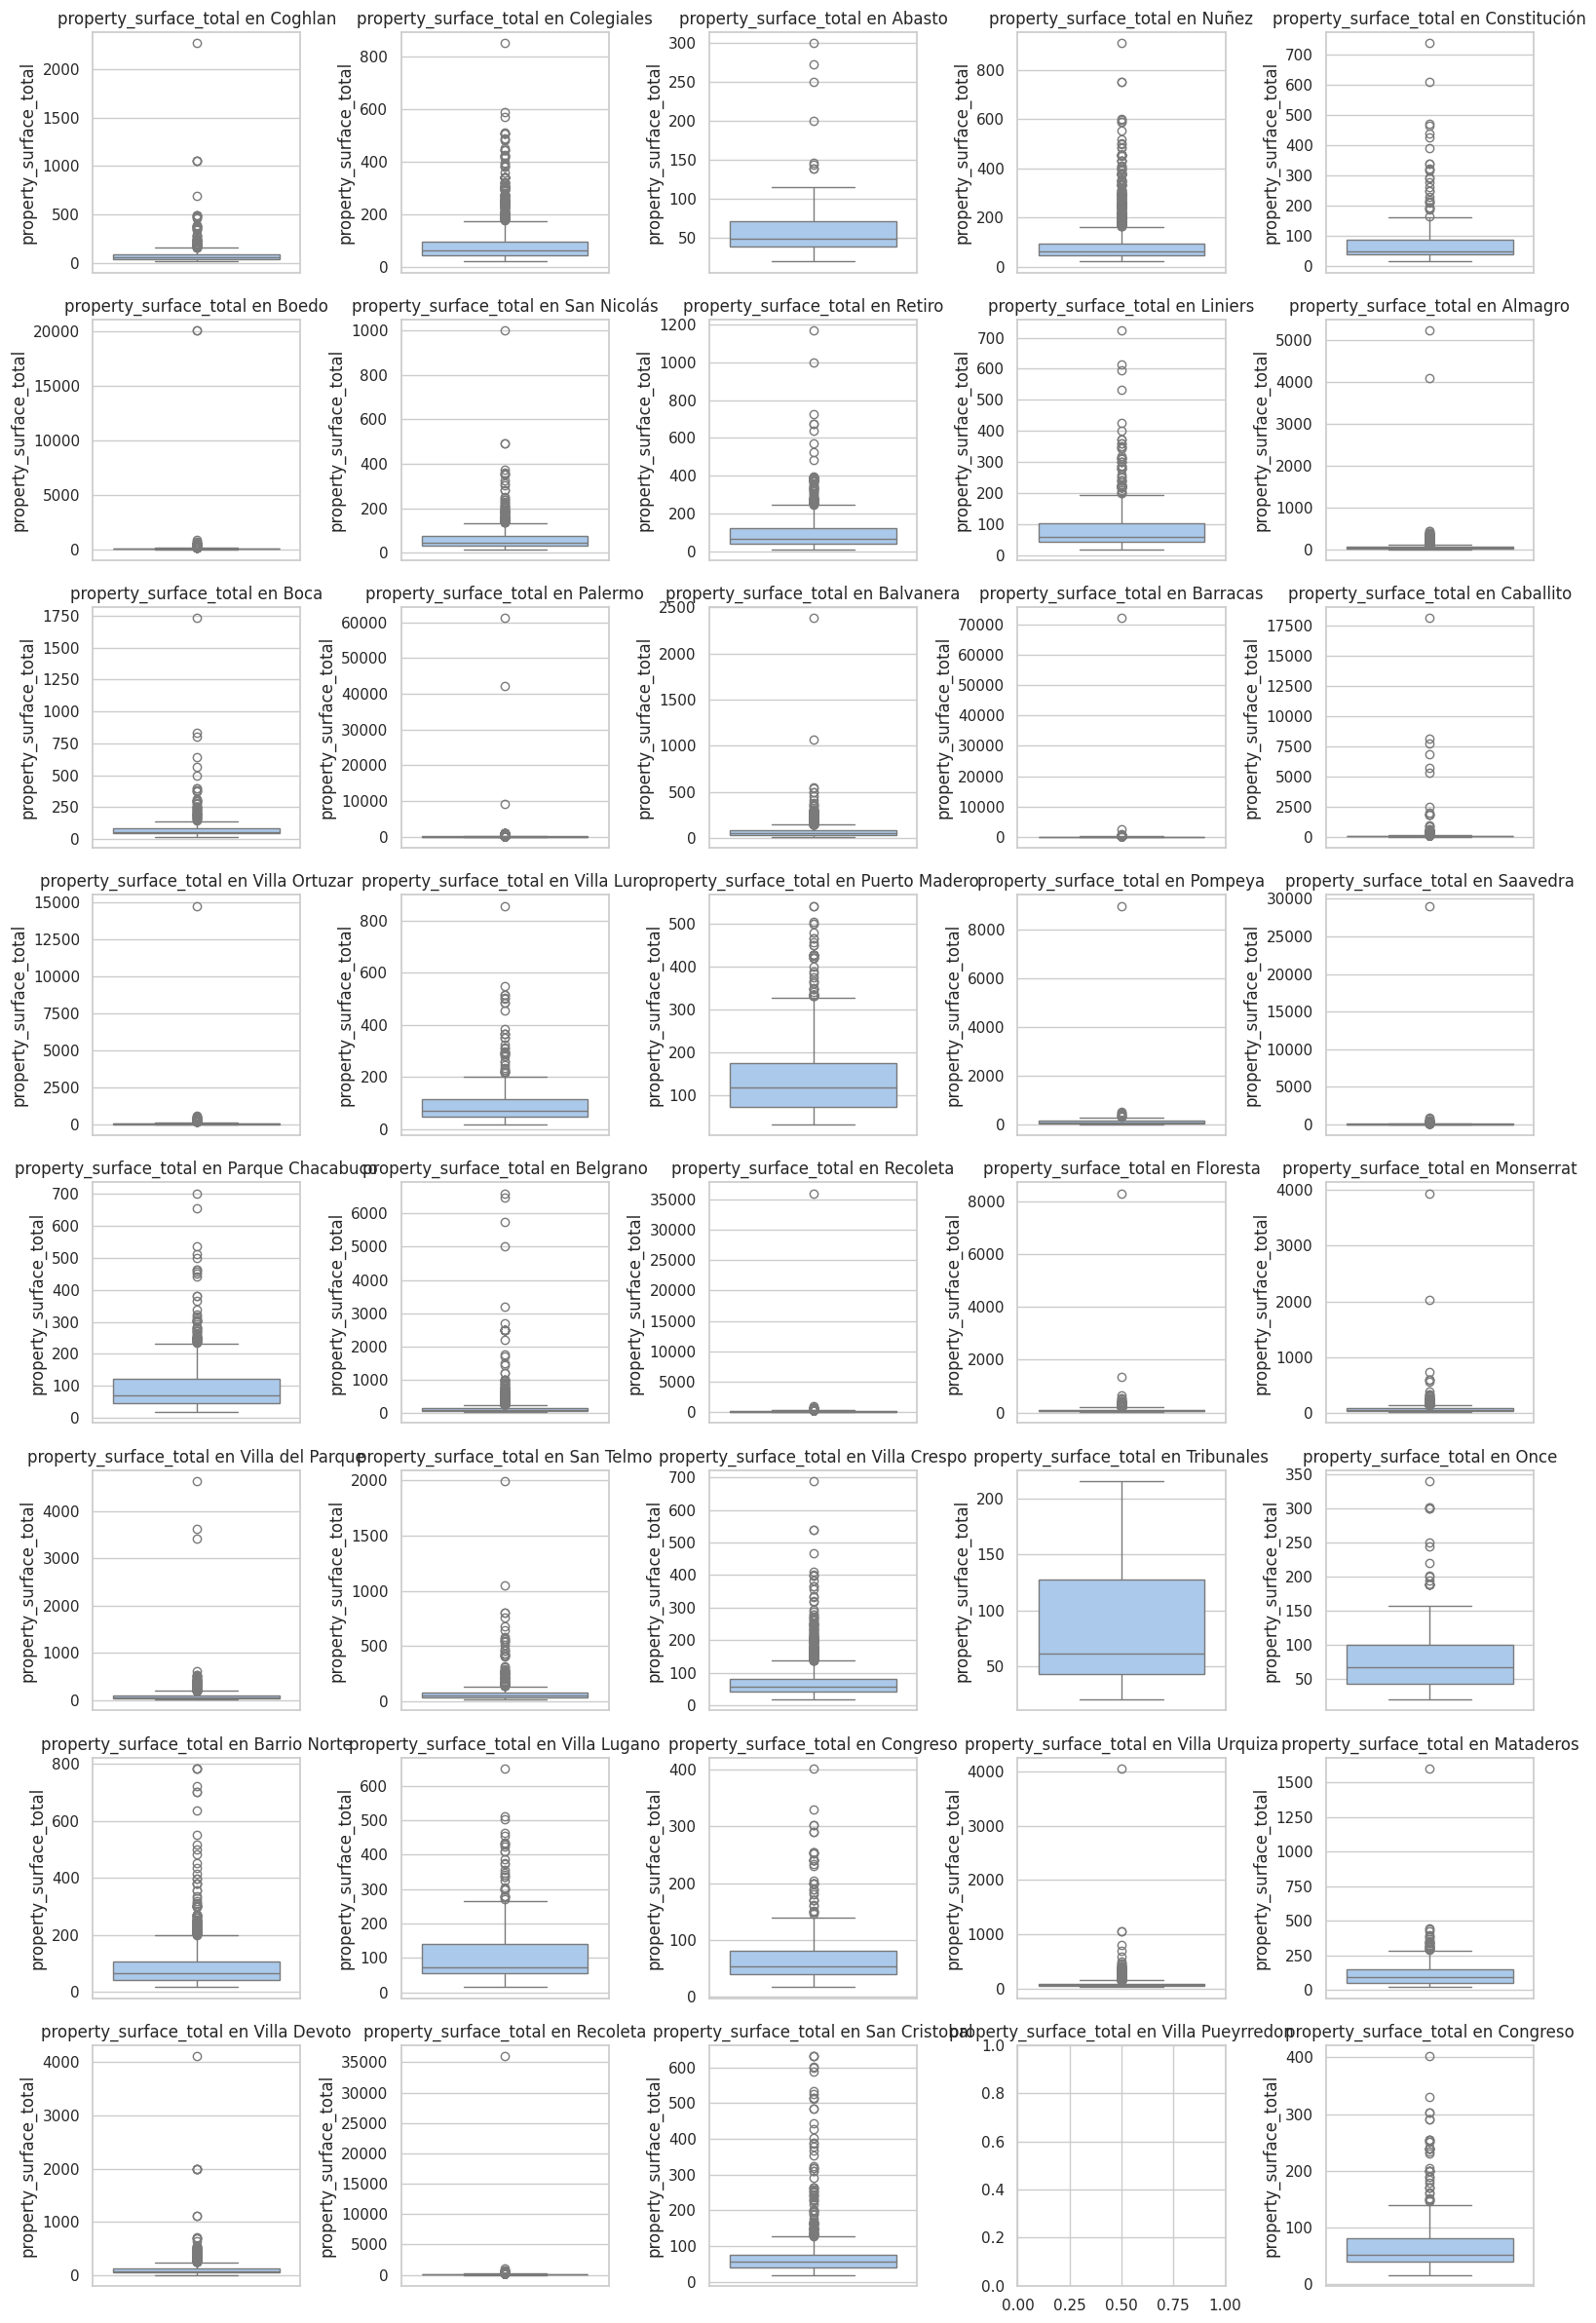

In [ ]:
plot_por_barrio(ds_train, 'property_surface_total')

Podemos ver en las comparaciones de los barrios que incluso en aquellos que tienen más variaciones de tamaño de superficie total, los valores por encima de 3000 son outliers extremos, asi que normalizaremos esos valores.

In [ ]:
# Corrección logaritmica
ds_train.loc[(ds_train['property_surface_total'] > 3000.0), 'property_surface_total'] = np.log(ds_train['property_surface_total'])

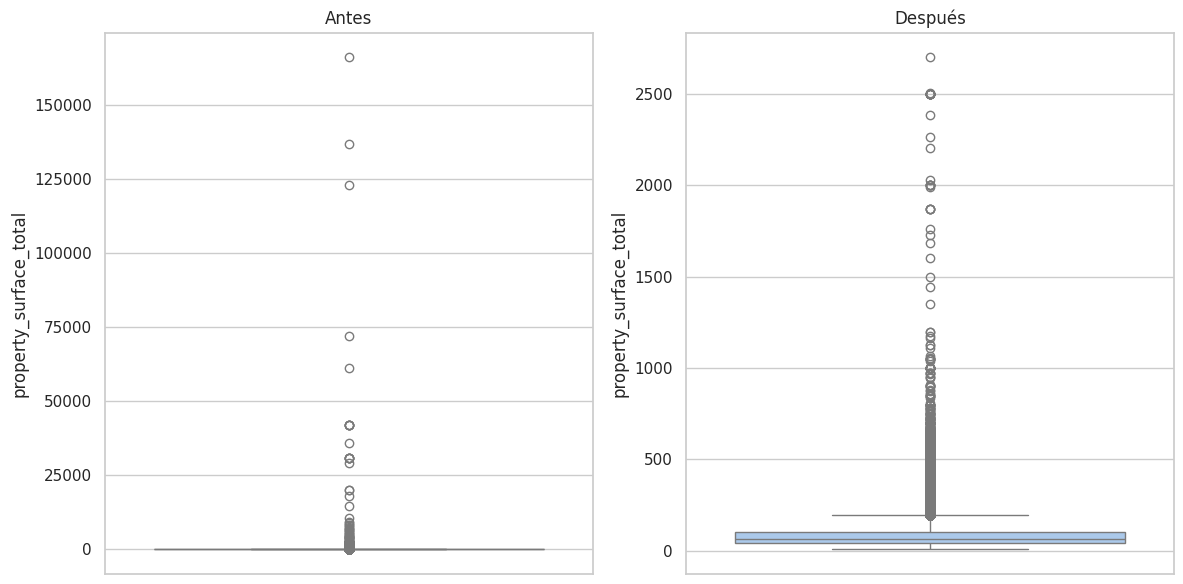

In [ ]:
#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_surface_total')

#### **Z-Score, normal y modificado**

In [ ]:
def plot_z(df, variable):
  plt.hist(df[variable])
  plt.title("Histograma Z-Score "+ variable)
  plt.xlabel("Z-Score "+variable)
  plt.tight_layout()
  plt.show()
  return

<ipython-input-197-1ce1084e760a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-197-1ce1084e760a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



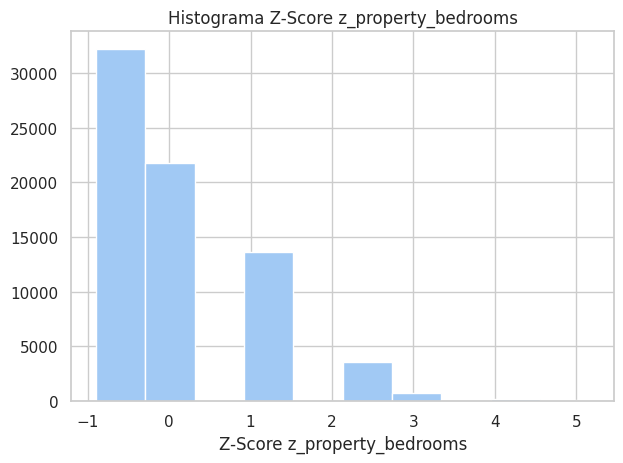

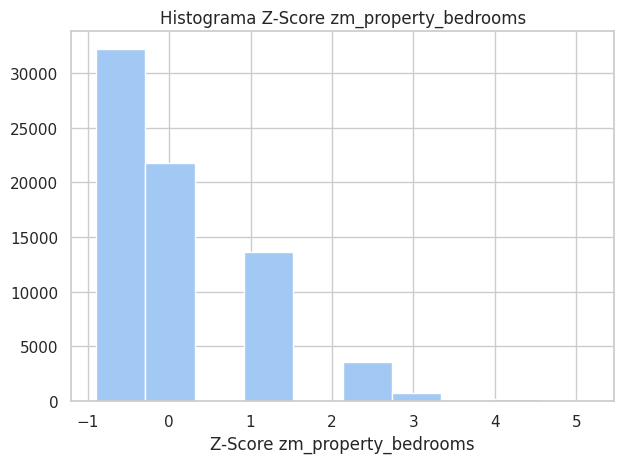

In [ ]:
# Z Score property_bedrooms
ds_train['z_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)
ds_train['zm_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)

plot_z(ds_train, 'z_property_bedrooms')
plot_z(ds_train, 'zm_property_bedrooms')


In [ ]:
ds_train[(ds_train['z_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
171299  trfw04e4hbUBl71Iy/MnAA==  2021-04-19  2021-06-05 2021-04-19   
369645  Fo8wpD36R/8umFa0qGVmgA==  2021-11-08  2022-01-27 2021-11-08   
71585   bkqYueEJq2YwHSSKUkvtxg==  2021-05-29  2021-06-16 2021-05-29   
275119  1kinKbnpXDGuJ/3xSY81bw==  2021-09-15  2021-09-16 2021-09-15   
267481  GsMafsuIG9pj1Nav5cn5Tg==  2021-07-09  2021-07-14 2021-07-09   
...                          ...         ...         ...        ...   
239183  jyynD4VNyy77y4Wgf8G9uA==  2021-05-21  2021-06-05 2021-05-21   
84979   Sxr4kfHQsZ0W8RjkMjdkUA==  2021-03-26  2021-04-13 2021-03-26   
303903  FzaCrwAN9oMUXFSzKYOQtw==  2021-04-15  2021-06-05 2021-04-15   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   
209423  qjq9ef1ldmOdeygQaqqQCQ==  2021-11-29  2022-01-27 2021-11-29   

          latitud   longitud      place_l3 property_type  property_rooms  \
171299 -34.595356 -58.408323      Recoleta  Departamento             9.0   
369645 -34.556356 -58.465867         Nuñez          Casa             8.0   
71585  -34.565145 -58.493552      Saavedra            PH             6.0   
275119 -34.620682 -58.458331     Caballito          Casa             8.0   
267481 -34.554993 -58.445175      Belgrano          Casa             8.0   
...           ...        ...           ...           ...             ...   
239183 -34.572554 -58.469842      Belgrano          Casa             8.0   
84979  -34.629640 -58.460432        Flores  Departamento             7.0   
303903 -34.593316 -58.377201        Retiro  Departamento             9.0   
239181 -34.572554 -58.469842      Belgrano          Casa             8.0   
209423 -34.594110 -58.377692  Barrio Norte  Departamento             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
171299                6.0                   185.0                     185.0   
369645                6.0                   392.0                     216.0   
71585                 6.0                   199.0                     126.0   
275119                6.0                   265.0                     195.0   
267481                6.0                   560.0                     236.0   
...                   ...                     ...                       ...   
239183                7.0                   400.0                     400.0   
84979                 6.0                   190.0                     176.0   
303903                7.0                   380.0                     350.0   
239181                7.0                   400.0                     400.0   
209423                6.0                   380.0                     370.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
171299        678000.0             4.151078              4.151078  
369645       1300000.0             4.151078              4.151078  
71585         245000.0             4.151078              4.151078  
275119        270000.0             4.151078              4.151078  
267481        790000.0             4.151078              4.151078  
...                ...                  ...                   ...  
239183        920000.0             5.160603              5.160603  
84979         390000.0             4.151078              4.151078  
303903        690000.0             5.160603              5.160603  
239181        920000.0             5.160603              5.160603  
209423        900000.0             4.151078              4.151078  

[278 rows x 15 columns]

In [ ]:
ds_train[(ds_train['zm_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
171299  trfw04e4hbUBl71Iy/MnAA==  2021-04-19  2021-06-05 2021-04-19   
369645  Fo8wpD36R/8umFa0qGVmgA==  2021-11-08  2022-01-27 2021-11-08   
71585   bkqYueEJq2YwHSSKUkvtxg==  2021-05-29  2021-06-16 2021-05-29   
275119  1kinKbnpXDGuJ/3xSY81bw==  2021-09-15  2021-09-16 2021-09-15   
267481  GsMafsuIG9pj1Nav5cn5Tg==  2021-07-09  2021-07-14 2021-07-09   
...                          ...         ...         ...        ...   
239183  jyynD4VNyy77y4Wgf8G9uA==  2021-05-21  2021-06-05 2021-05-21   
84979   Sxr4kfHQsZ0W8RjkMjdkUA==  2021-03-26  2021-04-13 2021-03-26   
303903  FzaCrwAN9oMUXFSzKYOQtw==  2021-04-15  2021-06-05 2021-04-15   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   
209423  qjq9ef1ldmOdeygQaqqQCQ==  2021-11-29  2022-01-27 2021-11-29   

          latitud   longitud      place_l3 property_type  property_rooms  \
171299 -34.595356 -58.408323      Recoleta  Departamento             9.0   
369645 -34.556356 -58.465867         Nuñez          Casa             8.0   
71585  -34.565145 -58.493552      Saavedra            PH             6.0   
275119 -34.620682 -58.458331     Caballito          Casa             8.0   
267481 -34.554993 -58.445175      Belgrano          Casa             8.0   
...           ...        ...           ...           ...             ...   
239183 -34.572554 -58.469842      Belgrano          Casa             8.0   
84979  -34.629640 -58.460432        Flores  Departamento             7.0   
303903 -34.593316 -58.377201        Retiro  Departamento             9.0   
239181 -34.572554 -58.469842      Belgrano          Casa             8.0   
209423 -34.594110 -58.377692  Barrio Norte  Departamento             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
171299                6.0                   185.0                     185.0   
369645                6.0                   392.0                     216.0   
71585                 6.0                   199.0                     126.0   
275119                6.0                   265.0                     195.0   
267481                6.0                   560.0                     236.0   
...                   ...                     ...                       ...   
239183                7.0                   400.0                     400.0   
84979                 6.0                   190.0                     176.0   
303903                7.0                   380.0                     350.0   
239181                7.0                   400.0                     400.0   
209423                6.0                   380.0                     370.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
171299        678000.0             4.151078              4.151078  
369645       1300000.0             4.151078              4.151078  
71585         245000.0             4.151078              4.151078  
275119        270000.0             4.151078              4.151078  
267481        790000.0             4.151078              4.151078  
...                ...                  ...                   ...  
239183        920000.0             5.160603              5.160603  
84979         390000.0             4.151078              4.151078  
303903        690000.0             5.160603              5.160603  
239181        920000.0             5.160603              5.160603  
209423        900000.0             4.151078              4.151078  

[278 rows x 15 columns]

In [ ]:
ds_train[(ds_train['z_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

In [ ]:
ds_train[(ds_train['zm_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

Siguiendo el Z score, podemos ver que no existen outliers negativos, incluso usando un valor mínimo de -1. Usando la regla de oro de 3.5, podemos ver que si lo existen positivos y en una cantidad bastante significativa (270 registros). Vamos a ampliar ligeramente este factor.

In [ ]:
ds_train[(ds_train['z_property_bedrooms'] > 5)]

id  start_date    end_date created_on  \
221832  qSYgo2cL11dYsKSTenve1A==  2021-06-30  2021-07-03 2021-06-30   
419923  WzM3a+vloszrf/C8UM7vqg==  2021-12-01  2022-01-27 2021-12-01   
245430  sw6Y2UwVsN+YOQz1D2MtCw==  2021-10-08  2022-02-09 2021-10-08   
251811  AXcoUMwXUfZ/taJ27RlqYw==  2021-06-18  2021-08-25 2021-06-18   
441897  zCnRx6zoD4JjG+r+MNJekw==  2021-05-07  2021-06-05 2021-05-07   
...                          ...         ...         ...        ...   
351821  SioTWvNhCyTDPmU9CtHJSw==  2021-06-25  2021-07-04 2021-06-25   
325449  LZhr2owtQ83MiDi55T7vfA==  2021-08-27  2022-03-29 2021-08-27   
239183  jyynD4VNyy77y4Wgf8G9uA==  2021-05-21  2021-06-05 2021-05-21   
303903  FzaCrwAN9oMUXFSzKYOQtw==  2021-04-15  2021-06-05 2021-04-15   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   

          latitud   longitud      place_l3 property_type  property_rooms  \
221832 -34.629030 -58.456957        Flores          Casa        8.000000   
419923 -34.577702 -58.399924       Palermo          Casa        9.000000   
245430 -34.553050 -58.448411      Belgrano          Casa        8.000000   
251811 -34.629273 -58.418845         Boedo          Casa        2.484907   
441897 -34.619862 -58.418653       Almagro            PH       10.000000   
...           ...        ...           ...           ...             ...   
351821 -34.615136 -58.376863     Monserrat          Casa        7.000000   
325449 -34.598801 -58.436084  Villa Crespo          Casa        5.000000   
239183 -34.572554 -58.469842      Belgrano          Casa        8.000000   
303903 -34.593316 -58.377201        Retiro  Departamento        9.000000   
239181 -34.572554 -58.469842      Belgrano          Casa        8.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
221832                7.0                   637.0                     637.0   
419923                7.0                   850.0                     800.0   
245430                7.0                   415.0                     415.0   
251811                7.0                   500.0                     500.0   
441897                7.0                   380.0                     260.0   
...                   ...                     ...                       ...   
351821                7.0                   258.0                     258.0   
325449                7.0                   411.0                     274.0   
239183                7.0                   400.0                     400.0   
303903                7.0                   380.0                     350.0   
239181                7.0                   400.0                     400.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
221832       1350000.0             5.160603              5.160603  
419923       4500000.0             5.160603              5.160603  
245430        820000.0             5.160603              5.160603  
251811        450000.0             5.160603              5.160603  
441897        330000.0             5.160603              5.160603  
...                ...                  ...                   ...  
351821        329000.0             5.160603              5.160603  
325449        430000.0             5.160603              5.160603  
239183        920000.0             5.160603              5.160603  
303903        690000.0             5.160603              5.160603  
239181        920000.0             5.160603              5.160603  

[98 rows x 15 columns]

No podemos sacar ninguna conclusión de los registros, más allá de que solo tomando en cuenta esta variable son registros atípicos. Esperaremos al análisis multivariado para tomar decisiones al respecto de estos outliers.

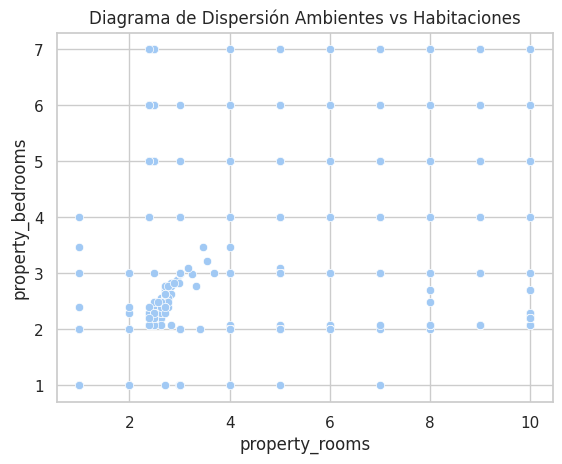

In [ ]:
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones")
plt.show()

En el analisis univariado solucionamos los outliers imposibles.  

In [ ]:
# Caso: más habitaciones que ambientes
condition= (ds_train['property_rooms'] < ds_train['property_bedrooms'])
ds_train[condition]

id  start_date    end_date created_on  \
115491  u5hOV+bJihRU3VAVxsfsrw==  2021-12-07  2022-01-27 2021-12-07   
63013   q5mE4qv6OxYNWlMis+Mwig==  2021-02-06  2021-07-20 2021-02-06   
115504  qsmPAKJ9brIGa8jbUAtQ1Q==  2021-12-07  2022-01-27 2021-12-07   
399491  QNzj6fRvnJSZy8HVQQAfiw==  2021-02-13  2021-09-19 2021-02-13   
385730  qgnjg2cQkLeAALjoJhJl1g==  2021-02-10  2021-03-25 2021-02-10   
...                          ...         ...         ...        ...   
214047  iiluCSGPoNS2rL+viZL6Dw==  2021-06-03  2021-06-05 2021-06-03   
325449  LZhr2owtQ83MiDi55T7vfA==  2021-08-27  2022-03-29 2021-08-27   
100370  zUsUsmAutDkdz1cIuJ9ANg==  2021-04-07  2021-08-26 2021-04-07   
115485  hrKv65SUn9Qf8dlGuPYhHw==  2021-12-07  2022-01-27 2021-12-07   
314524  zQLIDasZzzC/Mrns3r4TLw==  2021-01-06  2021-03-15 2021-01-06   

          latitud   longitud       place_l3 property_type  property_rooms  \
115491 -34.613037 -58.360984  Puerto Madero  Departamento             3.0   
63013  -34.650211 -58.503437      Mataderos  Departamento             1.0   
115504 -34.613261 -58.361513  Puerto Madero  Departamento             3.0   
399491 -34.618449 -58.505422   Monte Castro  Departamento             1.0   
385730 -34.623053 -58.447006      Caballito  Departamento             4.0   
...           ...        ...            ...           ...             ...   
214047 -34.595985 -58.401429   Barrio Norte  Departamento             1.0   
325449 -34.598801 -58.436084   Villa Crespo          Casa             5.0   
100370 -34.608162 -58.453786      Caballito          Casa             5.0   
115485 -34.613261 -58.361513  Puerto Madero  Departamento             3.0   
314524 -34.567787 -58.448913       Belgrano  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
115491                4.0                   170.0                     166.0   
63013                 2.0                   120.0                     112.0   
115504                4.0                   170.0                     166.0   
399491                2.0                    56.0                      47.0   
385730                5.0                   145.0                     135.0   
...                   ...                     ...                       ...   
214047                2.0                    58.0                      58.0   
325449                7.0                   411.0                     274.0   
100370                6.0                   366.0                     140.0   
115485                4.0                   170.0                     166.0   
314524                4.0                   126.0                     126.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
115491       1050000.0             2.132028              2.132028  
63013         155000.0             0.112978              0.112978  
115504        900000.0             2.132028              2.132028  
399491         89000.0             0.112978              0.112978  
385730        299000.0             3.141553              3.141553  
...                ...                  ...                   ...  
214047        180000.0             0.112978              0.112978  
325449        430000.0             5.160603              5.160603  
100370        320000.0             4.151078              4.151078  
115485       1250000.0             2.132028              2.132028  
314524        325000.0             2.132028              2.132028  

[125 rows x 15 columns]

Tenemos 118 registros en los que el número de habitaciones es mayor que el de ambientes.

Varios de estos registros tienen valores irracionales para una habitación (2.397... en vez de números enteros) y podrían haber sido resultados de imputaciones y transformaciones anteriores.
Una solución podría ser copiar los valores de habitaciones a ambientes, pero previniendo que algunos puedan ser valores verdaderos y para que no se pierdan, probaremos invirtiendo las columnas de estos casos en específico ya que muchos tienen sentido de esa manera (casas con 6 ambientes y 4 habitaciones, departamentos de 2 ambientes y una habitación, por dar unos ejemplos). Es un cambio riesgoso pero se tendrá en cuenta por si llegara a haber discrepancias en resultados futuros.

In [ ]:
# Creamos una máscara booleana para nuestra condición
mask = ds_train['property_rooms'] < ds_train['property_bedrooms']

# Invertimos los valores usando la máscara
ds_train.loc[mask, ['property_rooms', 'property_bedrooms']] = ds_train.loc[mask, ['property_bedrooms', 'property_rooms']].values


In [ ]:
ds_train[(ds_train['z_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
171299  trfw04e4hbUBl71Iy/MnAA==  2021-04-19  2021-06-05 2021-04-19   
369645  Fo8wpD36R/8umFa0qGVmgA==  2021-11-08  2022-01-27 2021-11-08   
71585   bkqYueEJq2YwHSSKUkvtxg==  2021-05-29  2021-06-16 2021-05-29   
275119  1kinKbnpXDGuJ/3xSY81bw==  2021-09-15  2021-09-16 2021-09-15   
267481  GsMafsuIG9pj1Nav5cn5Tg==  2021-07-09  2021-07-14 2021-07-09   
...                          ...         ...         ...        ...   
239183  jyynD4VNyy77y4Wgf8G9uA==  2021-05-21  2021-06-05 2021-05-21   
84979   Sxr4kfHQsZ0W8RjkMjdkUA==  2021-03-26  2021-04-13 2021-03-26   
303903  FzaCrwAN9oMUXFSzKYOQtw==  2021-04-15  2021-06-05 2021-04-15   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   
209423  qjq9ef1ldmOdeygQaqqQCQ==  2021-11-29  2022-01-27 2021-11-29   

          latitud   longitud      place_l3 property_type  property_rooms  \
171299 -34.595356 -58.408323      Recoleta  Departamento             9.0   
369645 -34.556356 -58.465867         Nuñez          Casa             8.0   
71585  -34.565145 -58.493552      Saavedra            PH             6.0   
275119 -34.620682 -58.458331     Caballito          Casa             8.0   
267481 -34.554993 -58.445175      Belgrano          Casa             8.0   
...           ...        ...           ...           ...             ...   
239183 -34.572554 -58.469842      Belgrano          Casa             8.0   
84979  -34.629640 -58.460432        Flores  Departamento             7.0   
303903 -34.593316 -58.377201        Retiro  Departamento             9.0   
239181 -34.572554 -58.469842      Belgrano          Casa             8.0   
209423 -34.594110 -58.377692  Barrio Norte  Departamento             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
171299                6.0                   185.0                     185.0   
369645                6.0                   392.0                     216.0   
71585                 6.0                   199.0                     126.0   
275119                6.0                   265.0                     195.0   
267481                6.0                   560.0                     236.0   
...                   ...                     ...                       ...   
239183                7.0                   400.0                     400.0   
84979                 6.0                   190.0                     176.0   
303903                7.0                   380.0                     350.0   
239181                7.0                   400.0                     400.0   
209423                6.0                   380.0                     370.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
171299        678000.0             4.151078              4.151078  
369645       1300000.0             4.151078              4.151078  
71585         245000.0             4.151078              4.151078  
275119        270000.0             4.151078              4.151078  
267481        790000.0             4.151078              4.151078  
...                ...                  ...                   ...  
239183        920000.0             5.160603              5.160603  
84979         390000.0             4.151078              4.151078  
303903        690000.0             5.160603              5.160603  
239181        920000.0             5.160603              5.160603  
209423        900000.0             4.151078              4.151078  

[278 rows x 15 columns]

270 registros permanecen como outliers.

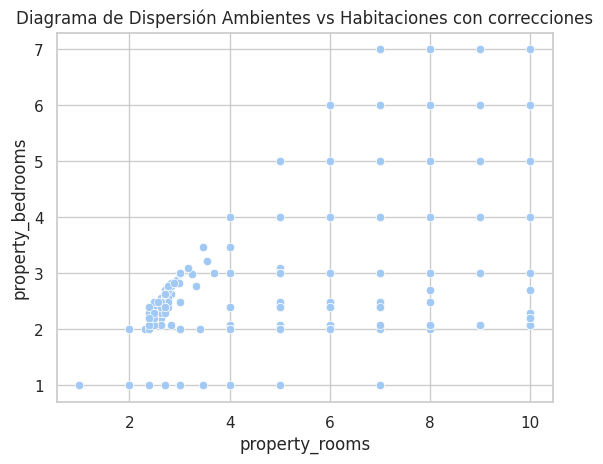

In [ ]:
# Visualización después de correcciones
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones con correcciones")
plt.show()


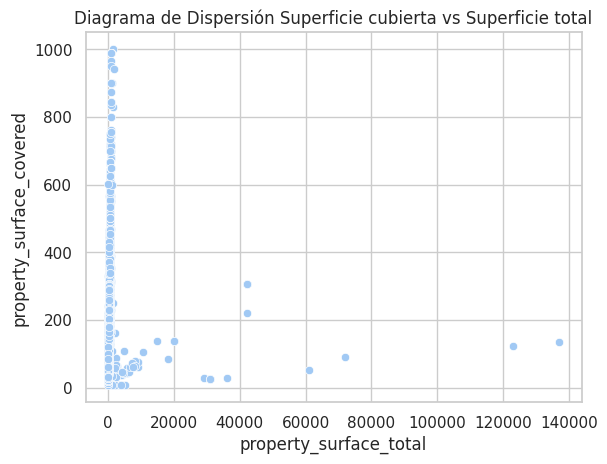

In [ ]:
sns.scatterplot(y=ds_train["property_surface_covered"], x=df["property_surface_total"])
plt.title("Diagrama de Dispersión Superficie cubierta vs Superficie total")
plt.show()

En primer lugar, vamos a distinguir los casos triviales donde la superficie cubierta es mayor a la superficie total.

In [ ]:
# Casos donde la superficie cubierta es mayor a la total
ds_train[(ds_train['property_surface_total'] < ds_train['property_surface_covered'])]

id  start_date    end_date created_on  \
59699   2cgWC2u3yEQOhMQfWtXdrw==  2021-01-25  2021-02-04 2021-01-25   
294493  r9pMljmxcawPA3GvKon0cA==  2021-07-23  9999-12-31 2021-07-23   
330819  JWGk2xcZX9m06cuW6mRMzw==  2021-01-15  2022-01-30 2021-01-15   
67610   d8DYhhBD9+Mkk/yXLvGHug==  2021-08-02  2022-04-16 2021-08-02   
341898  cJqpxZhCQd1iqb3kQSPOmg==  2021-09-28  2021-09-28 2021-09-28   
...                          ...         ...         ...        ...   
68509   yCFVD1OXA1L/cyD3Kmbntg==  2021-03-27  2021-04-15 2021-03-27   
354051  ZLfkJXV5SR5PXlgAxykITQ==  2021-11-04  2022-02-26 2021-11-04   
354044  X1gRClEO+30QJewk8ECOUg==  2021-11-04  2021-11-06 2021-11-04   
58816   z7R3uOssz+7a/+SCKlL8PA==  2021-03-13  2021-06-05 2021-03-13   
104592  6xECtOL2yVggaJiZZXXtpA==  2021-09-10  2022-03-09 2021-09-10   

          latitud   longitud      place_l3 property_type  property_rooms  \
59699  -34.598425 -58.419675       Almagro  Departamento             3.0   
294493 -34.553766 -58.443428      Belgrano          Casa             5.0   
330819 -34.599686 -58.420354       Almagro  Departamento             4.0   
67610  -34.595270 -58.408159  Barrio Norte  Departamento             3.0   
341898 -34.592656 -58.476247     Agronomía  Departamento             3.0   
...           ...        ...           ...           ...             ...   
68509  -34.575528 -58.443332    Colegiales  Departamento             3.0   
354051 -34.570177 -58.434159       Palermo  Departamento             4.0   
354044 -34.570177 -58.434159       Palermo  Departamento             4.0   
58816  -34.590891 -58.430793       Palermo          Casa             6.0   
104592 -34.596675 -58.424455       Palermo          Casa             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
59699                 2.0                    54.0                      56.0   
294493                4.0                   418.0                     432.0   
330819                3.0                   106.0                     112.0   
67610                 2.0                    41.0                      48.0   
341898                2.0                    32.0                      35.0   
...                   ...                     ...                       ...   
68509                 2.0                    47.0                      52.0   
354051                3.0                   108.0                     113.0   
354044                3.0                   108.0                     113.0   
58816                 5.0                   529.0                     550.0   
104592                5.0                   200.0                     450.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
59699          96000.0             0.112978              0.112978  
294493        920000.0             2.132028              2.132028  
330819        209000.0             1.122503              1.122503  
67610          94900.0             0.112978              0.112978  
341898         65500.0             0.112978              0.112978  
...                ...                  ...                   ...  
68509          95000.0             0.112978              0.112978  
354051        260000.0             1.122503              1.122503  
354044        330000.0             1.122503              1.122503  
58816        1050000.0             3.141553              3.141553  
104592        350000.0             3.141553              3.141553  

[687 rows x 15 columns]

Vamos a combinar algunas de las técnicas que ya realizamos anteriormente.

In [ ]:
# Creamos una máscara booleana para nuestra condición
mask = ds_train['property_surface_total'] < ds_train['property_surface_covered']

# Invertimos los valores usando la máscara
ds_train.loc[mask, ['property_surface_total', 'property_surface_covered']] = ds_train.loc[mask, ['property_surface_covered', 'property_surface_covered']].values

Aquí se podría revisar que no haya valores como superficies cubiertas muy pequeñas, pero por ahora se mantendrá así a menos que se determine que sigue habiendo demasiado ruido en nuestro ds.

### Análisis multivariado

#### **Isolation forest**

In [ ]:
# Cargo los datos
X =ds_train.copy()
X.head()

id  start_date    end_date created_on  \
152130  WdwW+njifJaAx+6GEb4Hdg==  2021-08-05  9999-12-31 2021-08-05   
62001   SR7AY4G7Cm11MDGP+geKgA==  2021-05-01  2021-06-05 2021-05-01   
51046   QZIxx+N2GuKzSMOoAxUcPQ==  2021-06-23  2021-10-18 2021-06-23   
159193  Nm3DjXksy709Lyo2zZkb7Q==  2021-11-13  2022-01-15 2021-11-13   
293794  9HQQvH9rPnePfqrrCbRoLA==  2021-02-23  2022-04-13 2021-02-23   

          latitud   longitud      place_l3 property_type  property_rooms  \
152130 -34.636634 -58.484079      Floresta  Departamento             1.0   
62001  -34.576115 -58.433387       Palermo  Departamento             3.0   
51046  -34.592109 -58.407433      Recoleta  Departamento             3.0   
159193 -34.620389 -58.457624     Caballito  Departamento             3.0   
293794 -34.601192 -58.431567  Villa Crespo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
152130                1.0                    36.0                      33.0   
62001                 2.0                    73.0                      70.0   
51046                 2.0                    88.0                      84.0   
159193                2.0                    58.0                      53.0   
293794                2.0                    61.0                      61.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
152130         71000.0            -0.896547             -0.896547  
62001         165000.0             0.112978              0.112978  
51046         220000.0             0.112978              0.112978  
159193        139000.0             0.112978              0.112978  
293794        110000.0             0.112978              0.112978

In [ ]:
# Limpio el dataset
X.drop(columns=['latitud', 'longitud', 'created_on', 'end_date', 'start_date'], inplace=True)
X.head()

id      place_l3 property_type  property_rooms  \
152130  WdwW+njifJaAx+6GEb4Hdg==      Floresta  Departamento             1.0   
62001   SR7AY4G7Cm11MDGP+geKgA==       Palermo  Departamento             3.0   
51046   QZIxx+N2GuKzSMOoAxUcPQ==      Recoleta  Departamento             3.0   
159193  Nm3DjXksy709Lyo2zZkb7Q==     Caballito  Departamento             3.0   
293794  9HQQvH9rPnePfqrrCbRoLA==  Villa Crespo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
152130                1.0                    36.0                      33.0   
62001                 2.0                    73.0                      70.0   
51046                 2.0                    88.0                      84.0   
159193                2.0                    58.0                      53.0   
293794                2.0                    61.0                      61.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
152130         71000.0            -0.896547             -0.896547  
62001         165000.0             0.112978              0.112978  
51046         220000.0             0.112978              0.112978  
159193        139000.0             0.112978              0.112978  
293794        110000.0             0.112978              0.112978

In [ ]:
# Label encoding de los nombres de las ciudades y el tipo de propiedad

label_encoder = LabelEncoder()
X['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
ds_train['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
X['type_encoded'] = label_encoder.fit_transform(X['property_type'])
ds_train['type_encoded'] = label_encoder.fit_transform(X['property_type'])

X

<ipython-input-213-fdd1d552ce4a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-213-fdd1d552ce4a>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id          place_l3 property_type  \
152130  WdwW+njifJaAx+6GEb4Hdg==          Floresta  Departamento   
62001   SR7AY4G7Cm11MDGP+geKgA==           Palermo  Departamento   
51046   QZIxx+N2GuKzSMOoAxUcPQ==          Recoleta  Departamento   
159193  Nm3DjXksy709Lyo2zZkb7Q==         Caballito  Departamento   
293794  9HQQvH9rPnePfqrrCbRoLA==      Villa Crespo  Departamento   
...                          ...               ...           ...   
30515   lSzXYIbp6ktGBM12GVhi7g==     Villa Urquiza  Departamento   
400152  rC6oQBCGWNHlbpcAUgk5xA==  Villa del Parque  Departamento   
126465  nrwM4bQQWOWEit+boS3cmg==          Congreso  Departamento   
113421  XTws3ZDXTJv5YtMTUQ0qUw==            Flores  Departamento   
446079  WX0uWWDSDcBHskxsg4oa4w==           Palermo  Departamento   

        property_rooms  property_bedrooms  property_surface_total  \
152130             1.0                1.0                    36.0   
62001              3.0                2.0                    73.0   
51046              3.0                2.0                    88.0   
159193             3.0                2.0                    58.0   
293794             3.0                2.0                    61.0   
...                ...                ...                     ...   
30515              2.0                1.0                    66.0   
400152             3.0                2.0                    50.0   
126465             3.0                2.0                    51.0   
113421             4.0                3.0                   151.0   
446079             2.0                1.0                    55.0   

        property_surface_covered  property_price  z_property_bedrooms  \
152130                      33.0         71000.0            -0.896547   
62001                       70.0        165000.0             0.112978   
51046                       84.0        220000.0             0.112978   
159193                      53.0        139000.0             0.112978   
293794                      61.0        110000.0             0.112978   
...                          ...             ...                  ...   
30515                       48.0        125000.0            -0.896547   
400152                      46.0         80000.0             0.112978   
126465                      50.0         76000.0             0.112978   
113421                     106.0        300000.0             1.122503   
446079                      43.0        125000.0            -0.896547   

        zm_property_bedrooms  place_encoded  type_encoded  
152130             -0.896547             19             1  
62001               0.112978             27             1  
51046               0.112978             36             1  
159193              0.112978             10             1  
293794              0.112978             46             1  
...                      ...            ...           ...  
30515              -0.896547             57             1  
400152              0.112978             58             1  
126465              0.112978             16             1  
113421              1.122503             18             1  
446079             -0.896547             27             1  

[72192 rows x 12 columns]

In [ ]:
X.drop(columns=['place_l3', 'property_type', 'id'], inplace=True)

In [ ]:
# Creo el modelo
iforest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=5,
    bootstrap=False,
    n_jobs=-1,
    random_state=1,
)

# Entreno y genero la predicción
pred = iforest.fit_predict(X)

# Almaceno scores y etiquetas
X["scores"] = iforest.decision_function(X)
X["outlier_label"] = pred

# Observaciones anómalas
X[X.outlier_label == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



property_rooms  property_bedrooms  property_surface_total  \
171299             9.0                6.0                   185.0   
92416              4.0                3.0                   598.0   
276376             4.0                3.0                   300.0   
146372             5.0                4.0                   110.0   
294493             5.0                4.0                   432.0   
...                ...                ...                     ...   
373466             1.0                1.0                   309.0   
74546              4.0                1.0                   157.0   
51550              5.0                3.0                   349.0   
282367            10.0                5.0                   410.0   
234235             6.0                3.0                   320.0   

        property_surface_covered  property_price  z_property_bedrooms  \
171299                     185.0        678000.0             4.151078   
92416                      350.0       2800000.0             1.122503   
276376                     300.0        950000.0             1.122503   
146372                      71.0        140000.0             2.132028   
294493                     432.0        920000.0             2.132028   
...                          ...             ...                  ...   
373466                     280.0        420000.0            -0.896547   
74546                      151.0        549000.0            -0.896547   
51550                      290.0        498000.0             1.122503   
282367                     410.0       1890000.0             3.141553   
234235                     220.0        375000.0             1.122503   

        zm_property_bedrooms  place_encoded  type_encoded    scores  \
171299              4.151078             36             1 -0.098522   
92416               1.122503              7             1 -0.055243   
276376              1.122503             27             0 -0.012604   
146372              2.132028             47             2 -0.015417   
294493              2.132028              7             0 -0.077460   
...                      ...            ...           ...       ...   
373466             -0.896547             42             0 -0.078581   
74546              -0.896547             42             1 -0.015890   
51550               1.122503             25             0 -0.021578   
282367              3.141553             27             0 -0.151227   
234235              1.122503             15             2 -0.016200   

        outlier_label  
171299             -1  
92416              -1  
276376             -1  
146372             -1  
294493             -1  
...               ...  
373466             -1  
74546              -1  
51550              -1  
282367             -1  
234235             -1  

[3610 rows x 11 columns]

In [ ]:
# Cantidad de obs. anómalas
X.outlier_label.value_counts()

outlier_label
 1    68582
-1     3610
Name: count, dtype: int64

Obtuvimos 3610 anomalías. Visualizamos.

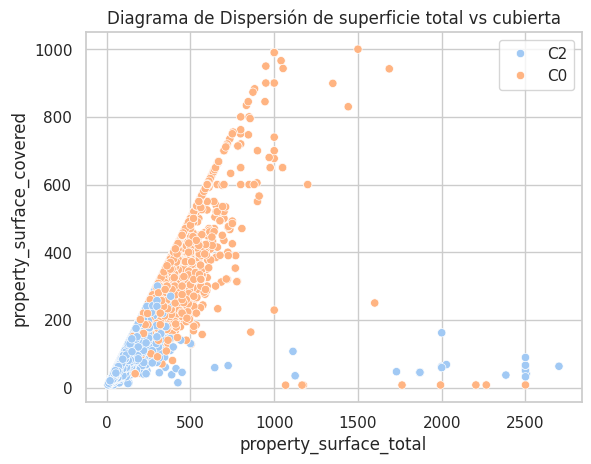

In [ ]:
# Grafico dispersograma
color = [f"C{n+1}" for n in (X["outlier_label"].values)]

sns.scatterplot(x=X["property_surface_total"], y=X["property_surface_covered"], hue=color)
plt.title("Diagrama de Dispersión de superficie total vs cubierta")
plt.show()

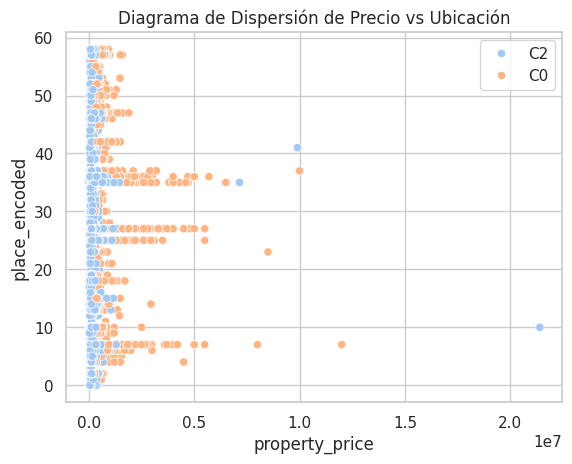

In [ ]:
sns.scatterplot(x=X["property_price"], y=X["place_encoded"], hue=color)
plt.title("Diagrama de Dispersión de Precio vs Ubicación")
plt.show()

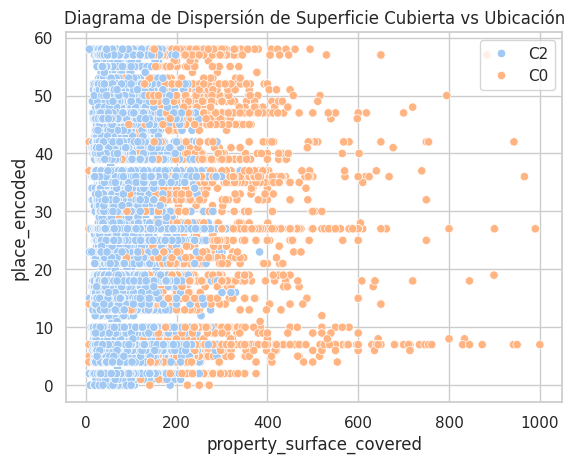

In [ ]:
sns.scatterplot(x=X["property_surface_covered"], y=X["place_encoded"], hue=color)
plt.title("Diagrama de Dispersión de Superficie Cubierta vs Ubicación")
plt.show()

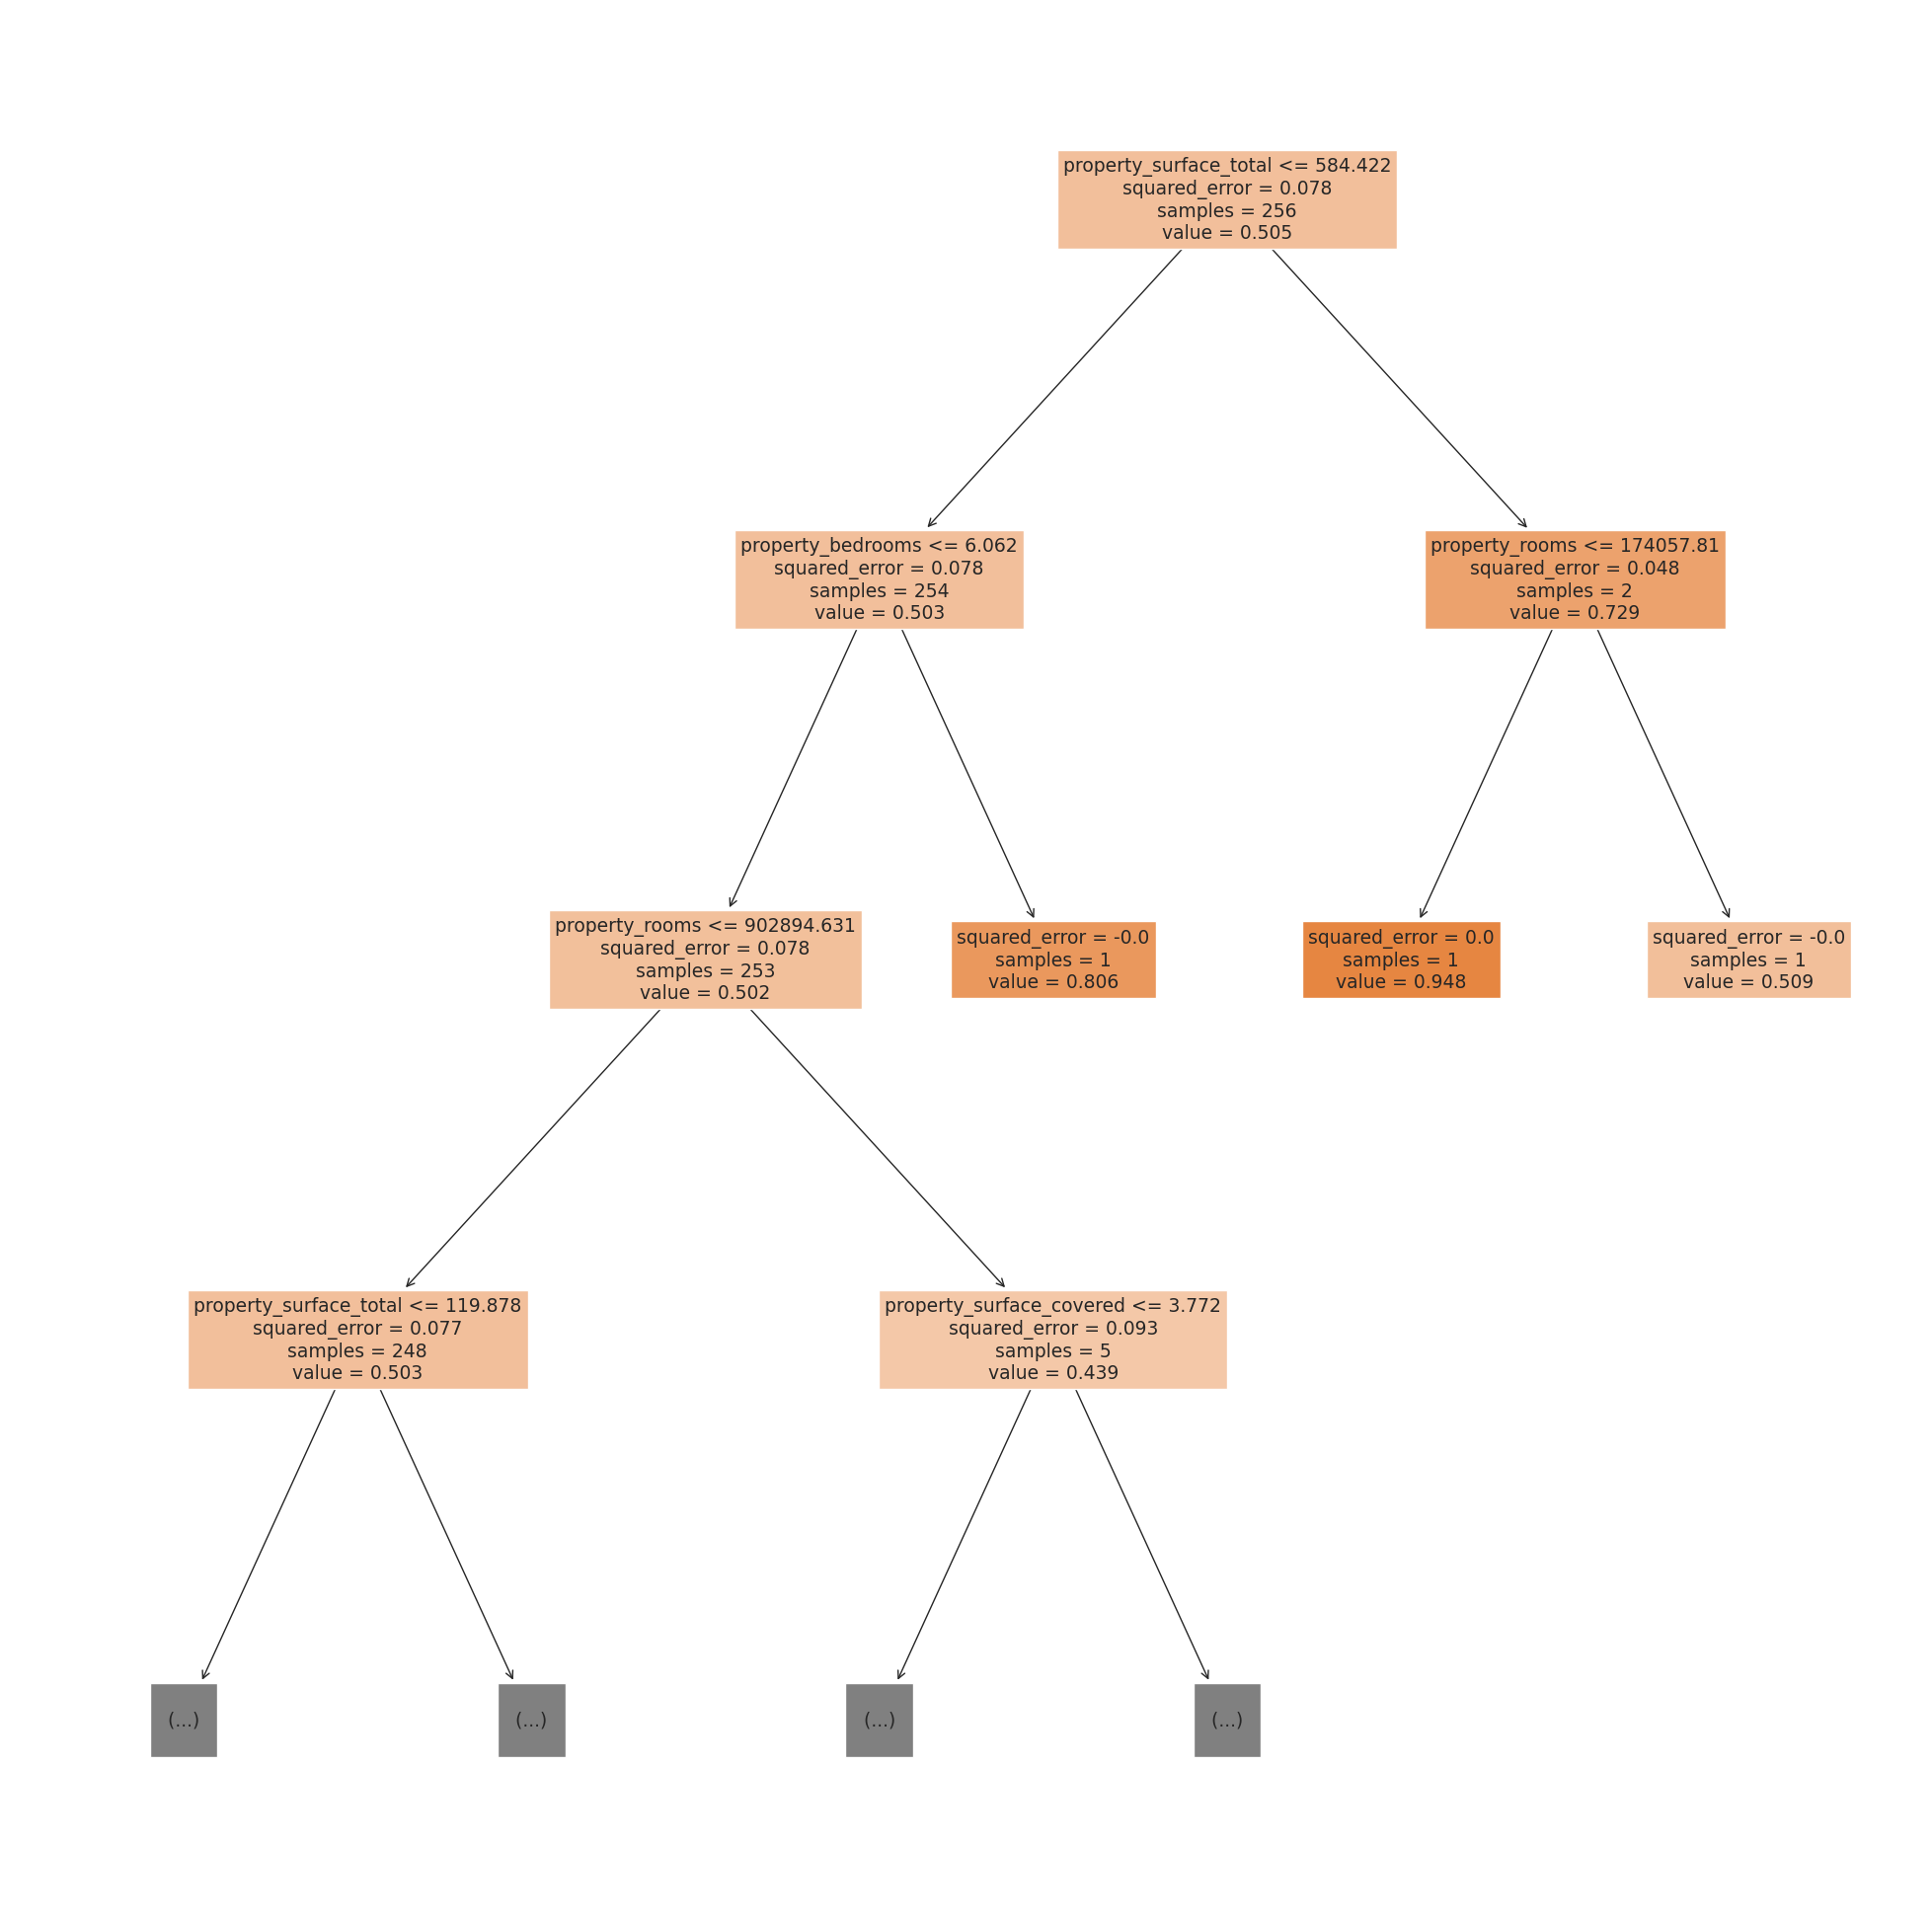

In [ ]:
# Selecciono el árbol
estimator = iforest.estimators_[5]

# Grafico
plt.figure(figsize=(25, 25))
sk.tree.plot_tree(estimator, feature_names=X.columns, filled=True, max_depth=3)
plt.show()

Revisando las anomalías y viendo los scatterplot, en su mayoría parecerían seguir las tendencias de los registros no considerados anómalos pero con valores levemente inferiores/superiores a la mediana (podría analizarse si esto es a causa de los barrios tal como se planteo anteriormente). Parecen ser anomalías genuinas y decidimos mantenerlas por contexto.

Existe un riesgo inherente en mantener los datos como estan pero de detectarse en el entrenamiento que los resultados no son los indicados se revisará esta sección.

#### **LOF**

Vamos a intentar detectar outliers multivariados usando LOF.

In [ ]:
ds_lof = ds_train.copy()

In [ ]:
ds_lof.head()

id  start_date    end_date created_on  \
152130  WdwW+njifJaAx+6GEb4Hdg==  2021-08-05  9999-12-31 2021-08-05   
62001   SR7AY4G7Cm11MDGP+geKgA==  2021-05-01  2021-06-05 2021-05-01   
51046   QZIxx+N2GuKzSMOoAxUcPQ==  2021-06-23  2021-10-18 2021-06-23   
159193  Nm3DjXksy709Lyo2zZkb7Q==  2021-11-13  2022-01-15 2021-11-13   
293794  9HQQvH9rPnePfqrrCbRoLA==  2021-02-23  2022-04-13 2021-02-23   

          latitud   longitud      place_l3 property_type  property_rooms  \
152130 -34.636634 -58.484079      Floresta  Departamento             1.0   
62001  -34.576115 -58.433387       Palermo  Departamento             3.0   
51046  -34.592109 -58.407433      Recoleta  Departamento             3.0   
159193 -34.620389 -58.457624     Caballito  Departamento             3.0   
293794 -34.601192 -58.431567  Villa Crespo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
152130                1.0                    36.0                      33.0   
62001                 2.0                    73.0                      70.0   
51046                 2.0                    88.0                      84.0   
159193                2.0                    58.0                      53.0   
293794                2.0                    61.0                      61.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  \
152130         71000.0            -0.896547             -0.896547   
62001         165000.0             0.112978              0.112978   
51046         220000.0             0.112978              0.112978   
159193        139000.0             0.112978              0.112978   
293794        110000.0             0.112978              0.112978   

        place_encoded  type_encoded  
152130             19             1  
62001              27             1  
51046              36             1  
159193             10             1  
293794             46             1

In [ ]:
def lof(df, var1, var2, name):
  radius = calculo_lof(df, var1, var2, name)
  grafico_lof(df, var1, var2, name, radius)
  return


def calculo_lof(df, var1, var2, name):
  # CÁLCULO
  # Conjunto de entrenamiento
  X = df[[var1, var2]].values

  # Creo el clasificador
  clf = LocalOutlierFactor(n_neighbors=30)

  # Genero prediccion
  y_pred = clf.fit_predict(X)

  # Guardo los scores
  df[name] = clf.negative_outlier_factor_

  #VISUALIZACION
  # Calculo radio para plotear score
  radius = (df[name].max() - df[name]) / (df[name].max() - df[name].min())
  return radius


def grafico_lof(df, var1, var2, name, radius):
  # Grafico LOF
  plt.figure(figsize=(10, 10))
  plt.title("Local Outlier Factor (LOF)" + name)
  plt.scatter(
      df[var1].values,
      df[var2].values,
      edgecolor="grey",
      s=30,
      label="datos",
      facecolors="none",
  )
  plt.scatter(
      df[var1].values,
      df[var2].values,
      s=1300 * radius,
      edgecolors="red",
      facecolors="none",
      label="Outlier scores",
  )
  legend = plt.legend(loc="upper left")
  legend.legendHandles[0]._sizes = [10]
  legend.legendHandles[1]._sizes = [20]
  plt.show()
  return

Nota: Para los lof según tipo de propiedad reducimos el valor de n_neighbors a 10 ya que no se analiza el dataset entero.

In [ ]:
def lof_segun_tipo(df, var1, var2, name):

  tipos = ["Casa", "Departamento", "PH"]

  # Subplots
  fig, axs = plt.subplots(1, 3, figsize=(18, 6))

  for i, tipo in enumerate(tipos):
      filtered_data = df[df['property_type'] == tipo]

      # Check if there's any data for this property type
      if not filtered_data.empty:
          # CÁLCULO
          X = filtered_data[[var1, var2]].values
          clf = LocalOutlierFactor(n_neighbors=10)
          y_pred = clf.fit_predict(X)
          score = name + "_" + tipo
          filtered_data[score] = clf.negative_outlier_factor_

          #VISUALIZACION
          # Calculo radio para plotear score

          radius = (filtered_data[score].max() - filtered_data[score]) / (filtered_data[score].max() - filtered_data[score].min())

          # Grafico LOF
          axs[i].scatter(
              filtered_data[var1].values,
              filtered_data[var2].values,
              edgecolor="grey",
              s=30,
              label="datos",
              facecolors="none",
          )
          axs[i].scatter(
              filtered_data[var1].values,
              filtered_data[var2].values,
              s=1300 * radius,
              edgecolors="red",
              facecolors="none",
              label="Outlier scores",
          )
          legend = axs[i].legend(loc="upper left")
          legend.legendHandles[0]._sizes = [10]
          legend.legendHandles[1]._sizes = [20]

          axs[i].set_title(f'{var1}, {var2} en {tipo}')
      else:
          axs[i].set_title(f'No data for {tipo}')


  plt.tight_layout()
  plt.show()
  return


##### Superficie cubierta vs superficie total

<ipython-input-223-0a90630abfa6>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-223-0a90630abfa6>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



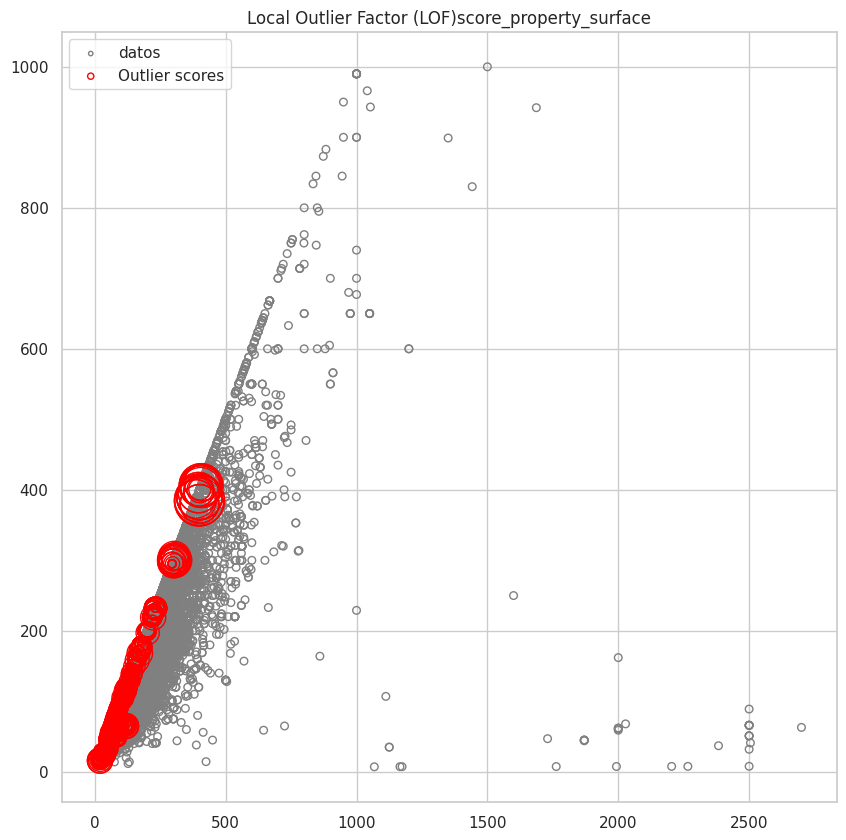

In [ ]:
lof(ds_lof, 'property_surface_total', 'property_surface_covered', 'score_property_surface')

<ipython-input-224-ccedc040ee16>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-224-ccedc040ee16>:43: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-224-ccedc040ee16>:44: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-224-ccedc040ee16>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

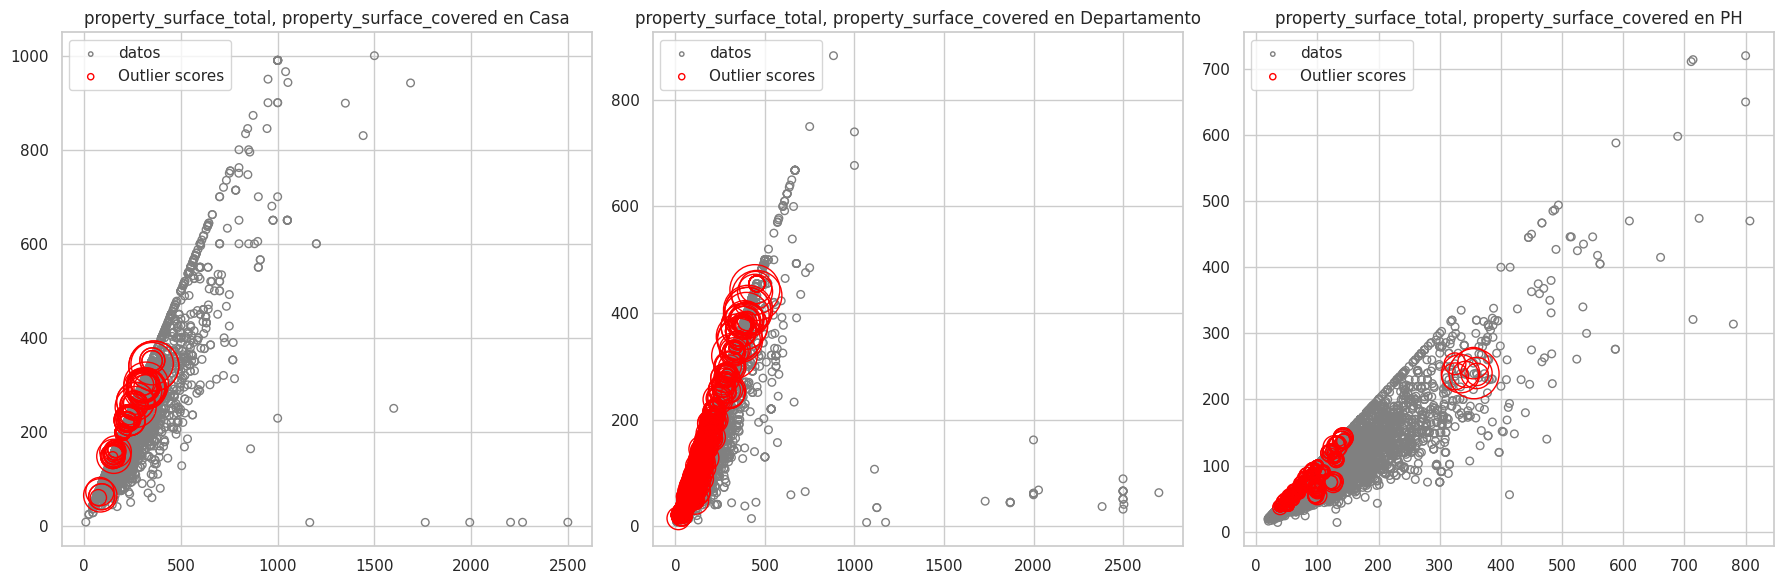

In [ ]:
lof_segun_tipo(ds_lof, 'property_surface_total', 'property_surface_covered', 'score_property_surface')

<ipython-input-224-ccedc040ee16>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-224-ccedc040ee16>:43: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-224-ccedc040ee16>:44: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-224-ccedc040ee16>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

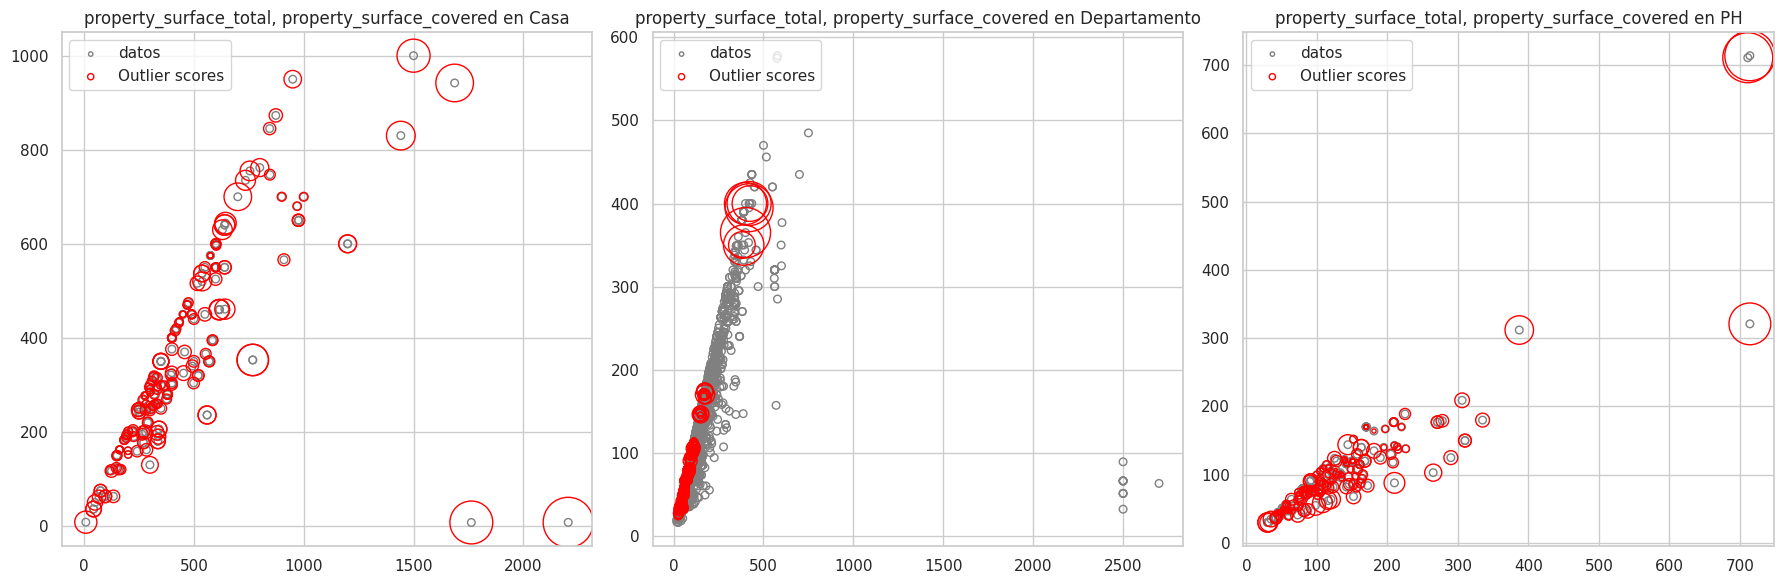

In [ ]:
lof_segun_tipo(ds_lof[(ds_lof['place_l3'] == 'Belgrano')], 'property_surface_total', 'property_surface_covered', 'score_property_surface')

Vemos como ejemplo el lof según tipo del Barrio Belgrano. Las casas son consideradas outliers casi en tu totalidad, al igual que los PHs.

In [ ]:
# Anomalias extrañas que se ven en el gráfico
ds_train[((ds_train['property_surface_covered'] < 50) & (ds_train['property_surface_total'] > 1000))]

id  start_date    end_date created_on  \
264972  d99ugnqvWTu/psmVhGYVGw==  2021-11-19  2022-01-27 2021-11-19   
177140  KVFit7mVm+epRM497KAchw==  2021-03-23  2021-06-05 2021-03-23   
398823  JNGKctXXrcxIVLKQWZWijQ==  2021-02-13  2021-03-01 2021-02-13   
119234  pL6KQ+sejcfbfOOG9ML6eA==  2021-03-25  2021-03-26 2021-03-25   
165965  NzYulXk9Ddrc+qQoqAAGRw==  2021-04-30  2021-06-05 2021-04-30   
409283  mpNfyaVZmVoa5okuzXnf+w==  2021-03-19  2021-06-05 2021-03-19   
34608   g2uthf40imsD2Cuq7jQh6g==  2021-02-08  2021-03-18 2021-02-08   
398750  OX8EKol2msy5QGViKBzvqw==  2021-02-13  2021-03-01 2021-02-13   
263173  YBglCjqyN6JqZ19HsNlLcQ==  2021-02-26  2021-03-27 2021-02-26   
238510  /sSQER6uU4At9cgFjaSqww==  2021-02-27  2021-03-01 2021-02-27   
51748   DGUIqrE5dSAcW7/SkUWaQA==  2021-06-23  2021-06-28 2021-06-23   
406836  qxNCvqToHSQUlDK37/3L9Q==  2021-01-07  2021-01-08 2021-01-07   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   
332190  PkbD1ixa/IWHlTjwozccRQ==  2021-09-17  2022-03-09 2021-09-17   
406499  3yeoD8Z07TPF6qlG/flLVg==  2021-01-07  2021-01-08 2021-01-07   
398888  pwIwws7noE6bWYrB0u/l2w==  2021-02-13  2021-03-01 2021-02-13   
399657  gKg576rwUX6YvQP+opSRAg==  2021-02-13  2021-03-01 2021-02-13   
398822  XvIFiCvdaHyCs6hNNBeY1A==  2021-02-13  2021-03-01 2021-02-13   

          latitud   longitud      place_l3 property_type  property_rooms  \
264972 -34.613827 -58.373096     San Telmo          Casa        3.000000   
177140 -34.627279 -58.373637      Barracas          Casa        2.833213   
398823 -34.624845 -58.431635     Caballito  Departamento        2.000000   
119234 -34.637304 -58.357534          Boca  Departamento        2.000000   
165965 -34.557754 -58.471497       Coghlan          Casa        3.000000   
409283 -34.599678 -58.436474       Palermo  Departamento        3.000000   
34608  -34.611660 -58.393440     Balvanera  Departamento        2.000000   
398750 -34.624845 -58.431635     Caballito  Departamento        2.000000   
263173 -34.557749 -58.471384      Belgrano          Casa        8.000000   
238510 -34.622357 -58.435193     Caballito  Departamento        2.000000   
51748  -34.608698 -58.391820     Balvanera  Departamento       10.000000   
406836 -34.613757 -58.523484  Villa Devoto  Departamento        1.000000   
148534 -34.565947 -58.442326      Belgrano          Casa        9.000000   
332190 -34.593634 -58.377164        Retiro          Casa       10.000000   
406499 -34.563005 -58.453674      Belgrano  Departamento        1.000000   
398888 -34.624845 -58.431635     Caballito  Departamento        2.000000   
399657 -34.613757 -58.523484  Villa Devoto  Departamento        1.000000   
398822 -34.624845 -58.431635     Caballito  Departamento        2.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
264972           2.000000                  1993.0                  7.549609   
177140           2.639057                  2500.0                  7.824046   
398823           1.000000                  1870.0                 45.000000   
119234           1.000000                  1730.0                 47.000000   
165965           2.000000                  2266.0                  7.725771   
409283           2.000000                  1174.0                  7.300473   
34608            1.000000                  2383.0                 37.000000   
398750           1.000000                  1870.0                 45.000000   
263173           2.079442                  2204.0                  7.698029   
238510           1.000000                  2505.0                 41.000000   
51748            5.000000                  1068.0                  7.100027   
406836           1.000000                  1125.0                 35.000000   
148534           5.000000                  1763.0                  7.474772   
332190           2.079442                  1166.0                  7.303170   
406499           1.000000                  2500.0 

Las anomalías parecerían ser de una combinación de imputaciones extrañas con algún error de escala no determinable. Normalizamos con sklearn.

In [ ]:
filtrado = ds_train[((ds_train['property_surface_covered'] < 50) & (ds_train['property_surface_total'] > 1000))]

# Determinamos las variables a normalizar y aplicamos MinMaxScaler
variables = filtrado[['property_surface_covered', 'property_surface_total']]
scaler = MinMaxScaler()
normalizadas = scaler.fit_transform(variables)


filtrado[['property_surface_covered', 'property_surface_total']] = normalizadas
ds_train.update(filtrado)


In [ ]:
ds_train[((ds_train['property_surface_covered'] < 50) & (ds_train['property_surface_total'] > 1000))]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms, place_encoded, type_encoded]
Index: []

##### Precio vs Superficie total

<ipython-input-223-0a90630abfa6>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-223-0a90630abfa6>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



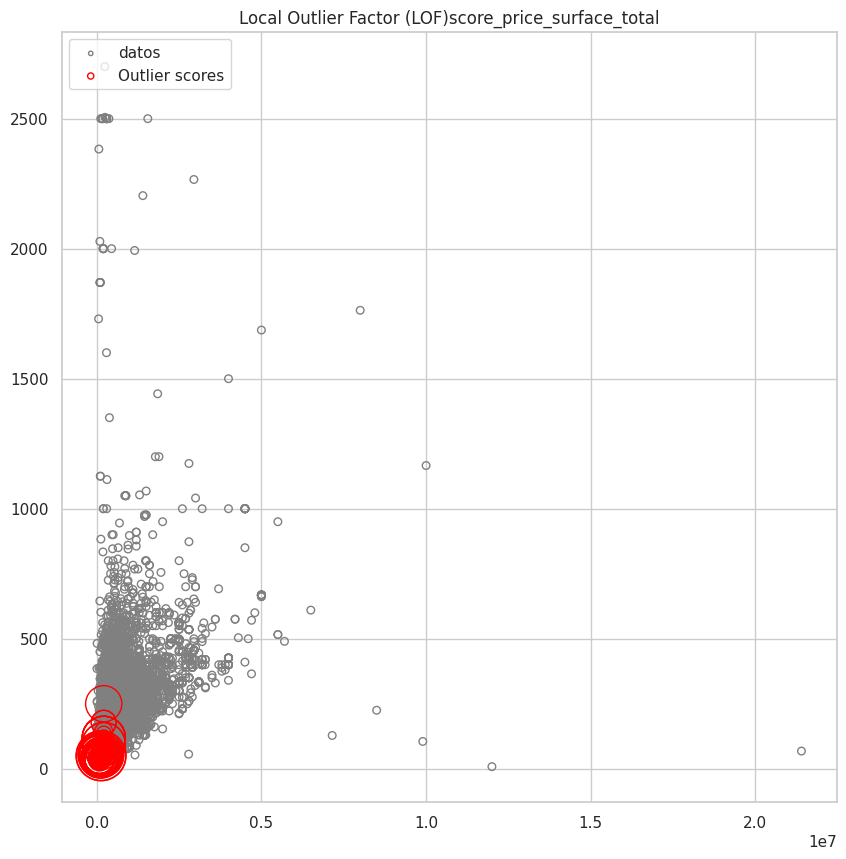

In [ ]:
lof(ds_lof, 'property_price', 'property_surface_total', 'score_price_surface_total')

<ipython-input-224-ccedc040ee16>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-224-ccedc040ee16>:43: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-224-ccedc040ee16>:44: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-224-ccedc040ee16>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

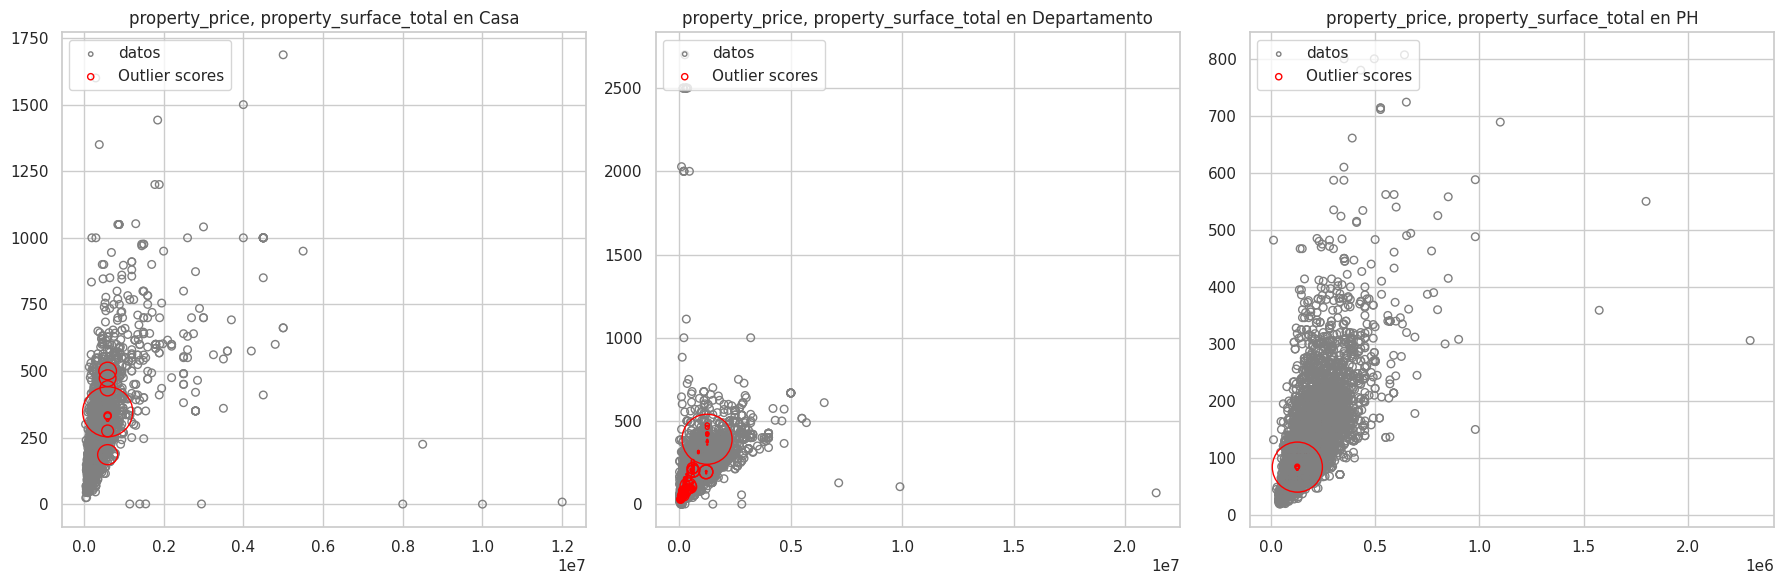

In [ ]:
lof_segun_tipo(ds_train, 'property_price', 'property_surface_total', 'score_price_surface_total')

Si bien no se detectan como anomalías por LOF, vemos algunas situaciones extrañas en el gráfico y las analizamos.

In [ ]:
# Propiedad demasiado barata para la superficie total
ds_train[((ds_train['property_price'] < 290000) & (ds_train['property_surface_total'] > 1000))]

id  start_date    end_date created_on  \
195264  8b+CSpRNOTjFl1WESiegUg==  2021-08-21  2021-08-27 2021-08-21   
314533  72wVhxVSXrYVxWF0A0oMlQ==  2021-01-06  2021-01-09 2021-01-06   
152387  5e2B9vTi0QYTdU/nsMPrnw==  2021-08-05  2021-08-08 2021-08-05   
314739  GCATxme+VZNJyNX6WLwKuA==  2021-01-06  2021-01-09 2021-01-06   
233704  xZtn7sYshWyoqpVg9tsNKw==  2021-03-20  2021-04-13 2021-03-20   
336355  4WknGj7iBL7zrNCoaqjvVA==  2021-07-21  2021-08-08 2021-07-21   
381402  lqZf0l2vUD4iyYKmcL/Wwg==  2021-07-08  2021-07-18 2021-07-08   
314539  DE092uxcDdDlDnRTCLVKkQ==  2021-01-06  2021-01-09 2021-01-06   
59206   nAlNswS6InJ4arizl/c9QQ==  2021-03-13  2021-03-16 2021-03-13   
406839  MVyJD44kmd4b9RZca8TQLw==  2021-01-07  2021-01-08 2021-01-07   

          latitud   longitud      place_l3 property_type  property_rooms  \
195264 -34.554356 -58.458076      Belgrano  Departamento             2.0   
314533 -34.554356 -58.458076      Belgrano  Departamento             3.0   
152387 -34.611826 -58.516024  Villa Devoto  Departamento             3.0   
314739 -34.611826 -58.516024  Villa Devoto  Departamento             3.0   
233704 -34.611826 -58.516024  Villa Devoto  Departamento             3.0   
336355 -34.604284 -58.387255     Monserrat  Departamento             3.0   
381402 -34.554356 -58.458076      Belgrano  Departamento             2.0   
314539 -34.554356 -58.458076      Belgrano  Departamento             2.0   
59206  -34.563005 -58.453674      Belgrano  Departamento             3.0   
406839 -34.611826 -58.516024  Villa Devoto  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
195264                1.0                  2500.0                      51.0   
314533                2.0                  2700.0                      63.0   
152387                2.0                  2000.0                      61.0   
314739                2.0                  2000.0                      62.0   
233704                2.0                  2000.0                      62.0   
336355                2.0                  2028.0                      68.0   
381402                1.0                  2500.0                      51.0   
314539                1.0                  2500.0                      51.0   
59206                 2.0                  2500.0                      66.0   
406839                2.0                  2000.0                      59.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  \
195264        164900.0            -0.896547             -0.896547   
314533        244750.0             0.112978              0.112978   
152387        189400.0             0.112978              0.112978   
314739        204700.0             0.112978              0.112978   
233704        204700.0             0.112978              0.112978   
336355         95000.0             0.112978              0.112978   
381402        164900.0            -0.896547             -0.896547   
314539        181990.0            -0.896547             -0.896547   
59206         289500.0             0.112978              0.112978   
406839        193400.0             0.112978              0.112978   

        place_encoded  type_encoded  
195264              7             1  
314533              7             1  
152387             47             1  
314739             47             1  
233704             47             1  
336355             23             1  
381402              7             1  
314539              7             1  
59206               7             1  
406839             47             1

Son casi todos casos de Departamento. Viendo las variables, el error parecería estar en la superficie y no en el precio. Normalizamos estos casos.

In [ ]:
ds_train[((ds_train['property_price'] < 290000) & (ds_train['property_surface_total'] > 1000))]

# Determinamos las variables a normalizar y aplicamos MinMaxScaler
variables = filtrado[['property_price', 'property_surface_total']]
scaler = MinMaxScaler()
normalizadas = scaler.fit_transform(variables)


filtrado[['property_price', 'property_surface_total']] = normalizadas
ds_train.update(filtrado)

In [ ]:
ds_lof.sort_values(by='score_price_surface_total', ascending=False)

id  start_date    end_date created_on  \
178833  5CaA6JfBsliNB4CkrkL/Fw==  2021-09-27  2021-11-07 2021-09-27   
222370  Z9n+5iVgJxNu4a1uWUCmOQ==  2021-12-12  2022-01-27 2021-12-12   
12526   LMIHLooyE7eg5Y/Zp13Gow==  2021-07-06  2021-07-18 2021-07-06   
421967  0uhtiP9FXbMTetfJbq0KOg==  2021-07-07  2021-08-16 2021-07-07   
202812  5tqRIghWGjK2+Pd6C4S8zg==  2021-07-24  2022-04-21 2021-07-24   
...                          ...         ...         ...        ...   
255857  qrqeFM8Bs/O8/Q3OTon3KA==  2021-11-03  2021-11-12 2021-11-03   
93297   L7qWIkV5m7OeIg5iekM7Uw==  2021-08-03  2022-07-24 2021-08-03   
313176  7tYLqN9qjiL5PL57EOSjxg==  2021-06-14  2021-07-07 2021-06-14   
137153  0P5/KIBFcbzjVN+OziXyoQ==  2021-01-22  2021-06-30 2021-01-22   
137201  H+/eByeuGG8odSiYrn5hvw==  2021-01-22  2021-06-30 2021-01-22   

          latitud   longitud       place_l3 property_type  property_rooms  \
178833 -34.623576 -58.371389      San Telmo            PH             3.0   
222370 -34.594693 -58.421063        Palermo  Departamento             1.0   
12526  -34.616591 -58.388897      Monserrat  Departamento             2.0   
421967 -34.602689 -58.413023         Abasto  Departamento             1.0   
202812 -34.578748 -58.435423        Palermo  Departamento             1.0   
...           ...        ...            ...           ...             ...   
255857 -34.544466 -58.471032          Nuñez  Departamento             2.0   
93297  -34.573464 -58.482707  Villa Urquiza  Departamento             2.0   
313176 -34.609056 -58.421322        Almagro  Departamento             2.0   
137153 -34.582098 -58.448859        Palermo  Departamento             2.0   
137201 -34.582098 -58.448859        Palermo  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
178833                1.0                    39.0                      39.0   
222370                1.0                    39.0                      37.0   
12526                 1.0                    39.0                      35.0   
421967                1.0                    39.0                      39.0   
202812                1.0                    39.0                      30.0   
...                   ...                     ...                       ...   
255857                1.0                    53.0                      47.0   
93297                 1.0                    50.0                      45.0   
313176                1.0                    55.0                      51.0   
137153                1.0                    50.0                      45.0   
137201                1.0                    50.0                      45.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  \
178833         77000.0            -0.896547             -0.896547   
222370         77000.0            -0.896547             -0.896547   
12526          77000.0            -0.896547             -0.896547   
421967         77000.0            -0.896547             -0.896547   
202812         77000.0            -0.896547             -0.896547   
...                ...                  ...                   ...   
255857        110363.0            -0.896547             -0.896547   
93297         145350.0            -0.896547             -0.896547   
313176        125400.0            -0.896547             -0.896547   
137153        130468.0            -0.896547             -0.896547   
137201        130494.0            -0.896547             -0.896547   

        place_encoded  type_encoded  score_property_surface  \
178833             42             2                    -1.0   
222370             27             1                    -1.0   
12526              23             1                    -1.0   
421967              0             1                    -1.0   
202812             27             1                    -1.0   
...               ...           ...                     ...   
255857             25            

Lo que el score arrojado como LOF nos indica como outlier no parecería serlo a primera vista. Probamos igualmente

In [ ]:
umbral = -1.5
# Filtrar las filas donde el valor de 'score_price_surface_total' es menor que el umbral
ds_lof[ds_lof['score_price_surface_total'] < umbral]


id  start_date    end_date created_on  \
293794  9HQQvH9rPnePfqrrCbRoLA==  2021-02-23  2022-04-13 2021-02-23   
183186  wqR0FUGXXPLFKV0GLbEt8g==  2021-12-21  2022-01-27 2021-12-21   
4856    /LCZqJ4hlXKsp5v3JVbqYQ==  2021-09-20  2022-03-06 2021-09-20   
393127  vYddb/0OrvtLHjl5tDE/Lw==  2021-02-13  2021-04-03 2021-02-13   
384430  ypTgK6PW5RcwxZMwNMKPcQ==  2021-09-06  2022-02-10 2021-09-06   
...                          ...         ...         ...        ...   
25681   Bgbts/UFM5FBxELf6l1v6Q==  2021-06-24  2021-06-30 2021-06-24   
63706   Tcc5UEkFxmysa5exJYUJQA==  2021-06-22  2021-11-04 2021-06-22   
234235  FbgHZby9d5ufdBaGBlNuxg==  2021-06-02  2022-02-09 2021-06-02   
443967  wUbGKJAp/GxPTBBESMWqGg==  2021-11-09  2022-01-27 2021-11-09   
280165  LW4xfHNPbbr2zl1ferUJ4Q==  2021-07-12  2021-11-27 2021-07-12   

          latitud   longitud       place_l3 property_type  property_rooms  \
293794 -34.601192 -58.431567   Villa Crespo  Departamento             3.0   
183186 -34.627622 -58.410936  San Cristobal            PH             2.0   
4856   -34.580447 -58.415106        Palermo  Departamento             2.0   
393127 -34.638875 -58.451337         Flores            PH             4.0   
384430 -34.564566 -58.469567       Belgrano  Departamento             2.0   
...           ...        ...            ...           ...             ...   
25681  -34.618898 -58.484585         Flores  Departamento             3.0   
63706  -34.651940 -58.515404        Liniers  Departamento             3.0   
234235 -34.579147 -58.454432     Colegiales            PH             6.0   
443967 -34.597446 -58.374290       Recoleta  Departamento             1.0   
280165 -34.620016 -58.389082      Monserrat  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
293794                2.0                    61.0                      61.0   
183186                1.0                   101.0                      59.0   
4856                  1.0                    55.0                      50.0   
393127                3.0                   242.0                     190.0   
384430                1.0                    41.0                      41.0   
...                   ...                     ...                       ...   
25681                 2.0                   117.0                      96.0   
63706                 2.0                    55.0                      54.0   
234235                3.0                   320.0                     220.0   
443967                1.0                    20.0                      20.0   
280165                2.0                    51.0                      47.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  \
293794        110000.0             0.112978              0.112978   
183186        149900.0            -0.896547             -0.896547   
4856          289000.0            -0.896547             -0.896547   
393127        329000.0             1.122503              1.122503   
384430         79000.0            -0.896547             -0.896547   
...                ...                  ...                   ...   
25681         168000.0             0.112978              0.112978   
63706          69000.0             0.112978              0.112978   
234235        375000.0             1.122503              1.122503   
443967         51900.0            -0.896547             -0.896547   
280165         93900.0             0.112978              0.112978   

        place_encoded  type_encoded  score_property_surface  \
293794             46             1           -1.000000e+00   
183186             40             2           -1.025019e+00   
4856               27             1           -1.000000e+00   
393127             18             2           -1.058230e+00   
384430              7             1           -1.000000e+00   
...               ...           ...                     ...   
25681              18            

Estableciendo un umbral de -1.5, podemos ver 14166 filas consideradas 'outliers'. No solo eso, sino que a primera vista no parecerían serlo. Probamos normalizandolas y graficando a ver si encontramos alguna mejora.



In [ ]:
columnas_a_normalizar=['property_price', 'property_surface_total']
ds_lof[columnas_a_normalizar] = scaler.fit_transform(ds_lof[columnas_a_normalizar])


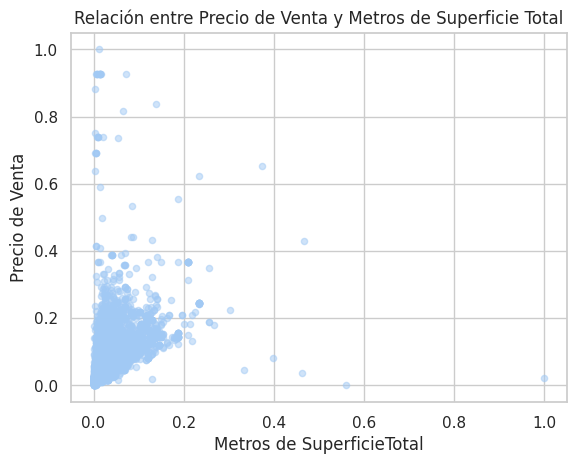

In [ ]:
ds_lof.plot.scatter(y='property_surface_total', x='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Total')
plt.xlabel('Metros de SuperficieTotal')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()


<ipython-input-223-0a90630abfa6>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-223-0a90630abfa6>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



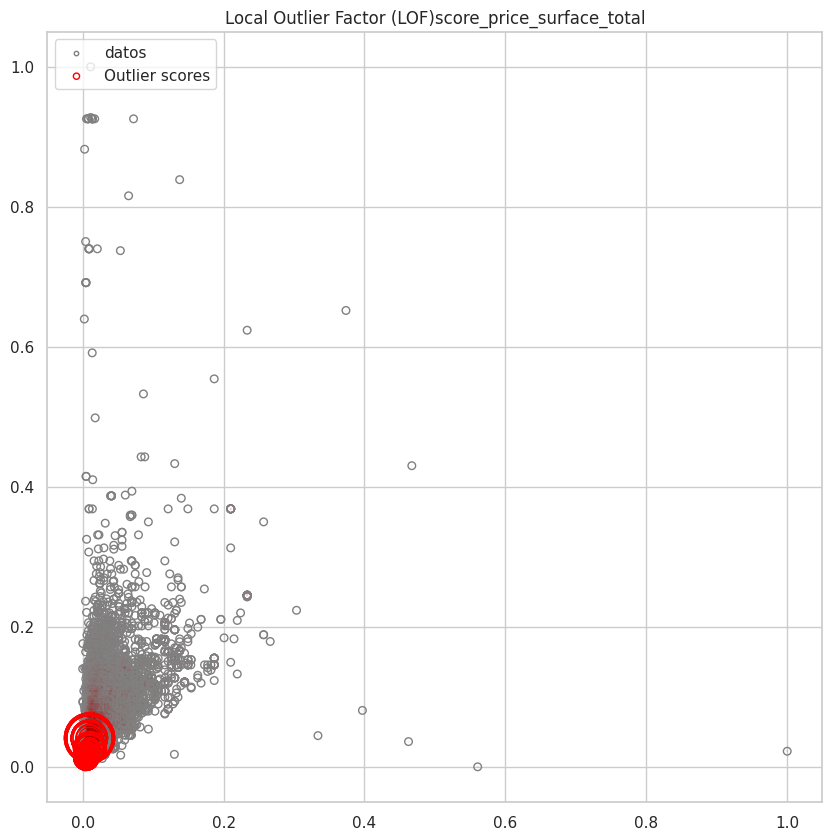

In [ ]:
lof(ds_lof, 'property_price', 'property_surface_total', 'score_price_surface_total')

No se ve una mejora notoría, sino la concentración aún más de los outliers en una ubicación que no tiene sentido. Teniendo eso en cuenta y que los datos parecen normales a simple vista, los dejaremos como estaban, excepto los casos particulares ya expuestos.

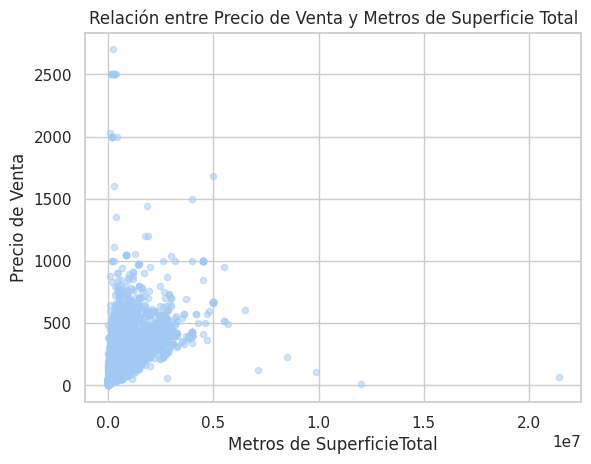

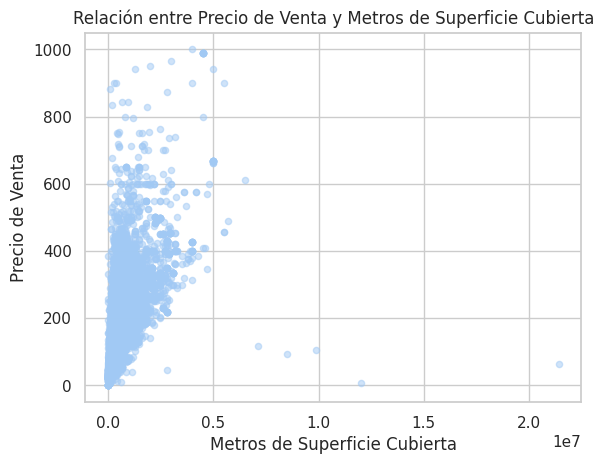

In [ ]:
ds_train.plot.scatter(y='property_surface_total', x='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Total')
plt.xlabel('Metros de SuperficieTotal')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()


ds_train.plot.scatter(y='property_surface_covered', x='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Cubierta')
plt.xlabel('Metros de Superficie Cubierta')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

###### Ubicación vs Precio

<ipython-input-223-0a90630abfa6>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-223-0a90630abfa6>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



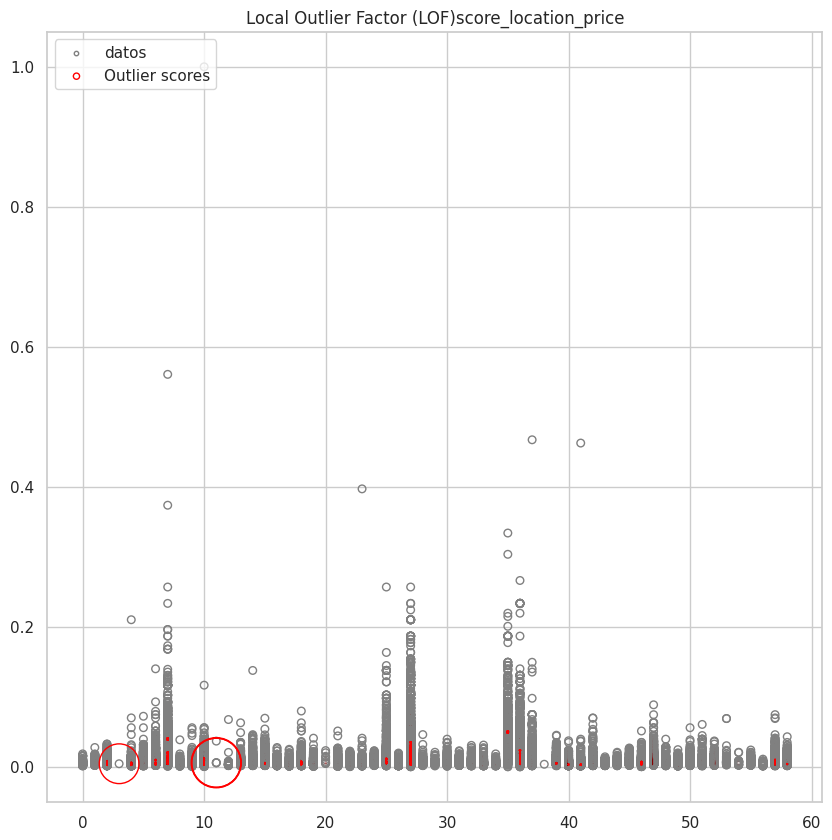

In [ ]:
lof(ds_lof, 'place_encoded', 'property_price', 'score_location_price')

# Guardado de train y test Datasets

In [ ]:
if using_drive:
  ds_train.to_csv(drive_path + "/Dataset/ds_train.csv", index=False)
  ds_test.to_csv(drive_path + "/Dataset/ds_test.csv", index=False)
else:
  ds_train.to_csv("./dataset/ds_train.csv", index=False)
  ds_test.to_csv("./dataset/ds_test.csv", index=False)